In [359]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv(
    'Moscow_1729040.csv') 

In [360]:

data=data.dropna(axis=1, how='all')

In [361]:
data.drop('company_id',axis=1,inplace=True)
data.drop('document_type',axis=1,inplace=True)#as all values are same
data.drop('customer_map_id',axis=1,inplace=True)

In [362]:
import seaborn as sns

In [363]:
data.head()

acct_doc_header_id  doc_number  doc_number_norm business_code  cust_number  \
0           543926271    47946155         47946155         nuus8       218997   
1           532580237    29900369         29900369         body5       218998   
2           542315600    44199998         44199998         pier9       218994   
3           540278370    40437227         40437227         enme9       218996   
4           541942602    43386500         43386500         CZRP4       228442   

   cust_number_norm name_customer document_create_date  \
0            218997       nucleus           2019-04-04   
1            218998    bochmanedy           2017-07-20   
2            218994    pied piper           2018-12-17   
3            218996     end frame           2018-08-16   
4            228442   CZERKA CORP           2018-11-23   

  document_create_date_norm  invoice_id  invoice_id_norm baseline_create_date  \
0                2019-04-04    47946155         47946155                  NaN   
1                2017-07-20    29900369         29900369                  NaN   
2                2018-12-17    44199998         44199998                  NaN   
3                2018-08-16    40437227         40437227                  NaN   
4                2018-11-23    43386500         43386500                  NaN   

  invoice_date_norm  total_open_amount  total_open_amount_norm  \
0               NaN                0.0                     0.0   
1               NaN                0.0                     0.0   
2               NaN                0.0                     0.0   
3               NaN                0.0                     0.0   
4               NaN                0.0                     0.0   

   cust_payment_terms shipping_date  clear_date clear_date_norm  \
0                  60           NaN  2019-06-11      2019-06-11   
1                  60           NaN  2017-10-08      2017-10-08   
2                  60           NaN  2019-02-16      2019-02-16   
3                  75           NaN  2018-11-01      2018-11-01   
4                  60           NaN  2019-02-03      2019-02-03   

   is_open_invoice  invoice_currency     doc_id  actual_outstanding_amount  \
0                0            846.97  543926271                     846.97   
1                0           4759.90  532580237                    4759.90   
2                0          26002.48  542315600                   26002.48   
3                0           5934.24  540278370                    5934.24   
4                0            185.39  541942602                     185.39   

   payment_amount  days_past_duedate  age_invoice  
0          846.97                  8           68  
1         4759.90                 44          104  
2        26002.48                  1           61  
3         5934.24                  2           77  
4          185.39                 12           72

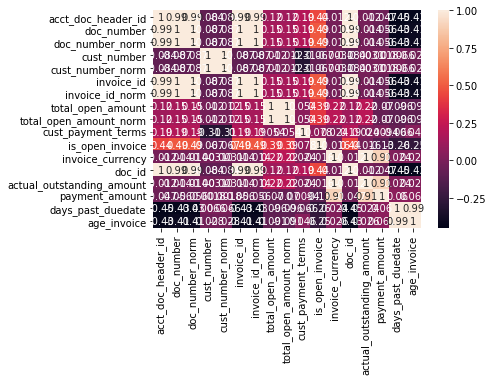

In [364]:
corr = data.corr()
sns.heatmap(corr,annot=True) #forming heatmap

# To delete columns which are similar in all rows 

In [7]:
import numpy as np             #to get to know columns which are similar and drop them

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation equal to 1
to_drop = [column for column in upper.columns if any(upper[column] ==1)]

# Drop features 
data.drop(to_drop, axis=1, inplace=True)

In [8]:
data.drop(['clear_date_norm','document_create_date_norm'],axis=1,inplace=True) #drop them as date is not traversed as 1 in heatmap

In [365]:
len(data.business_code.unique())

52

In [366]:
a=data.business_code.sort_values().unique()

In [367]:
print(a)

['ABES3' 'ABes3' 'AT&T7' 'CZRP4' 'Cyon4' 'ERes3' 'EVRP3' 'Faes6' 'HYON10'
 'LERP4' 'OMS 1' 'PAES6' 'Paks10' 'Piat8' 'Pres3' 'RUMS10' 'Soon9' 'Tyon1'
 'UMRP2' 'VECS2' 'Vees4' 'WORT6' 'Werp6' 'ares6' 'avto3' 'body5' 'chet3'
 'coeU2' 'cvrp1' 'deer10' 'enme9' 'goay3' 'holi10' 'hoyz8' 'jons3' 'karp8'
 'mdtd4' 'mech7' 'meon6' 'minc10' 'nuus8' 'oprp7' 'pier9' 'raad5' 'raal9'
 'saer1' 'seod1' 'skes8' 'syps7' 'wart8' 'wtds4' 'xyes4']


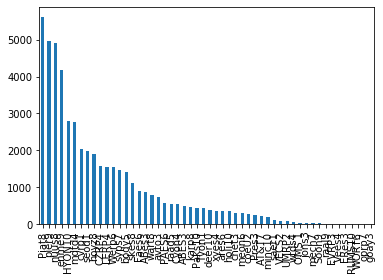

In [368]:
fig = data.business_code.value_counts().plot.bar()

# To check the dependency of each column 

In [47]:
(data.business_code.factorize()[0] == data.name_customer.factorize()[0]).all()#for checking the dependency

True

In [48]:
(data.business_code.factorize()[0] == data.cust_number.factorize()[0]).all()

True

In [49]:
(data.acct_doc_header_id.factorize()[0] == data.cust_number.factorize()[0]).all()

False

# categorize cust_number to 48 categories

In [369]:
new_dict = {k: i for i, k in enumerate(data.cust_number.unique(), 0)}

In [370]:
new_dict

{218997: 0,
 218998: 1,
 218994: 2,
 218996: 3,
 228442: 4,
 228462: 5,
 226552: 6,
 228140: 7,
 228616: 8,
 226547: 9,
 219001: 10,
 228084: 11,
 228098: 12,
 228453: 13,
 228090: 14,
 228078: 15,
 228089: 16,
 219010: 17,
 228448: 18,
 218995: 19,
 228446: 20,
 226546: 21,
 228085: 22,
 219000: 23,
 228093: 24,
 226550: 25,
 228114: 26,
 228122: 27,
 228460: 28,
 228104: 29,
 228139: 30,
 228099: 31,
 228102: 32,
 228088: 33,
 228113: 34,
 228096: 35,
 228097: 36,
 229624: 37,
 228119: 38,
 228111: 39,
 228443: 40,
 228461: 41,
 226549: 42,
 228138: 43,
 228120: 44,
 226545: 45,
 228121: 46,
 228618: 47,
 228123: 48,
 226551: 49,
 218999: 50,
 228107: 51}

In [371]:
data.loc[:, 'cust_number_mapped'] = data.loc[:, 'cust_number'].map(new_dict)

In [372]:
data.head(10)

acct_doc_header_id  doc_number  doc_number_norm business_code  cust_number  \
0           543926271    47946155         47946155         nuus8       218997   
1           532580237    29900369         29900369         body5       218998   
2           542315600    44199998         44199998         pier9       218994   
3           540278370    40437227         40437227         enme9       218996   
4           541942602    43386500         43386500         CZRP4       228442   
5           535749005    33725445         33725445         Cyon4       228462   
6           536748110    35708642         35708642         nuus8       218997   
7           534049156    31951925         31951925         CZRP4       228442   
8           537513292    36892281         36892281         mdtd4       226552   
9           542641738    45094140         45094140        HYON10       228140   

   cust_number_norm                  name_customer document_create_date  \
0            218997                        nucleus           2019-04-04   
1            218998                     bochmanedy           2017-07-20   
2            218994                     pied piper           2018-12-17   
3            218996                      end frame           2018-08-16   
4            228442                    CZERKA CORP           2018-11-23   
5            228462  Cyberdyne Systems Corporation           2017-12-06   
6            218997                        nucleus           2018-02-07   
7            228442                    CZERKA CORP           2017-10-12   
8            226552               mdassist pvt ltd           2018-03-27   
9            228140           HYPERION CORPORATION           2019-01-08   

  document_create_date_norm  invoice_id  invoice_id_norm baseline_create_date  \
0                2019-04-04    47946155         47946155                  NaN   
1                2017-07-20    29900369         29900369                  NaN   
2                2018-12-17    44199998         44199998                  NaN   
3                2018-08-16    40437227         40437227                  NaN   
4                2018-11-23    43386500         43386500                  NaN   
5                2017-12-06    33725445         33725445                  NaN   
6                2018-02-07    35708642         35708642                  NaN   
7                2017-10-12    31951925         31951925           2017-10-12   
8                2018-03-27    36892281         36892281                  NaN   
9                2019-01-08    45094140         45094140                  NaN   

  invoice_date_norm  total_open_amount  total_open_amount_norm  \
0               NaN                0.0                     0.0   
1               NaN                0.0                     0.0   
2               NaN                0.0                     0.0   
3               NaN                0.0                     0.0   
4               NaN                0.0                     0.0   
5               NaN                0.0                     0.0   
6               NaN                0.0                     0.0   
7        2017-10-12                0.0                     0.0   
8               NaN                0.0                     0.0   
9               NaN                0.0                     0.0   

   cust_payment_terms shipping_date  clear_date clear_date_norm  \
0                  60           NaN  2019-06-11      2019-06-11   
1                  60           NaN  2017-10-08      2017-10-08   
2                  60           NaN  2019-02-16      2019-02-16   
3                  75           NaN  2018-11-01      2018-11-01   
4                  60           NaN  2019-02-03      2019-02-03   
5                  60           NaN  2018-02-08      2018-02-08   
6                  60           NaN  2018-04-15      2018-04-15   
7                  60    10/12/2017  2017-12-02      2017-12-02   
8                  60           NaN  2018-06-03      2018-06-03

In [55]:
(data.business_code.factorize()[0] == data.cust_number_mapped.factorize()[0]).all()

True

In [56]:
(data.doc_number.factorize()[0] == data.acct_doc_header_id.factorize()[0]).all()

True

In [373]:
len(data.doc_number.unique())

45857

In [374]:
data.isnull().sum()

acct_doc_header_id               0
doc_number                       0
doc_number_norm                  0
business_code                    0
cust_number                      0
cust_number_norm                 0
name_customer                    0
document_create_date             0
document_create_date_norm        0
invoice_id                       0
invoice_id_norm                  0
baseline_create_date         39507
invoice_date_norm            39507
total_open_amount                0
total_open_amount_norm           0
cust_payment_terms               0
shipping_date                39507
clear_date                    5000
clear_date_norm               5000
is_open_invoice                  0
invoice_currency                 0
doc_id                           0
actual_outstanding_amount        0
payment_amount                   0
days_past_duedate                0
age_invoice                      0
cust_number_mapped               0
dtype: int64

In [60]:
(data.baseline_create_date.factorize()[0] == data.invoice_date_norm.factorize()[0]).all()

True

In [375]:
data.drop(['doc_number','cust_number','document_create_date','invoice_id','total_open_amount','clear_date'],axis=1,inplace=True)

# change to datetime_format

In [376]:
import datetime


In [377]:
data['document_create_date_norm_new'] = pd.to_datetime(data.document_create_date_norm)
data['baseline_create_date_new'] = pd.to_datetime(data.baseline_create_date)
data['invoice_date_norm_new'] = pd.to_datetime(data.invoice_date_norm)
#data['clear_date_new'] = pd.to_datetime(data.clear_date)
data['shipping_date_new'] = pd.to_datetime(data.shipping_date)
data['clear_date_norm_new'] = pd.to_datetime(data.clear_date_norm)

In [378]:
data.drop(['document_create_date_norm','baseline_create_date','invoice_date_norm','shipping_date','clear_date_norm'],axis=1,inplace=True)

In [379]:
data.is_open_invoice.value_counts()     #to find the number of open or closed invoice

0    46169
1     3831
Name: is_open_invoice, dtype: int64

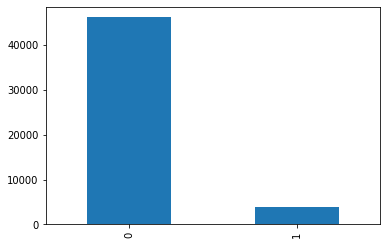

In [275]:
fig = data.is_open_invoice.value_counts().plot.bar()

In [276]:
data.cust_payment_terms.value_counts()

60    45273
75     2732
67     1990
0         5
Name: cust_payment_terms, dtype: int64

In [383]:
total_amount_which_open=data['total_open_amount_norm'].sum()
print('total amount which is open is: {}'.format(total_amount_which_open))

total amount which is open is: 40599425.28


In [384]:
total_invoice_currency=data['invoice_currency'].sum()
print('total invoice amount : {}'.format(total_invoice_currency))

total invoice amount : 438425395.37


In [385]:
total_payment_amount=data['payment_amount'].sum()
print('total payment amount : {}'.format(total_payment_amount))

total payment amount : 358610587.63


In [387]:
data[['total_open_amount_norm','payment_amount','invoice_currency']].describe()

total_open_amount_norm  payment_amount  invoice_currency
count            50000.000000    5.000000e+04      5.000000e+04
mean               811.988506    7.172212e+03      8.768508e+03
std               5145.317279    1.626930e+04      1.794080e+04
min                  0.000000    0.000000e+00      1.420000e+00
25%                  0.000000    8.474325e+02      1.694750e+03
50%                  0.000000    3.681840e+03      5.071945e+03
75%                  0.000000    9.620977e+03      1.147671e+04
max             626744.350000    2.166982e+06      2.166982e+06

In [84]:
data.cust_payment_terms.mode()

0    60
dtype: int64

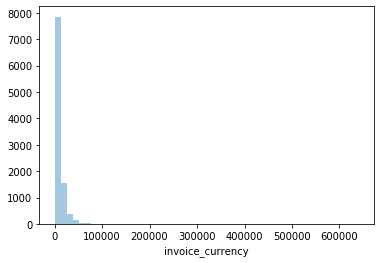

In [87]:
sns.distplot(data.invoice_currency, kde=False)

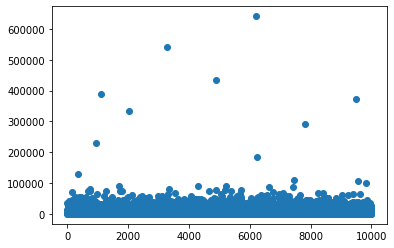

In [94]:

plt.scatter(range(10000), data.invoice_currency)

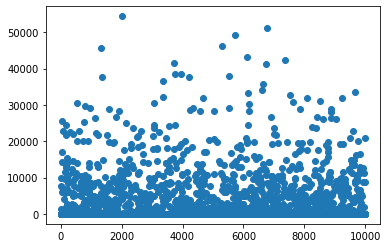

In [95]:

plt.scatter(range(10000), data.total_open_amount)

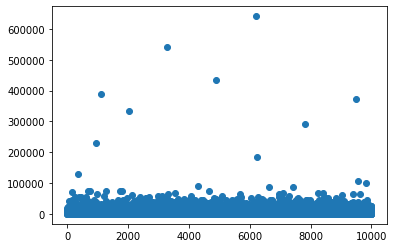

In [96]:

plt.scatter(range(10000), data.payment_amount)

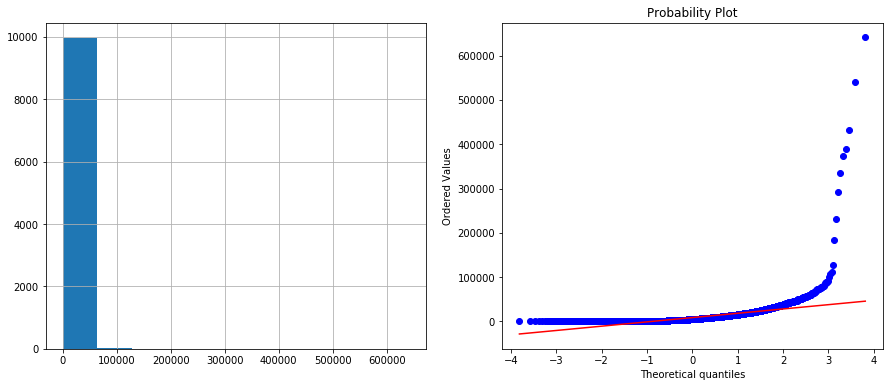

In [50]:
import scipy.stats as stats
import pylab
def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)

    plt.show()
    
diagnostic_plots(data, 'invoice_currency')

In [388]:
cols_to_use = ['age_invoice', 'business_code','cust_payment_terms']

for col in cols_to_use:
    print('variable: ', col, ' number of labels: ', len(data[col].unique()))

print('total cars: ', len(data))

variable:  age_invoice  number of labels:  209
variable:  business_code  number of labels:  52
variable:  cust_payment_terms  number of labels:  4
total cars:  50000


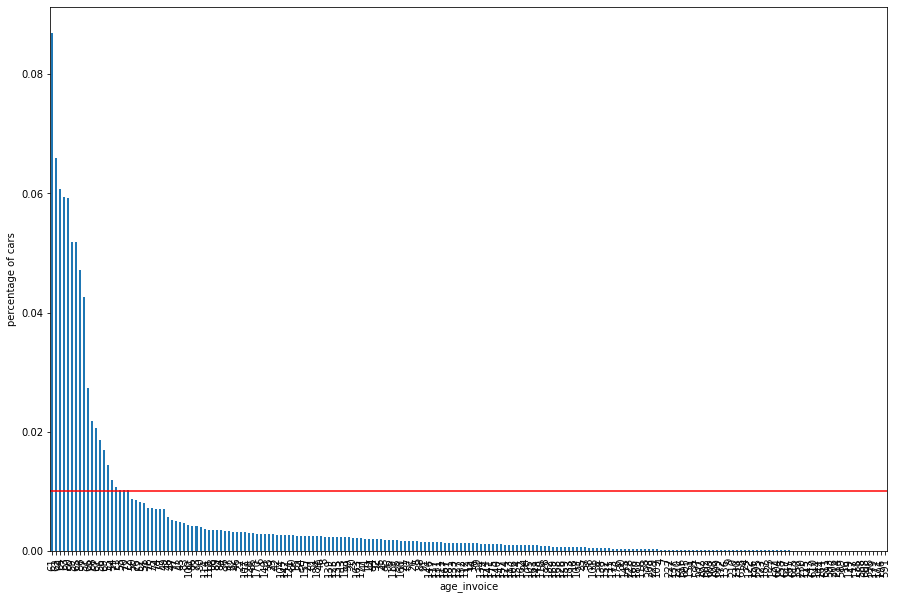

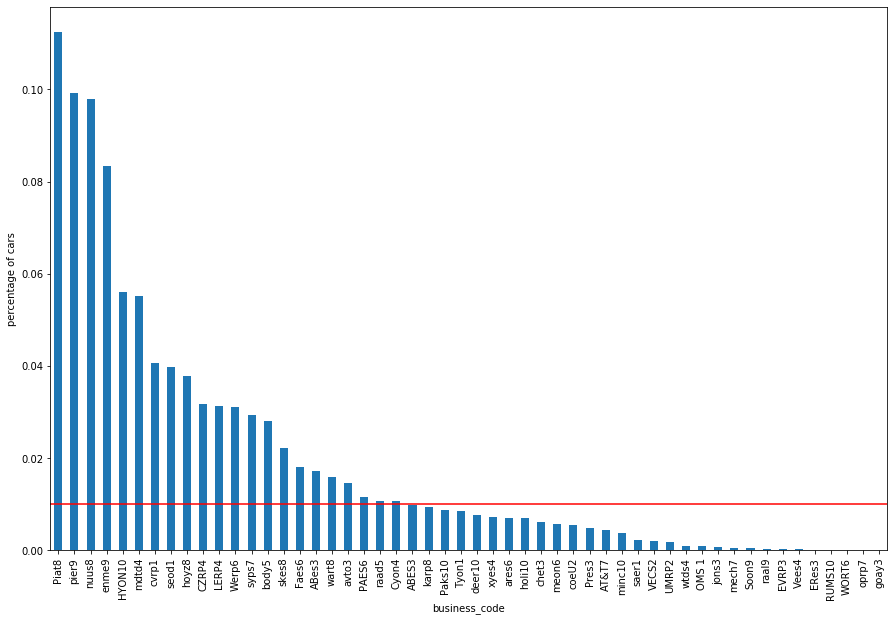

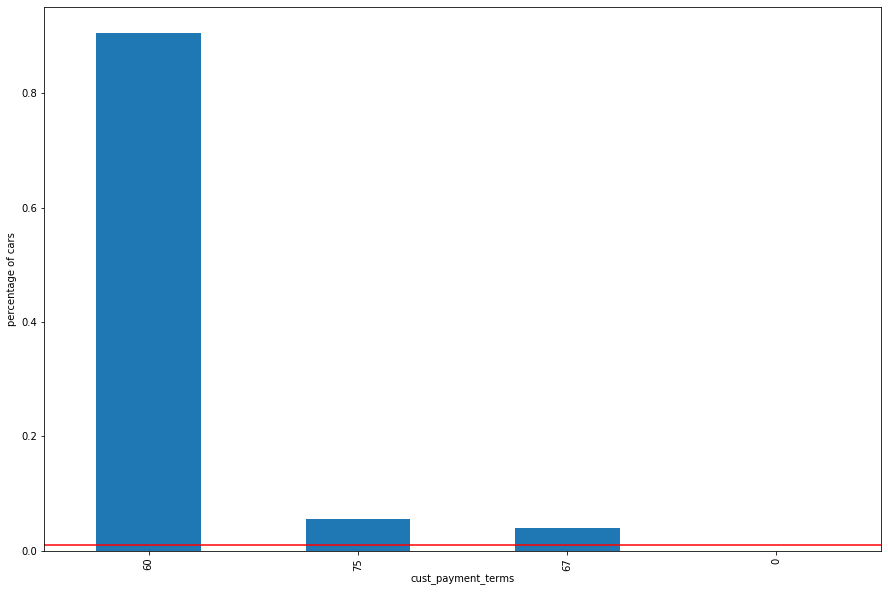

In [72]:
total = len(data)

# for each categorical variable
for col in cols_to_use:

    # count the number of cars per category
    # and divide by total cars

    # aka percentage of cars per category

    temp_df = pd.Series(data[col].value_counts() / total)

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar(figsize=(15,10))
    fig.set_xlabel(col)

    # add a line at 5 %
    fig.axhline(y=0.01, color='red')
    fig.set_ylabel('')
    plt.show()

# To categorize cust_names as rare

In [389]:
def group_rare_labels(df, var):

    total_cars = len(df)

    # first I calculate the 10% of cars for each category
    temp_df = pd.Series(df[var].value_counts() / total_cars)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare'

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= 0.1].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [390]:

data['business_code_grouped'] = group_rare_labels(data, 'business_code')

data[['business_code', 'business_code_grouped']].head(10)

business_code business_code_grouped
0         nuus8                  rare
1         body5                  rare
2         pier9                  rare
3         enme9                  rare
4         CZRP4                  rare
5         Cyon4                  rare
6         nuus8                  rare
7         CZRP4                  rare
8         mdtd4                  rare
9        HYON10                  rare

In [391]:
len(data[data.business_code_grouped=='rare'])

44382

In [392]:
len(data[data.business_code_grouped!='rare'])

5618

In [393]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data.is_open_invoice,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((35000, 3), (15000, 3))

In [394]:
unique_to_train_set = [
    x for x in X_train['business_code'].unique() if x not in X_test['business_code'].unique()
]

print(unique_to_train_set)

['RUMS10', 'goay3']


In [395]:
unique_to_test_set = [
    x for x in X_test['business_code'].unique() if x not in X_train['business_code'].unique()
]

print(unique_to_test_set)

['oprp7']



# OUTLIERS

In [72]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

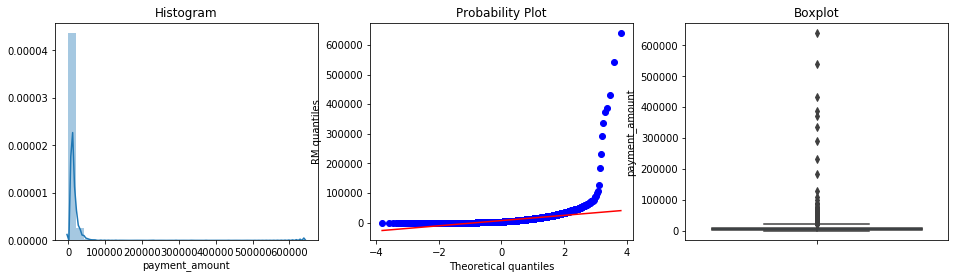

In [73]:
diagnostic_plots(data, 'payment_amount')

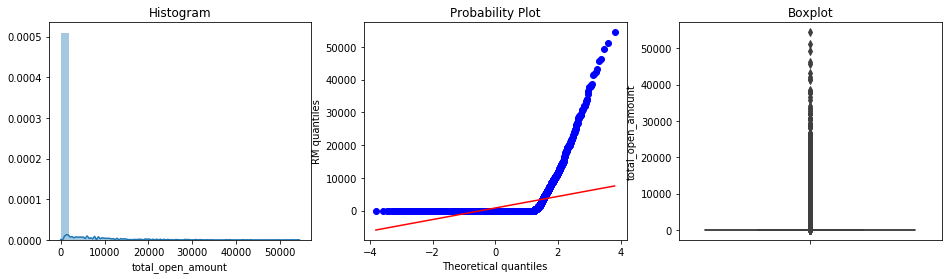

In [74]:
diagnostic_plots(data, 'total_open_amount')

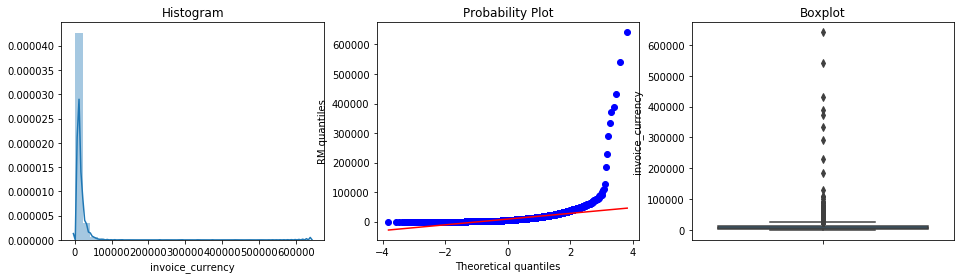

In [75]:
diagnostic_plots(data, 'invoice_currency')

In [76]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [77]:
upper_boundary, lower_boundary = find_skewed_boundaries(data, 'invoice_currency', 1.5)
upper_boundary, lower_boundary

(26127.373750000002, -12987.116250000003)

In [78]:
print('total invoice: {}'.format(len(data)))

print('invoice currency bigger than 26127.37: {}'.format(
    len(data[data['invoice_currency'] > upper_boundary])))
print()
print('% invoice currency bigger than 26127.37: {}'.format(
    len(data[data['invoice_currency'] > upper_boundary])/len(data)))

total invoice: 10000
invoice currency bigger than 26127.37: 588

% invoice currency bigger than 26127.37: 0.0588


In [81]:
data.head()

acct_doc_header_id  doc_number_norm business_code  cust_number_norm  \
0           543926271         47946155         nuus8            218997   
1           532580237         29900369         body5            218998   
2           542315600         44199998         pier9            218994   
3           540278370         40437227         enme9            218996   
4           541942602         43386500         CZRP4            228442   

  name_customer  invoice_id_norm  total_open_amount_norm  cust_payment_terms  \
0       nucleus         47946155                     0.0                  60   
1    bochmanedy         29900369                     0.0                  60   
2    pied piper         44199998                     0.0                  60   
3     end frame         40437227                     0.0                  75   
4   CZERKA CORP         43386500                     0.0                  60   

   is_open_invoice  invoice_currency  ...  payment_amount  days_past_duedate  \
0                0            846.97  ...          846.97                  8   
1                0           4759.90  ...         4759.90                 44   
2                0          26002.48  ...        26002.48                  1   
3                0           5934.24  ...         5934.24                  2   
4                0            185.39  ...          185.39                 12   

   age_invoice  cust_number_mapped  document_create_date_norm_new  \
0           68                   0                     2019-04-04   
1          104                   1                     2017-07-20   
2           61                   2                     2018-12-17   
3           77                   3                     2018-08-16   
4           72                   4                     2018-11-23   

   baseline_create_date_new invoice_date_norm_new shipping_date_new  \
0                       NaT                   NaT               NaT   
1                       NaT                   NaT               NaT   
2                       NaT                   NaT               NaT   
3                       NaT                   NaT               NaT   
4                       NaT                   NaT               NaT   

  clear_date_norm_new business_code_grouped  
0          2019-06-11                  rare  
1          2017-10-08                  rare  
2          2019-02-16                  rare  
3          2018-11-01                  rare  
4          2019-02-03                  rare  

[5 rows x 22 columns]

# CHECKING FOR OUTLIERS


In [80]:
Q1 = data.quantile(0.25)#calculating IQR 
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

acct_doc_header_id    7.067191e+06
doc_number            1.159370e+07
cust_number           9.101000e+03
total_open_amount     0.000000e+00
cust_payment_terms    0.000000e+00
is_open_invoice       0.000000e+00
invoice_currency      9.778623e+03
payment_amount        8.712552e+03
days_past_duedate     8.000000e+00
age_invoice           1.000000e+01
cust_number_mapped    1.600000e+01
dtype: float64


In [85]:
a=data.loc[:,['acct_doc_header_id','doc_number','cust_number','total_open_amount','cust_payment_terms','is_open_invoice','invoice_currency','payment_amount','days_past_duedate','age_invoice','cust_number_mapped']]
(a < (Q1 - 1.5 * IQR)) |(a > (Q3 + 1.5 * IQR))

acct_doc_header_id  doc_number  cust_number  total_open_amount  \
49457               False       False        False              False   
20706               False       False        False              False   
46059               False       False        False               True   
38076               False       False        False              False   
8394                False       False        False              False   
...                   ...         ...          ...                ...   
34398               False       False        False              False   
41323               False       False        False              False   
17138               False       False        False              False   
14034               False       False        False              False   
31387               False       False        False              False   

       cust_payment_terms  is_open_invoice  invoice_currency  payment_amount  \
49457               False            False             False           False   
20706               False            False             False           False   
46059               False             True             False           False   
38076               False            False             False           False   
8394                False            False             False           False   
...                   ...              ...               ...             ...   
34398               False            False             False           False   
41323               False            False             False           False   
17138               False            False             False           False   
14034               False            False             False            True   
31387               False            False             False            True   

       days_past_duedate  age_invoice  cust_number_mapped  
49457               True         True               False  
20706               True         True               False  
46059               True         True               False  
38076              False        False               False  
8394               False        False               False  
...                  ...          ...                 ...  
34398              False        False               False  
41323              False        False               False  
17138              False        False               False  
14034              False        False               False  
31387              False        False               False  

[10000 rows x 11 columns]

In [96]:
data.clear_date_new.isnull().sum()

1082

# Grouping cust_names 

In [396]:
grouped=data.groupby('name_customer')             #INVOICE CURRENCY FOR EACH COMPANY

for name,group in grouped:
    print(name)
    
    print('total open amount : {}'.format(group.total_open_amount_norm.sum()))
    print('total invoice currency : {}'.format(group.invoice_currency.sum()))
    print('total payment amount : {}'.format(group.payment_amount.sum()))
    print('')
         # print('total invoice amount : {}'.format(total_invoice_currency))

ABC Softwares
total open amount : 1695650.66
total invoice currency : 16013340.49
total payment amount : 12128405.61

ABSTERGO INDUSTRIES
total open amount : 116049.34
total invoice currency : 4284624.93
total payment amount : 3871341.29

AT&T
total open amount : 272896.77
total invoice currency : 3296735.9399999995
total payment amount : 2770005.4499999997

CZERKA CORP
total open amount : 728058.04
total invoice currency : 10224951.87
total payment amount : 8696186.71

Cyberdyne Systems Corporation
total open amount : 324300.48
total invoice currency : 4201217.140000001
total payment amount : 3500376.62

ERT companies
total open amount : 0.0
total invoice currency : 99335.84
total payment amount : 99335.84

EVIL CORP
total open amount : 0.0
total invoice currency : 99073.14
total payment amount : 99073.14

Fatboy Industries
total open amount : 825625.15
total invoice currency : 8192922.840000001
total payment amount : 6870128.2700000005

HYPERION CORPORATION
total open amount : 183110

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


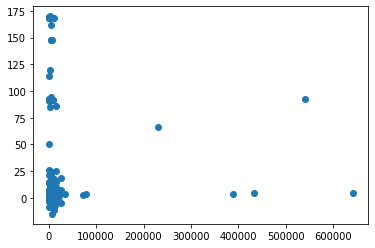

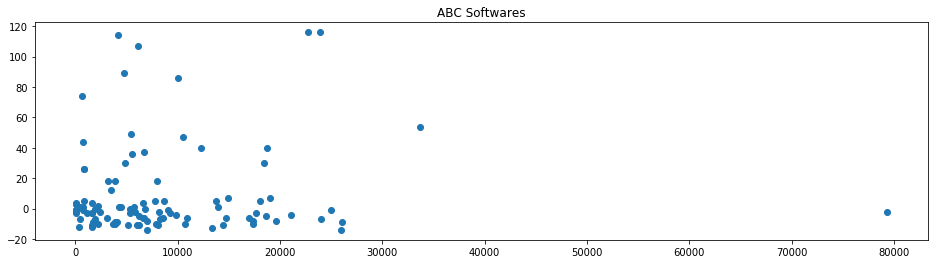

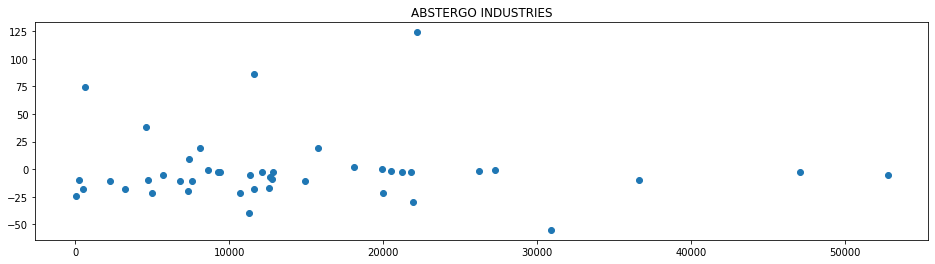

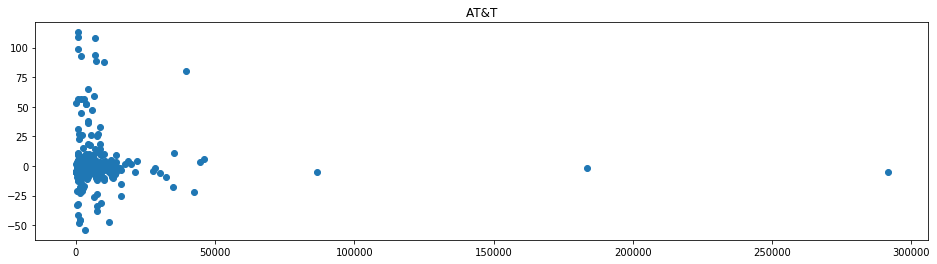

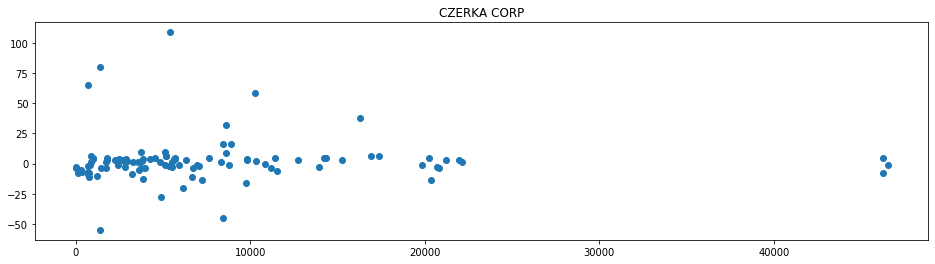

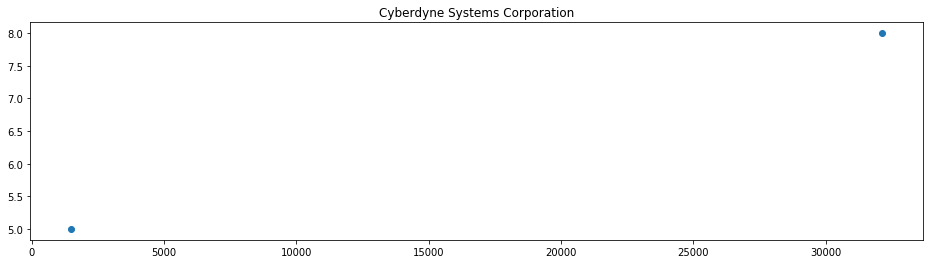

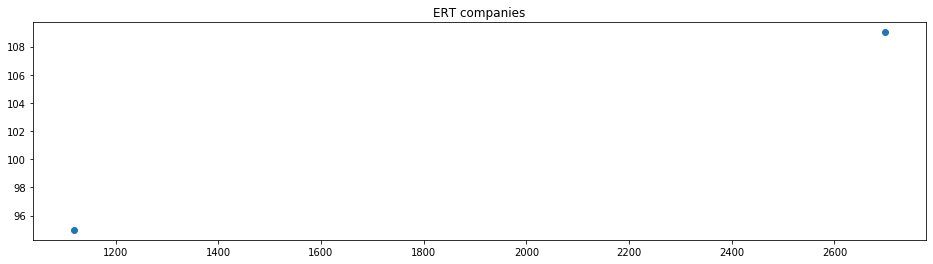

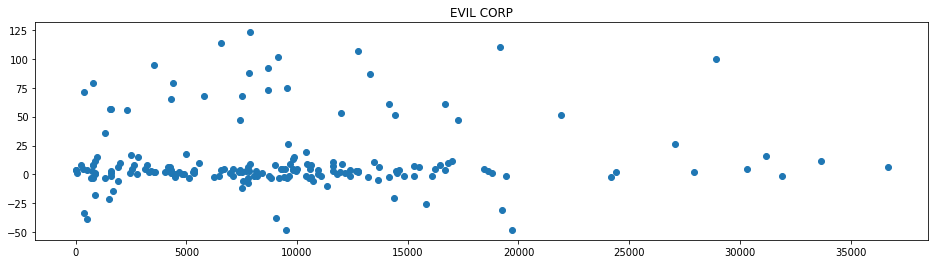

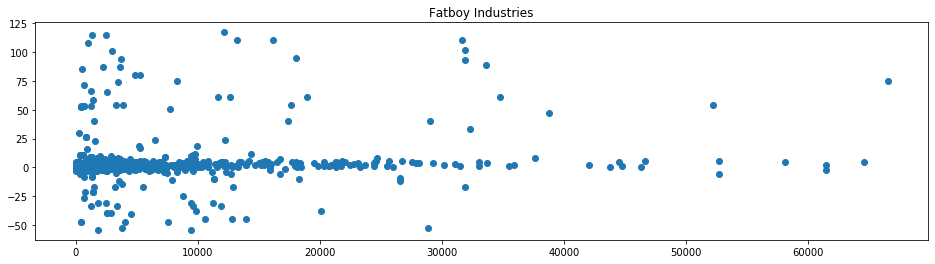

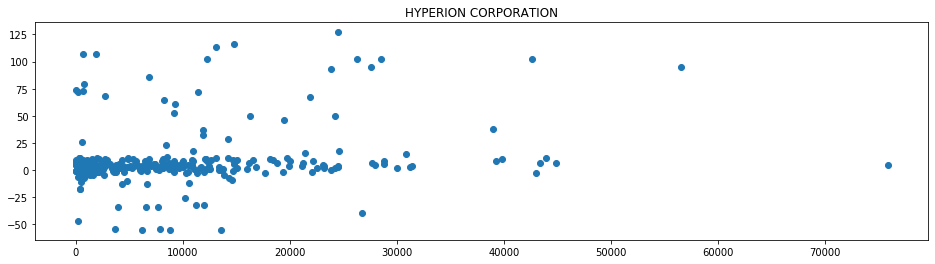

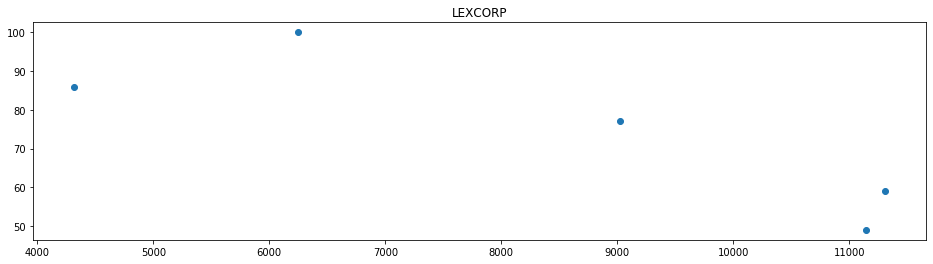

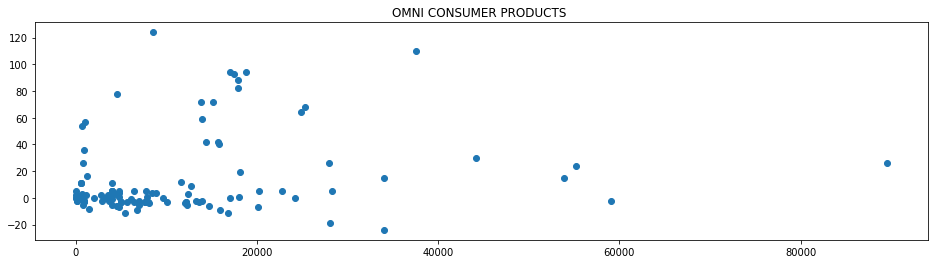

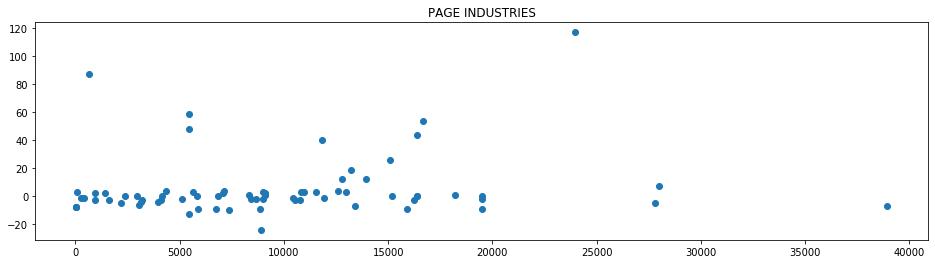

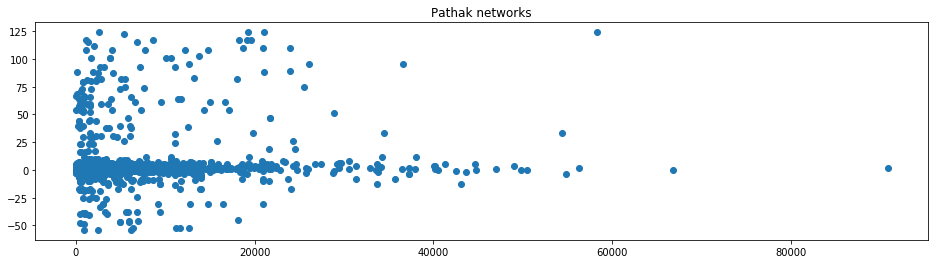

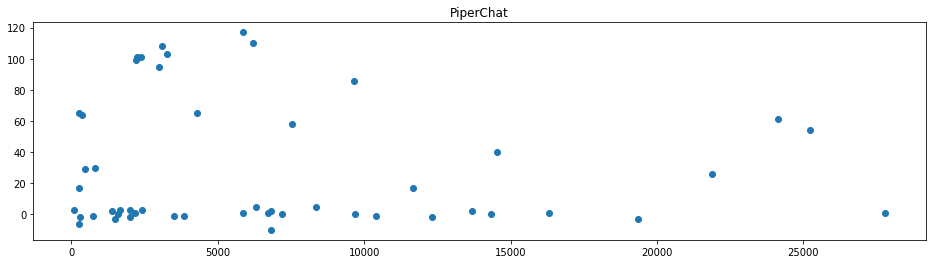

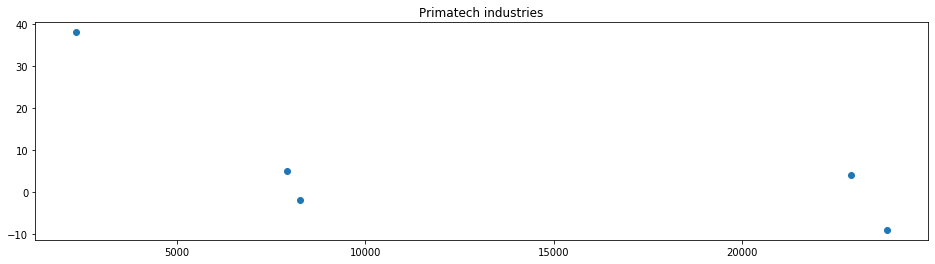

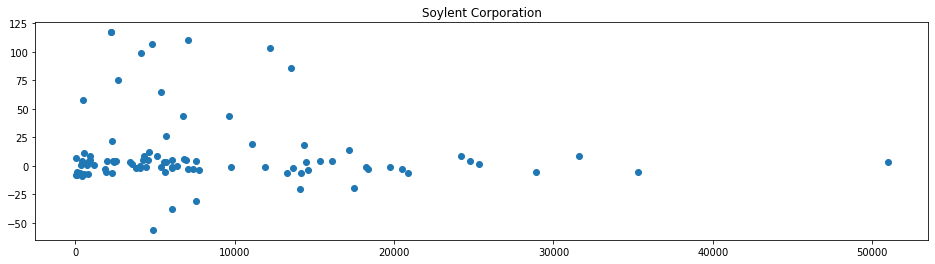

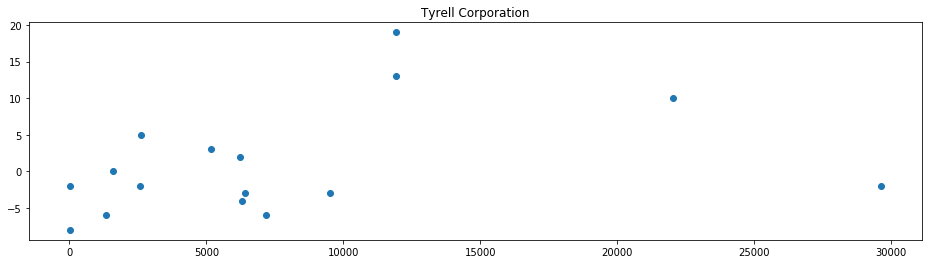

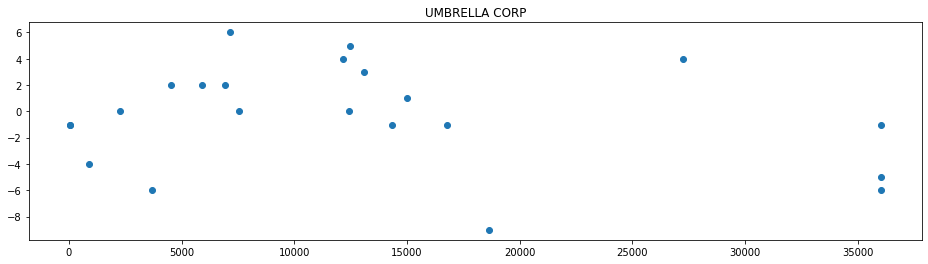

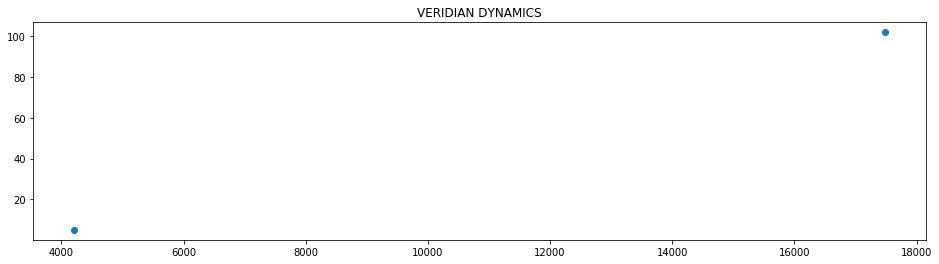

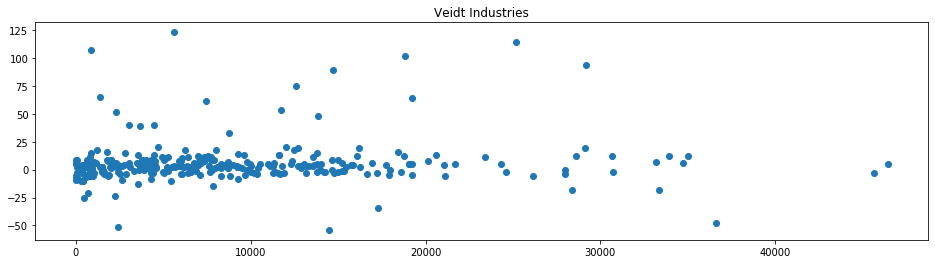

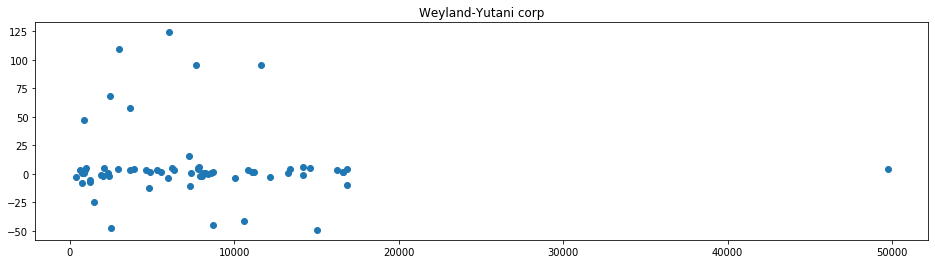

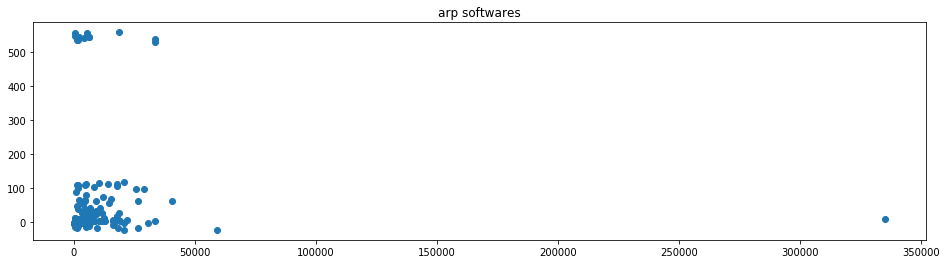

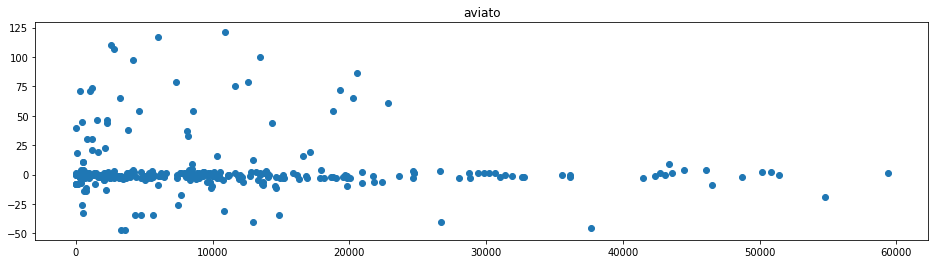

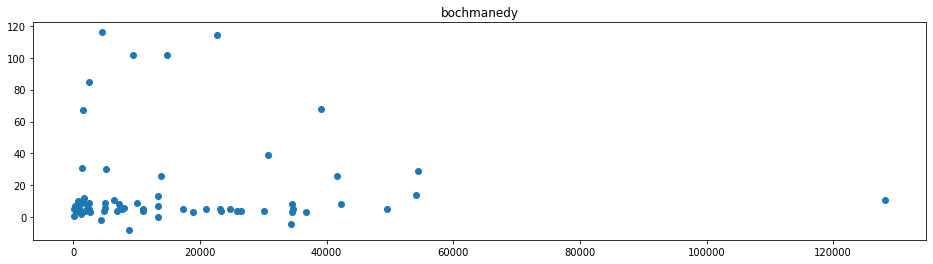

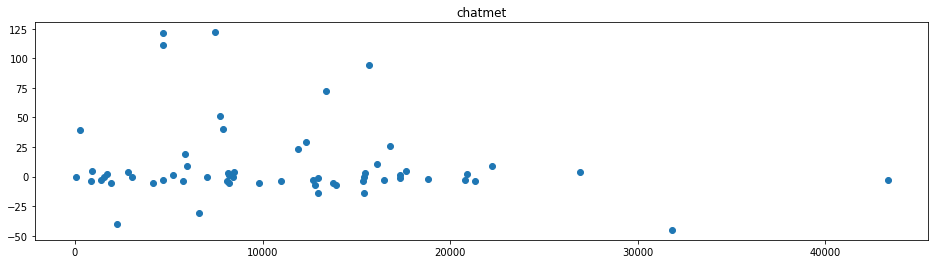

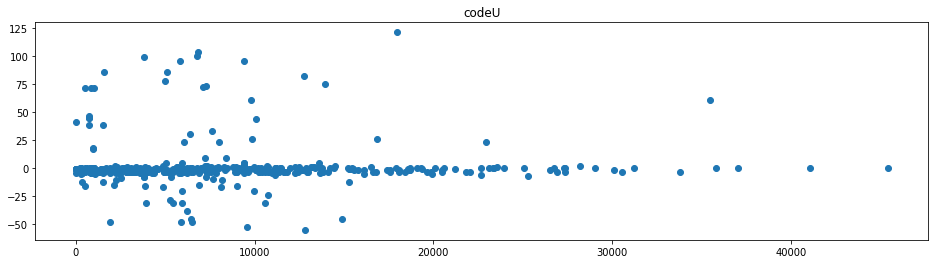

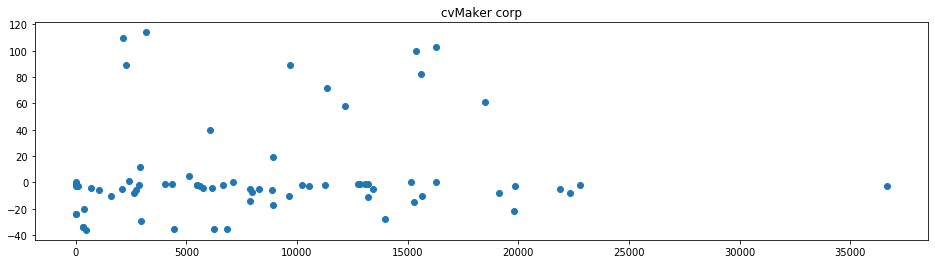

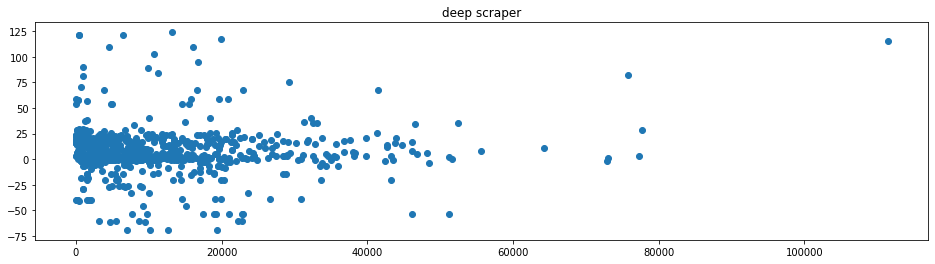

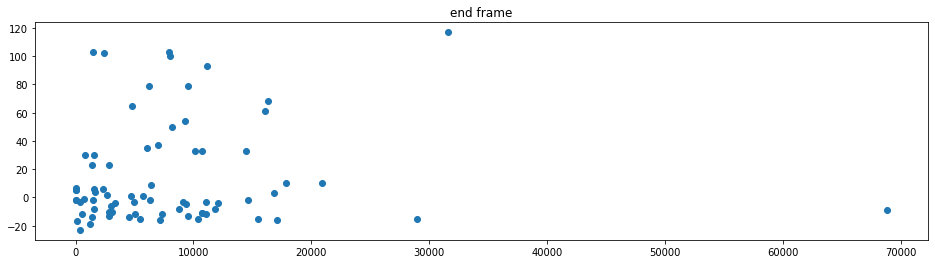

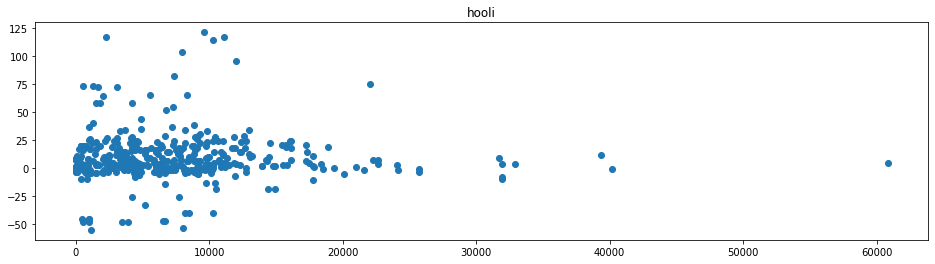

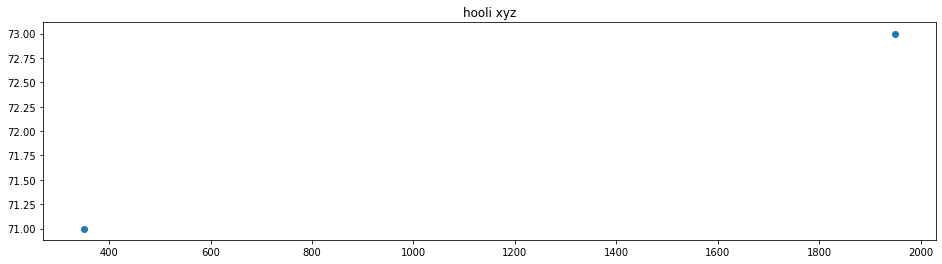

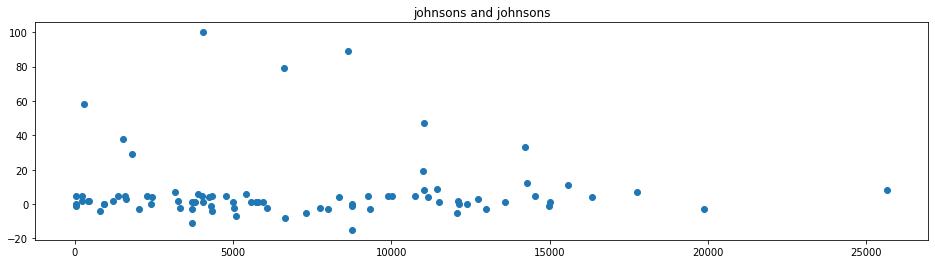

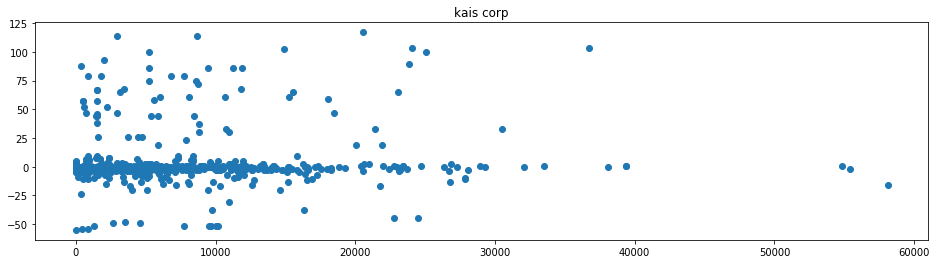

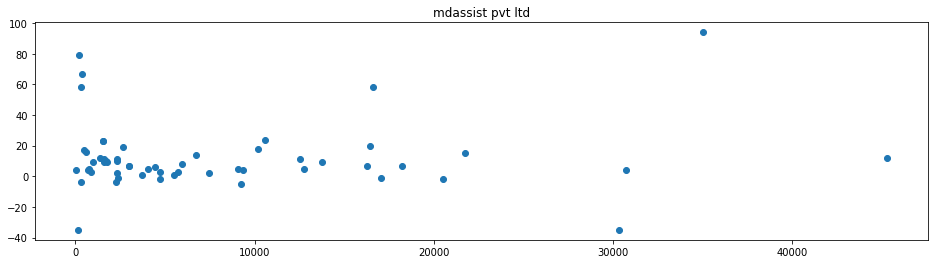

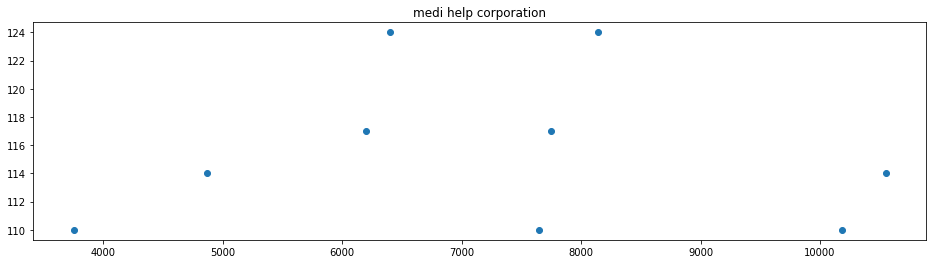

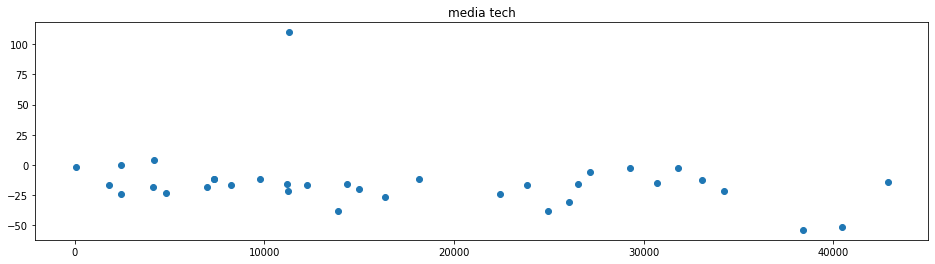

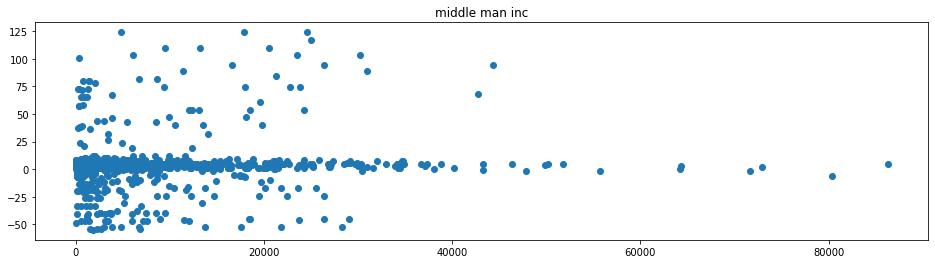

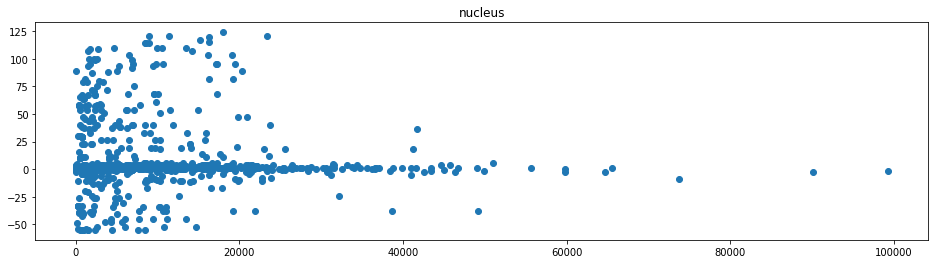

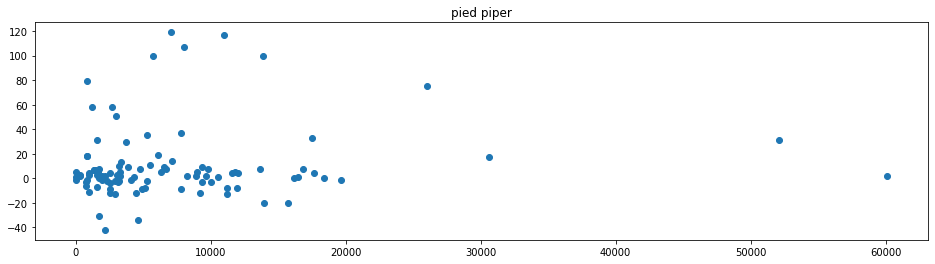

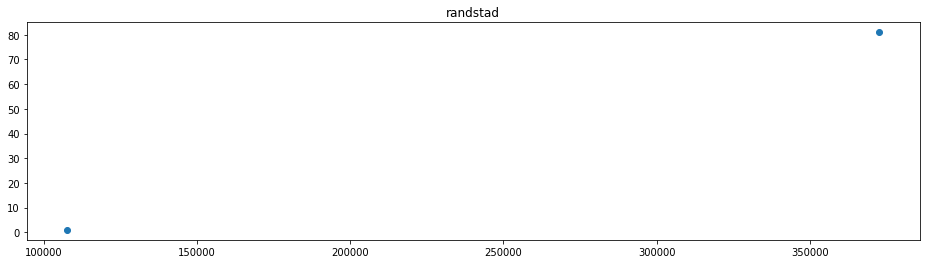

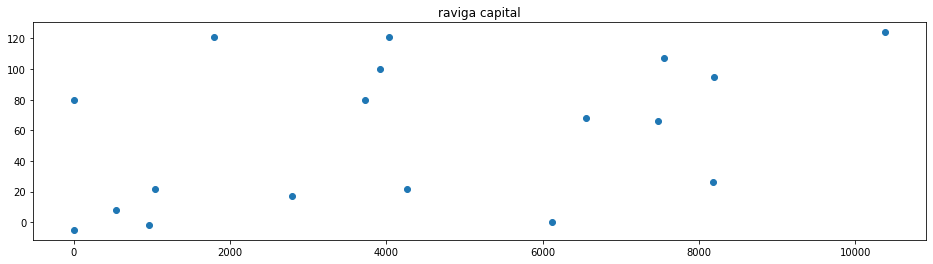

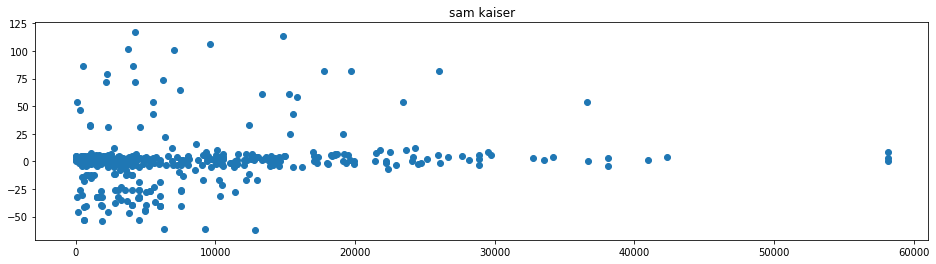

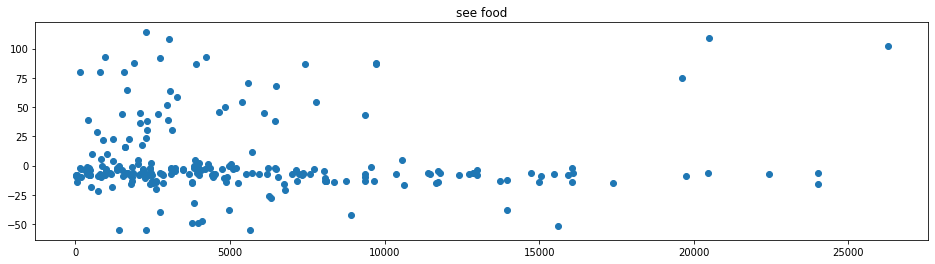

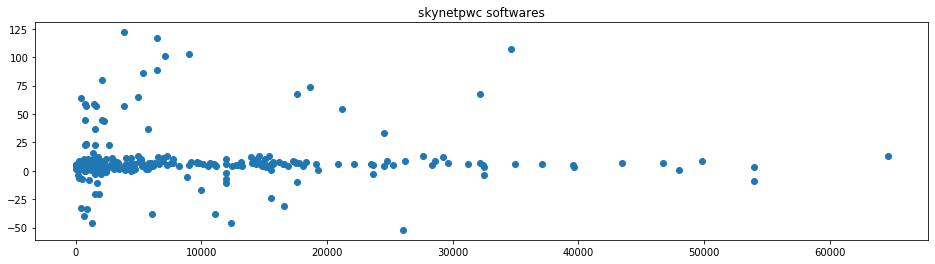

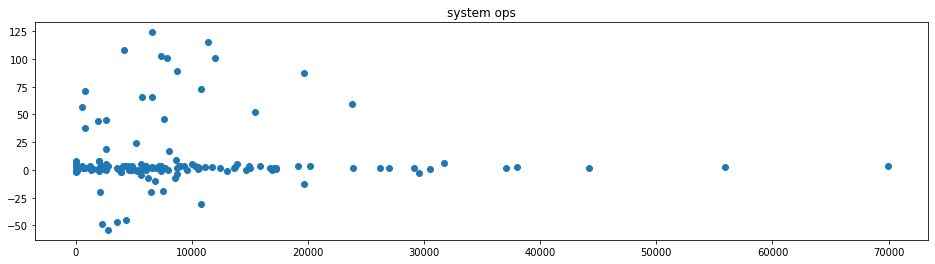

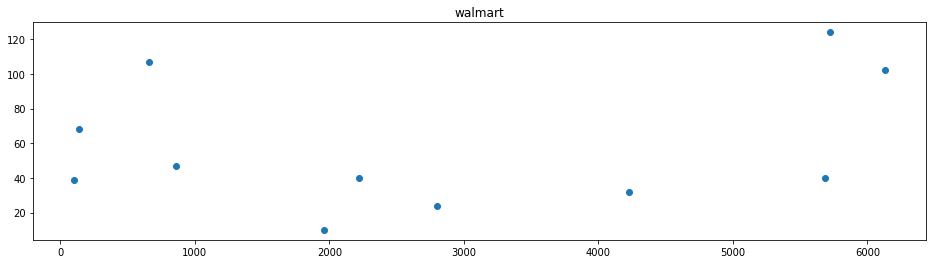

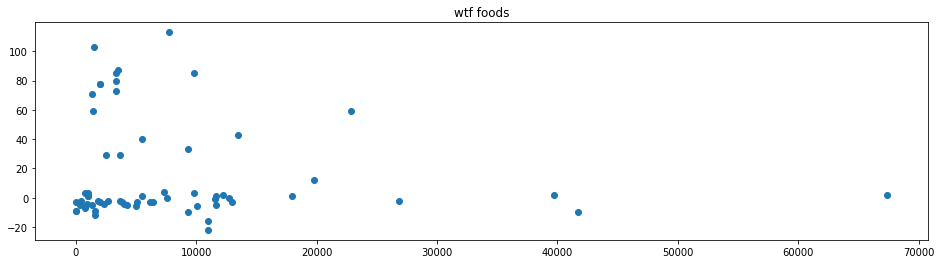

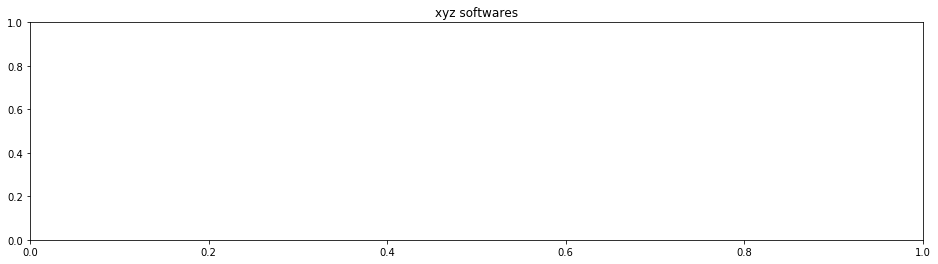

In [122]:
grouped=data.groupby('name_customer')             #INVOICE CURRENCY FOR EACH COMPANY V/S DAYS_PAST_DUEDATE
i=0
for name,group in grouped:
    #print(name)
    a=(group.invoice_currency)
    b=group.days_past_duedate
    plt.scatter(a,b)
    plt.figure(figsize=(16, 4))
    plt.title(name)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


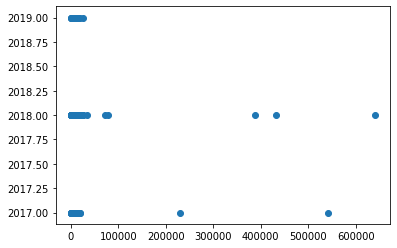

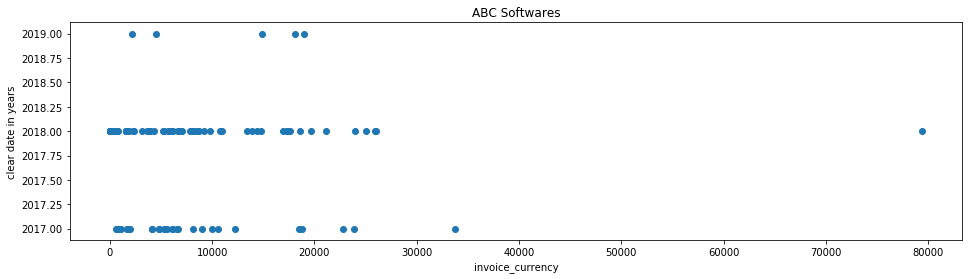

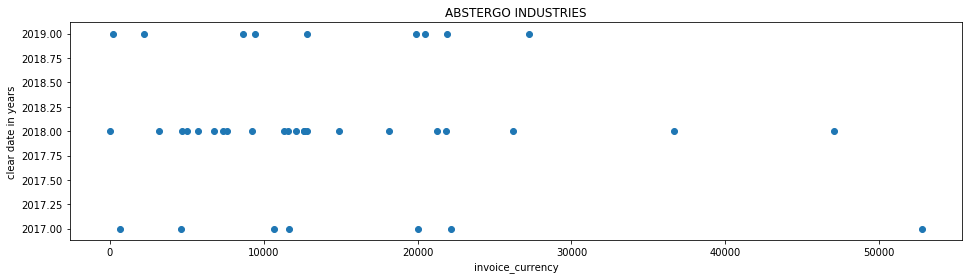

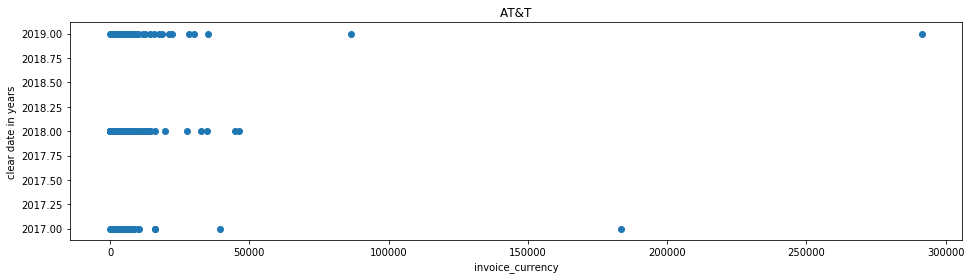

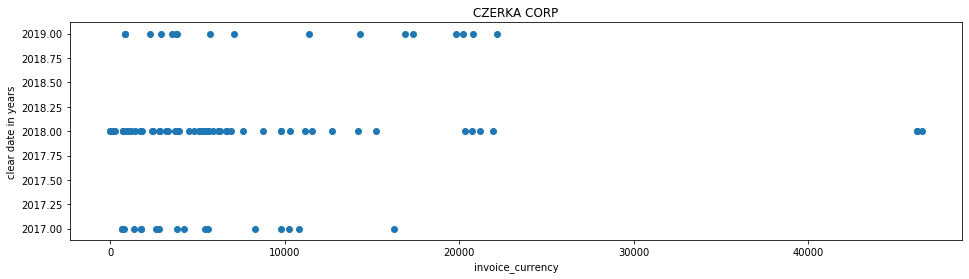

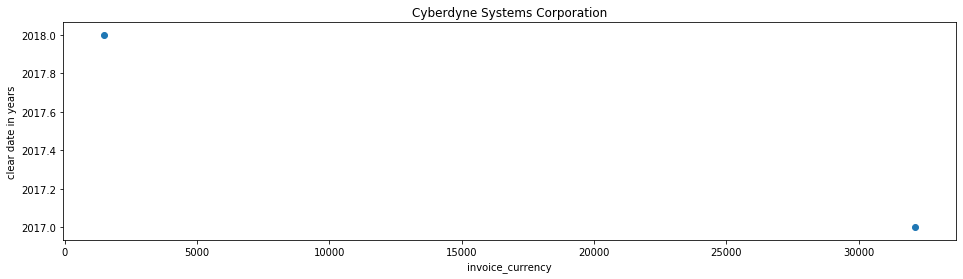

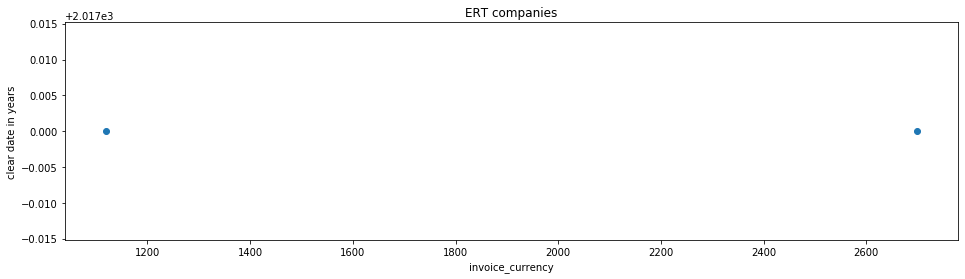

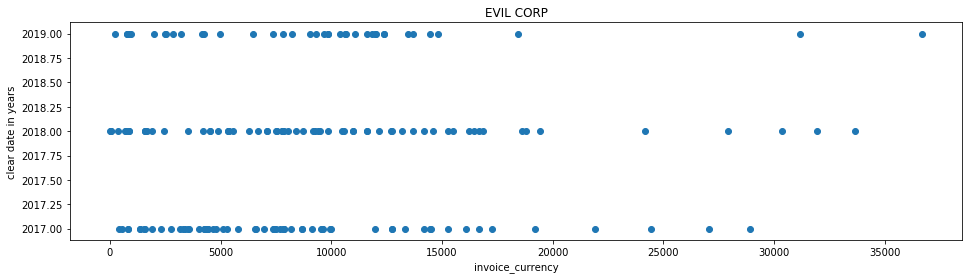

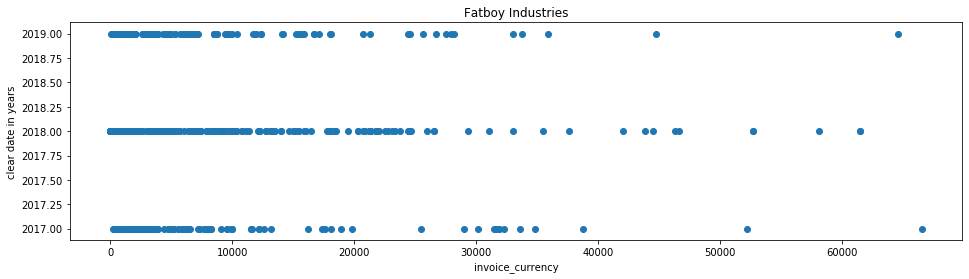

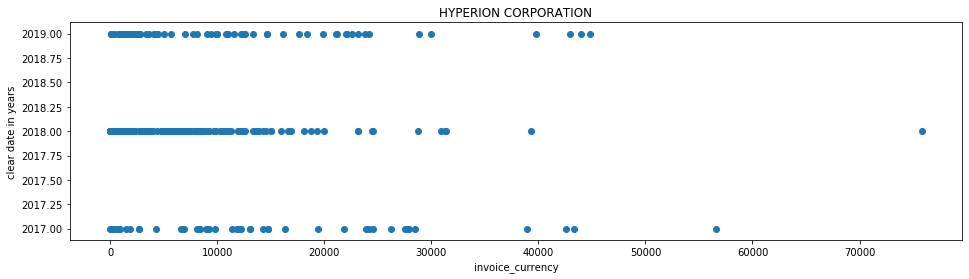

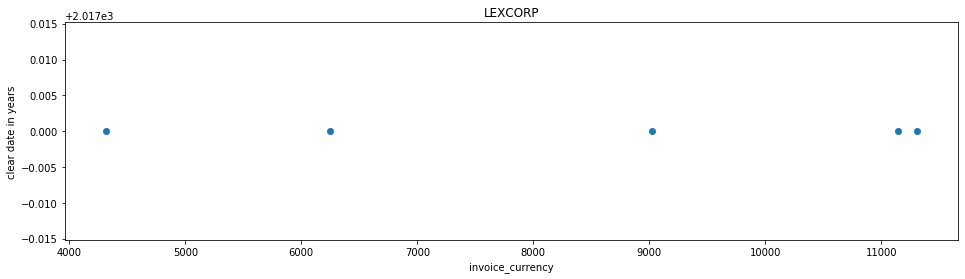

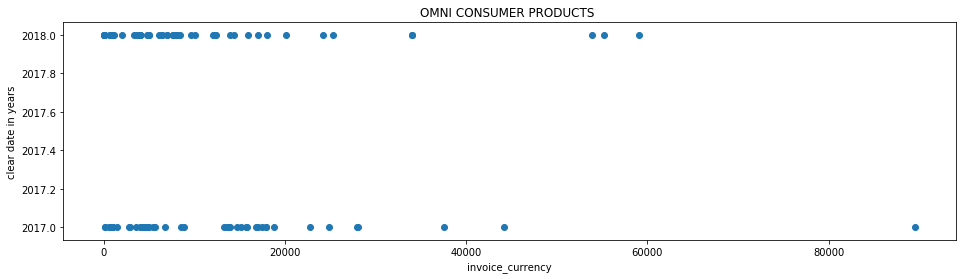

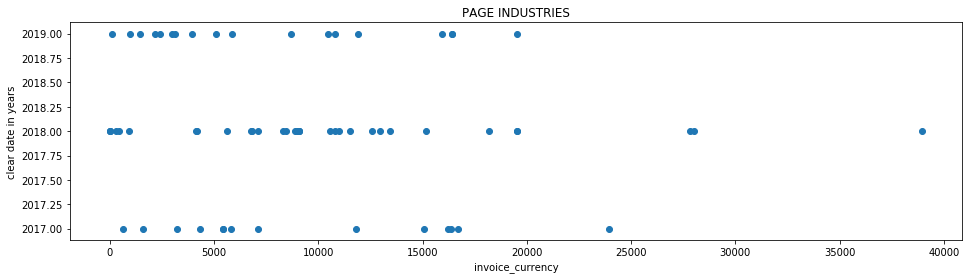

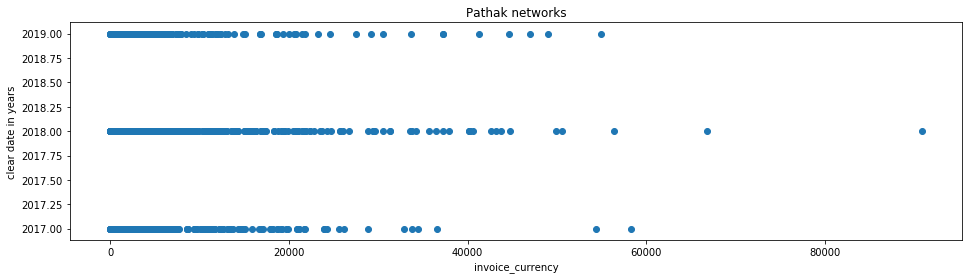

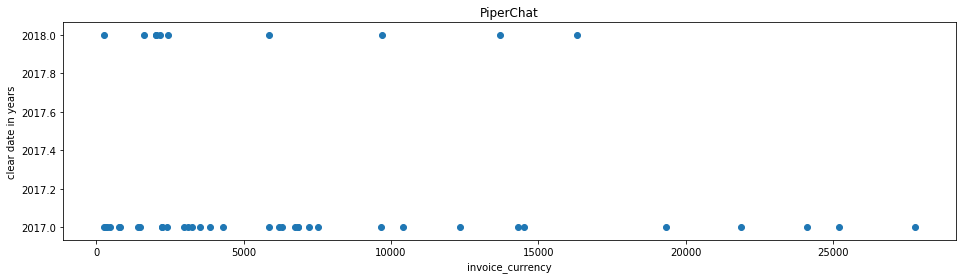

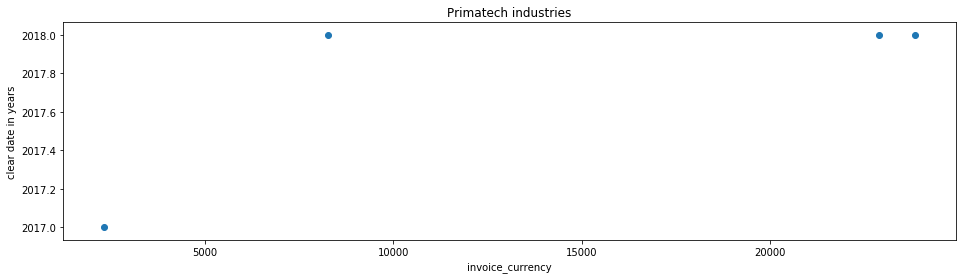

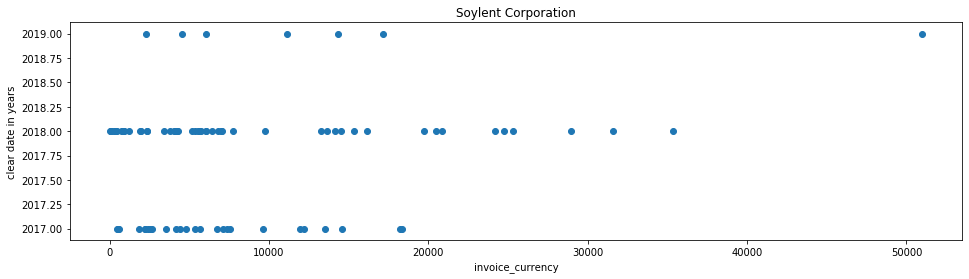

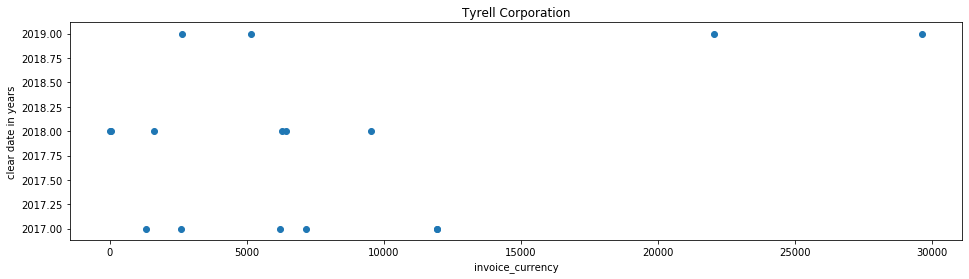

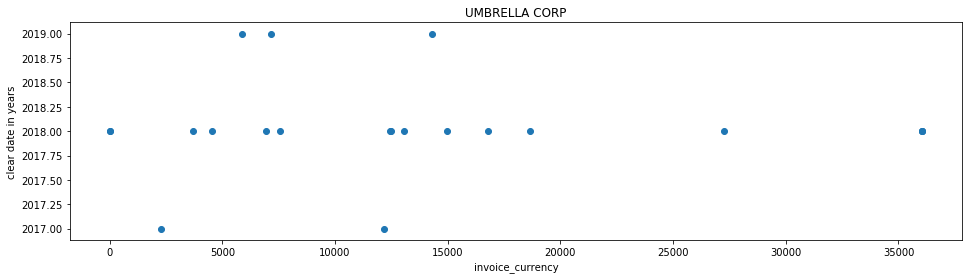

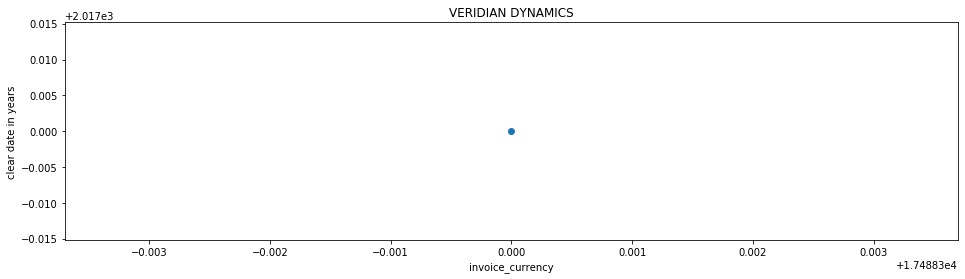

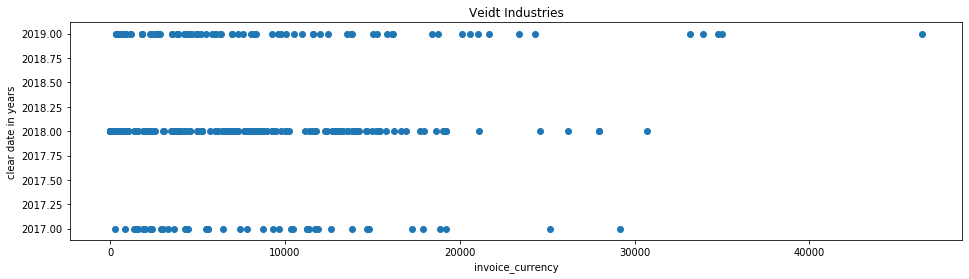

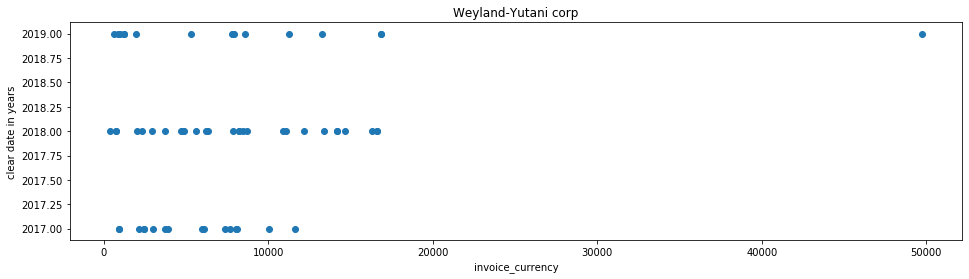

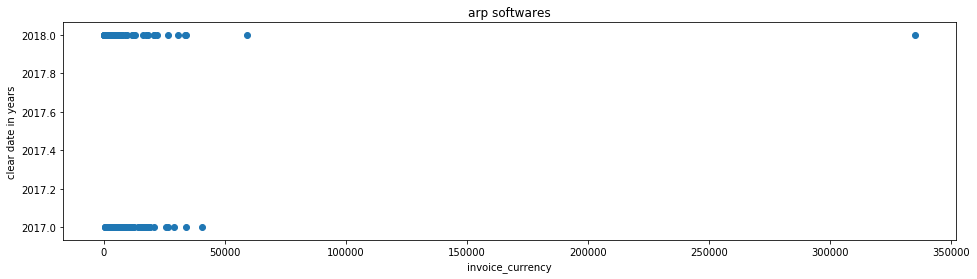

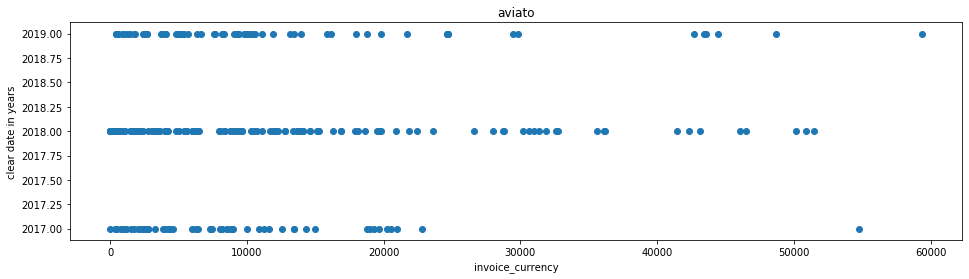

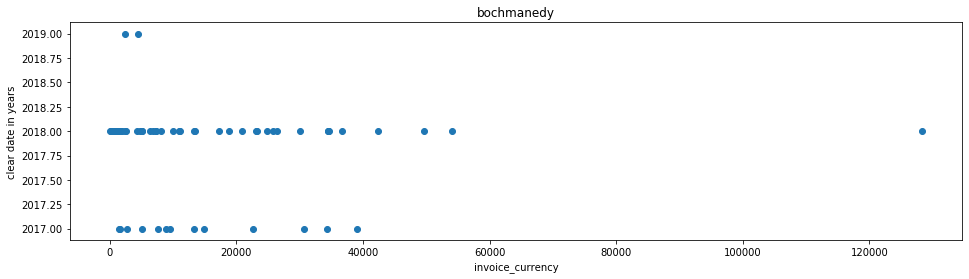

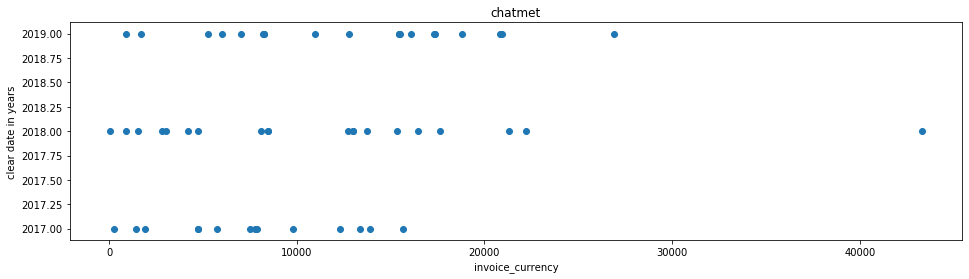

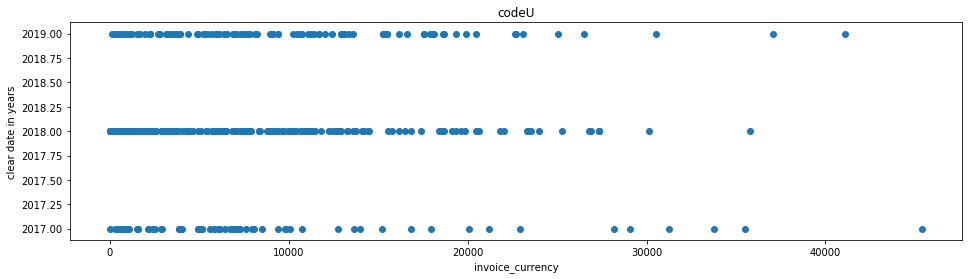

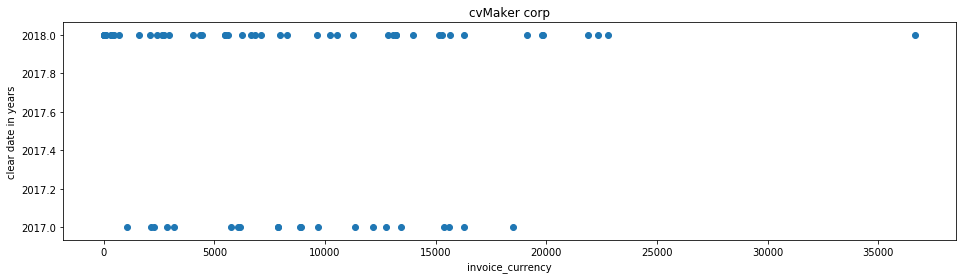

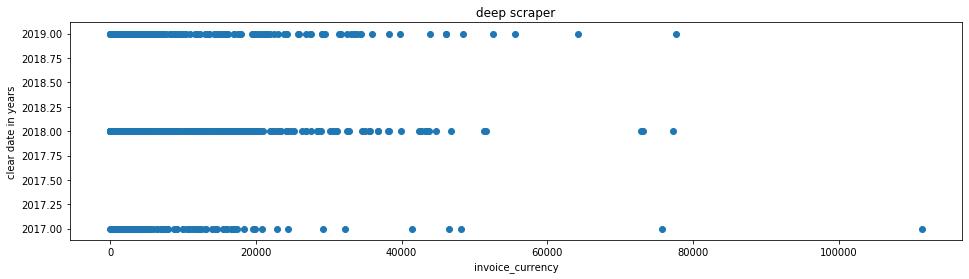

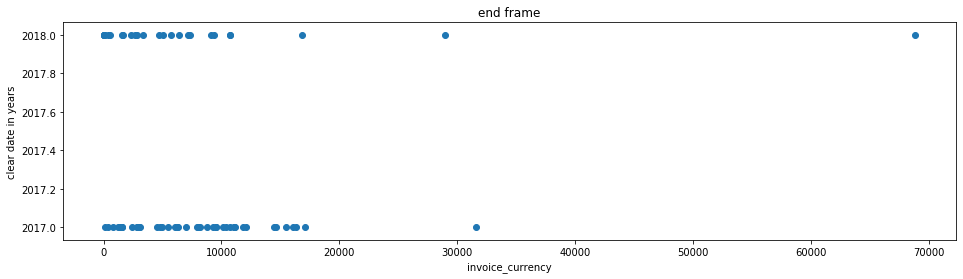

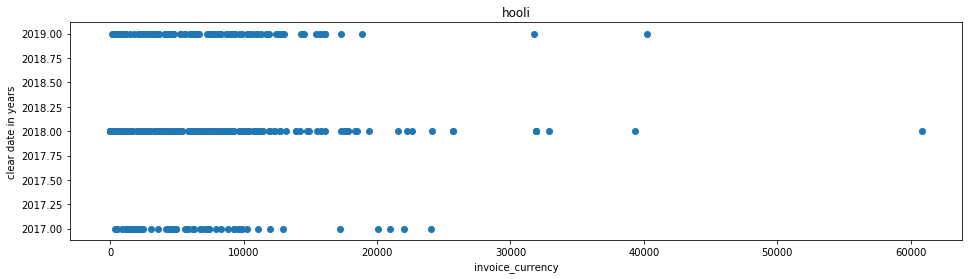

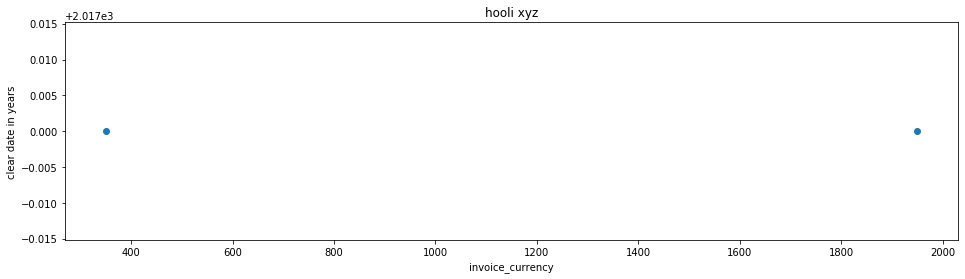

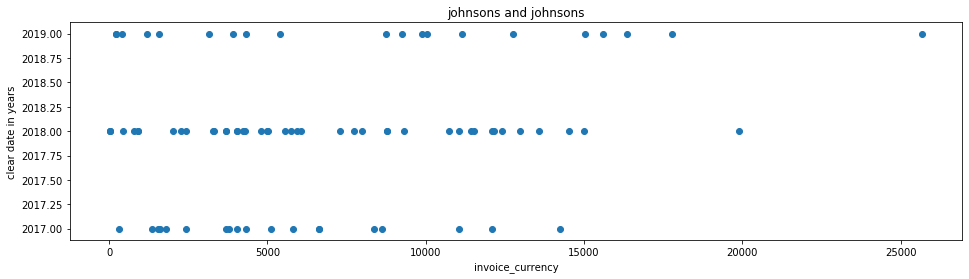

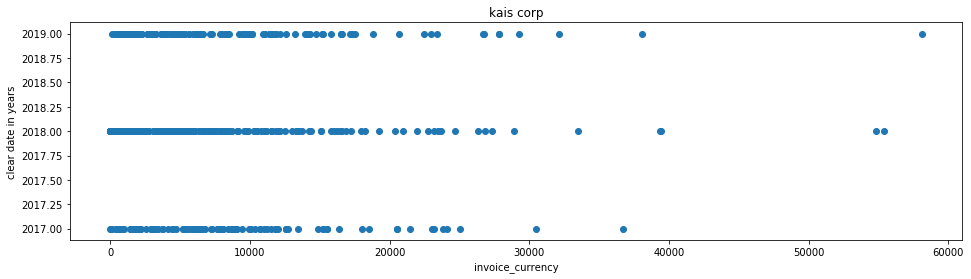

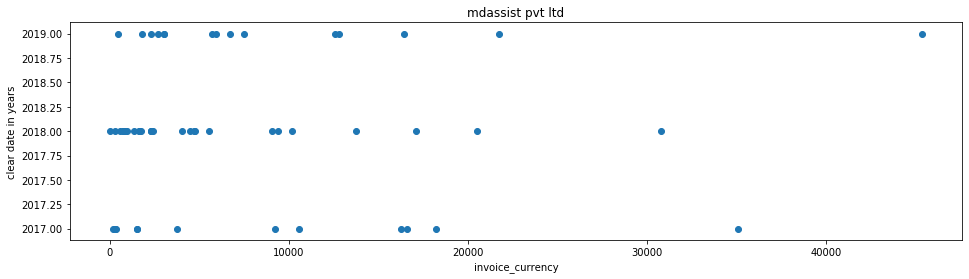

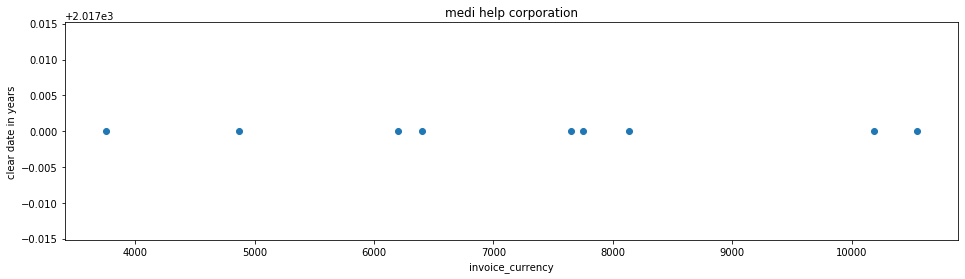

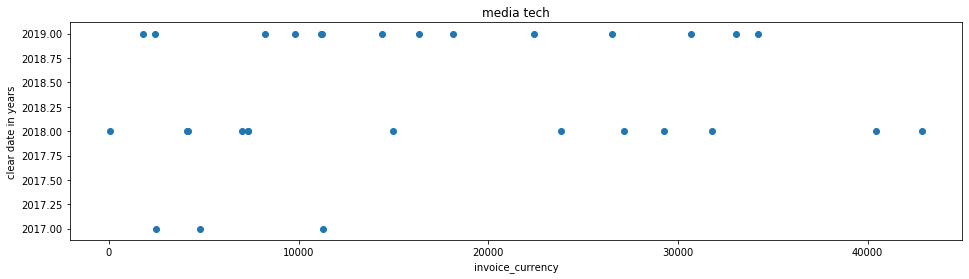

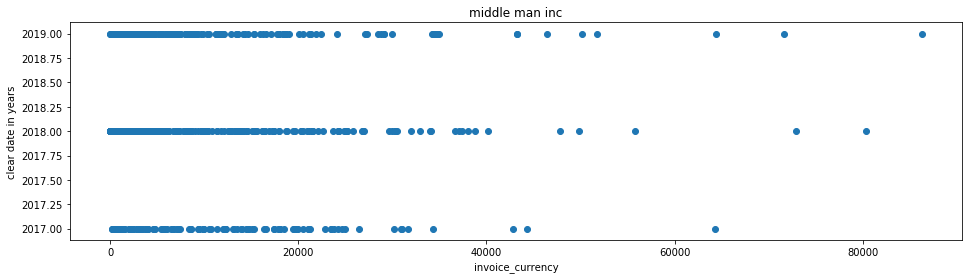

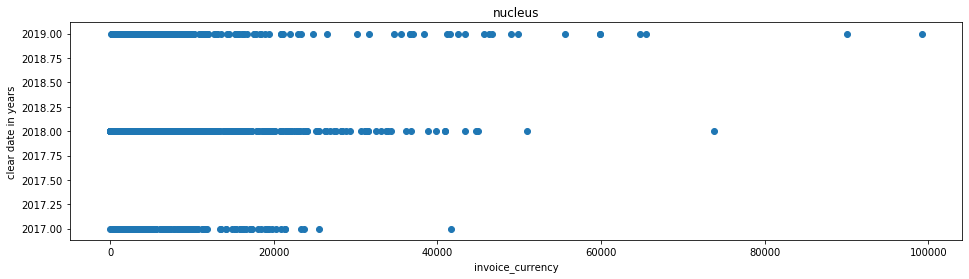

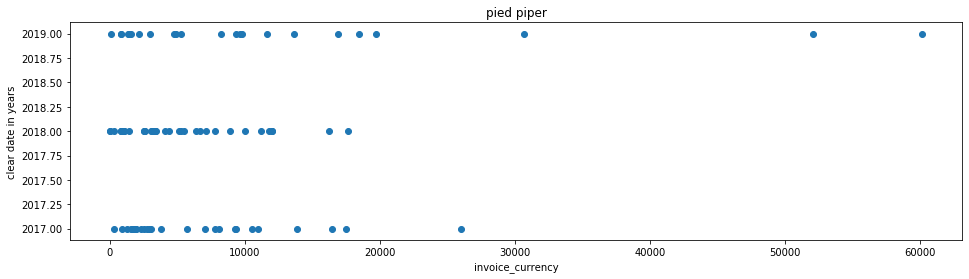

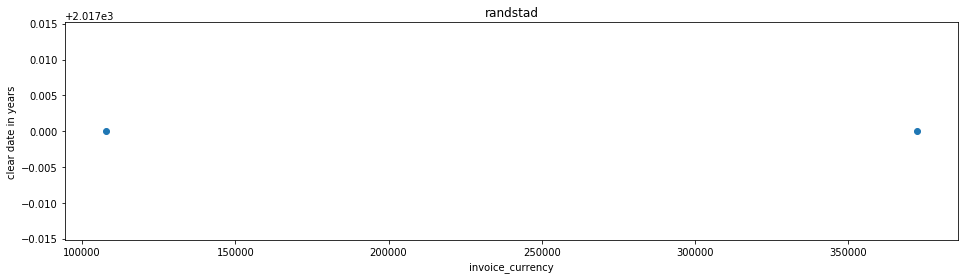

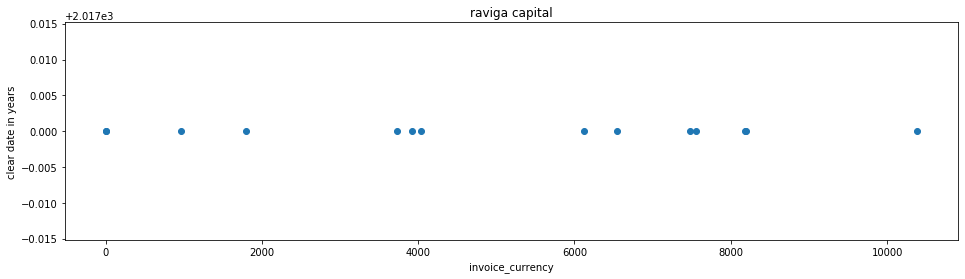

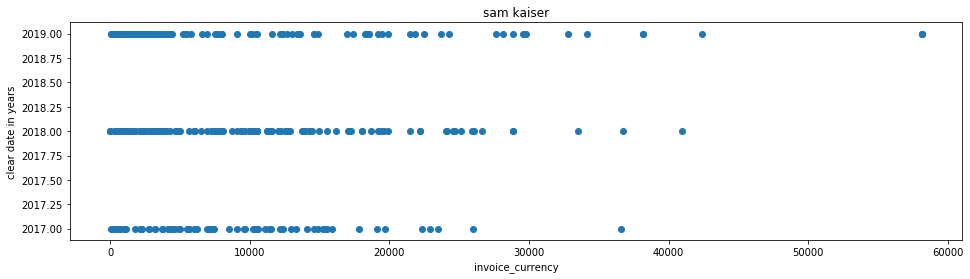

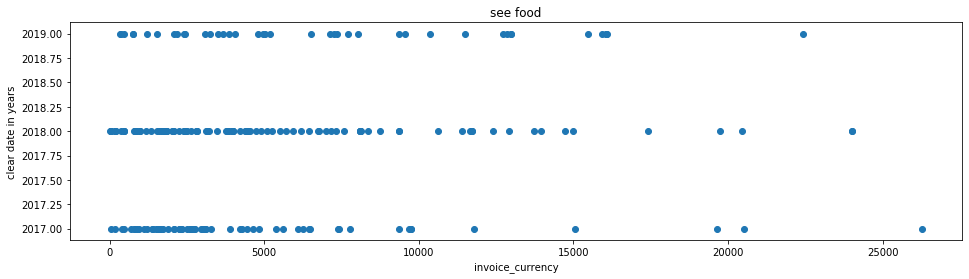

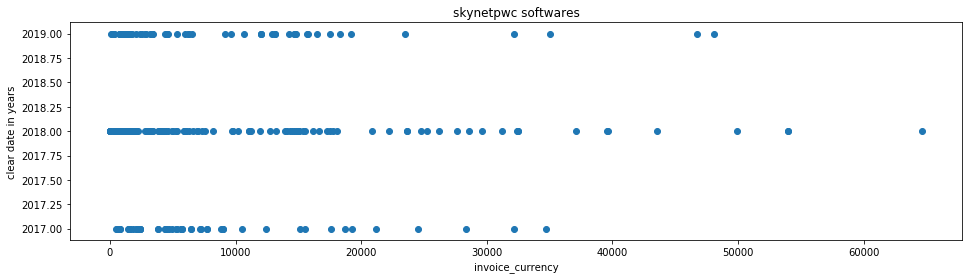

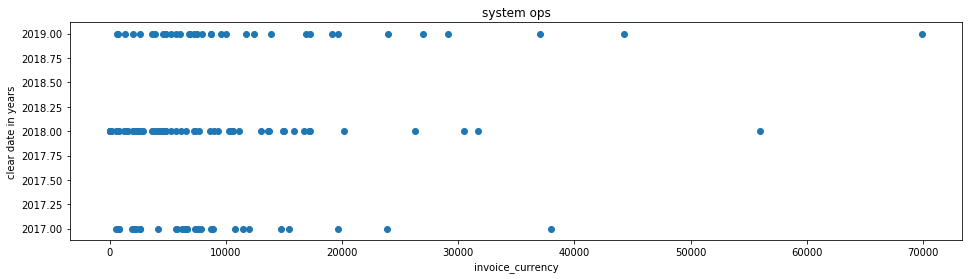

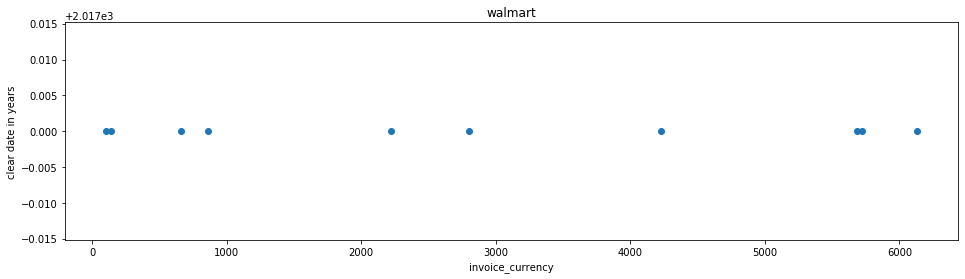

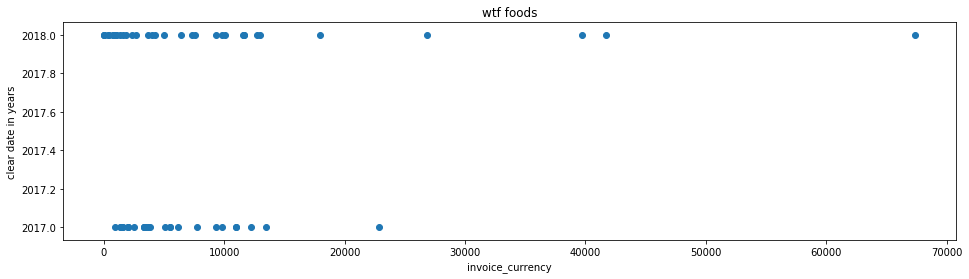

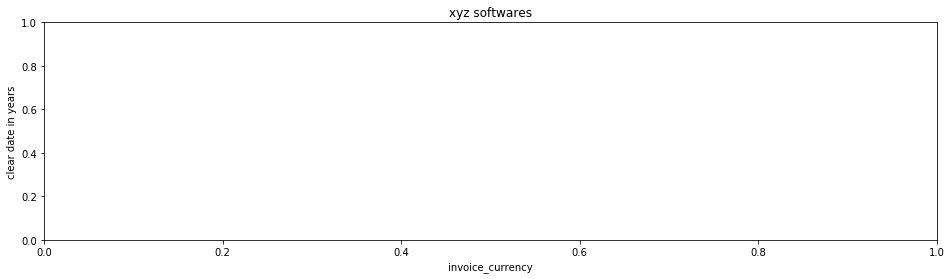

In [127]:
grouped=data.groupby('name_customer')             #INVOICE CURRENCY FOR EACH COMPANY
for name,group in grouped:
    #print(name)
    a=(group.invoice_currency)
    b=group.clear_date_new.dt.year
    plt.scatter(a,b)
    plt.figure(figsize=(16, 4))
    plt.title(name)
    plt.ylabel('clear date in years')
    plt.xlabel('invoice_currency')

# check the presence of null data


In [397]:
[col for col in data.columns if data[col].isnull().sum() > 0]

['baseline_create_date_new',
 'invoice_date_norm_new',
 'shipping_date_new',
 'clear_date_norm_new']

In [398]:
data.head(20)

acct_doc_header_id  doc_number_norm business_code  cust_number_norm  \
0            543926271         47946155         nuus8            218997   
1            532580237         29900369         body5            218998   
2            542315600         44199998         pier9            218994   
3            540278370         40437227         enme9            218996   
4            541942602         43386500         CZRP4            228442   
5            535749005         33725445         Cyon4            228462   
6            536748110         35708642         nuus8            218997   
7            534049156         31951925         CZRP4            228442   
8            537513292         36892281         mdtd4            226552   
9            542641738         45094140        HYON10            228140   
10           535521959         33245841         Werp6            228616   
11           541541050         42565009         ABes3            226547   
12           532273783         29575235         Piat8            219001   
13           536872559         35919091         pier9            218994   
14           535727640         33678204         body5            218998   
15           532810116         30155268         chet3            228084   
16           535396731         32978403         body5            218998   
17           535422212         33053171         mdtd4            226552   
18           532792957         30112066         pier9            218994   
19           544073136         48289875         nuus8            218997   

                    name_customer  invoice_id_norm  total_open_amount_norm  \
0                         nucleus         47946155                     0.0   
1                      bochmanedy         29900369                     0.0   
2                      pied piper         44199998                     0.0   
3                       end frame         40437227                     0.0   
4                     CZERKA CORP         43386500                     0.0   
5   Cyberdyne Systems Corporation         33725445                     0.0   
6                         nucleus         35708642                     0.0   
7                     CZERKA CORP         31951925                     0.0   
8                mdassist pvt ltd         36892281                     0.0   
9            HYPERION CORPORATION         45094140                     0.0   
10            Weyland-Yutani corp         33245841                     0.0   
11                  ABC Softwares         42565009                     0.0   
12                      PiperChat         29575235                     0.0   
13                     pied piper         35919091                     0.0   
14                     bochmanedy         33678204                     0.0   
15                        chatmet         30155268                     0.0   
16                     bochmanedy         32978403                     0.0   
17               mdassist pvt ltd         33053171                     0.0   
18                     pied piper         30112066                     0.0   
19                        nucleus         48289875                     0.0   

    cust_payment_terms  is_open_invoice  invoice_currency     doc_id  \
0                   60                0            846.97  543926271   
1                   60                0           4759.90  532580237   
2                   60                0          26002.48  542315600   
3                   75                0           5934.24  540278370   
4                   60                0            185.39  541942602   
5                   60                0          68221.41  535749005   
6                   60                0             14.00  536748110   
7                   60                0           5342.56  534049156   
8                   60                0           1605.23  537513292   
9                   60                0           1037.14  542641738 

In [399]:
from IPython.display import display
pd.options.display.max_columns = None


In [400]:
data.head()

acct_doc_header_id  doc_number_norm business_code  cust_number_norm  \
0           543926271         47946155         nuus8            218997   
1           532580237         29900369         body5            218998   
2           542315600         44199998         pier9            218994   
3           540278370         40437227         enme9            218996   
4           541942602         43386500         CZRP4            228442   

  name_customer  invoice_id_norm  total_open_amount_norm  cust_payment_terms  \
0       nucleus         47946155                     0.0                  60   
1    bochmanedy         29900369                     0.0                  60   
2    pied piper         44199998                     0.0                  60   
3     end frame         40437227                     0.0                  75   
4   CZERKA CORP         43386500                     0.0                  60   

   is_open_invoice  invoice_currency     doc_id  actual_outstanding_amount  \
0                0            846.97  543926271                     846.97   
1                0           4759.90  532580237                    4759.90   
2                0          26002.48  542315600                   26002.48   
3                0           5934.24  540278370                    5934.24   
4                0            185.39  541942602                     185.39   

   payment_amount  days_past_duedate  age_invoice  cust_number_mapped  \
0          846.97                  8           68                   0   
1         4759.90                 44          104                   1   
2        26002.48                  1           61                   2   
3         5934.24                  2           77                   3   
4          185.39                 12           72                   4   

  document_create_date_norm_new baseline_create_date_new  \
0                    2019-04-04                      NaT   
1                    2017-07-20                      NaT   
2                    2018-12-17                      NaT   
3                    2018-08-16                      NaT   
4                    2018-11-23                      NaT   

  invoice_date_norm_new shipping_date_new clear_date_norm_new  \
0                   NaT               NaT          2019-06-11   
1                   NaT               NaT          2017-10-08   
2                   NaT               NaT          2019-02-16   
3                   NaT               NaT          2018-11-01   
4                   NaT               NaT          2019-02-03   

  business_code_grouped  
0                  rare  
1                  rare  
2                  rare  
3                  rare  
4                  rare

In [290]:
(data.acct_doc_header_id.factorize()[0] == data.doc_id.factorize()[0]).all()

True

In [187]:
(data.doc_number_norm.factorize()[0] == data.invoice_id_norm.factorize()[0]).all()

True

In [401]:
data.drop(['acct_doc_header_id','doc_number_norm'],axis=1,inplace=True)

In [88]:
data.shape


(50000, 20)

In [89]:
data.head(10)

business_code  cust_number_norm                  name_customer  \
0         nuus8            218997                        nucleus   
1         body5            218998                     bochmanedy   
2         pier9            218994                     pied piper   
3         enme9            218996                      end frame   
4         CZRP4            228442                    CZERKA CORP   
5         Cyon4            228462  Cyberdyne Systems Corporation   
6         nuus8            218997                        nucleus   
7         CZRP4            228442                    CZERKA CORP   
8         mdtd4            226552               mdassist pvt ltd   
9        HYON10            228140           HYPERION CORPORATION   

   invoice_id_norm  total_open_amount_norm  cust_payment_terms  \
0         47946155                     0.0                  60   
1         29900369                     0.0                  60   
2         44199998                     0.0                  60   
3         40437227                     0.0                  75   
4         43386500                     0.0                  60   
5         33725445                     0.0                  60   
6         35708642                     0.0                  60   
7         31951925                     0.0                  60   
8         36892281                     0.0                  60   
9         45094140                     0.0                  60   

   is_open_invoice  invoice_currency     doc_id  actual_outstanding_amount  \
0                0            846.97  543926271                     846.97   
1                0           4759.90  532580237                    4759.90   
2                0          26002.48  542315600                   26002.48   
3                0           5934.24  540278370                    5934.24   
4                0            185.39  541942602                     185.39   
5                0          68221.41  535749005                   68221.41   
6                0             14.00  536748110                      14.00   
7                0           5342.56  534049156                    5342.56   
8                0           1605.23  537513292                    1605.23   
9                0           1037.14  542641738                    1037.14   

   payment_amount  days_past_duedate  age_invoice  cust_number_mapped  \
0          846.97                  8           68                   0   
1         4759.90                 44          104                   1   
2        26002.48                  1           61                   2   
3         5934.24                  2           77                   3   
4          185.39                 12           72                   4   
5        68221.41                  4           64                   5   
6           14.00                  7           67                   0   
7         5342.56                 -9           51                   4   
8         1605.23                  8           68                   6   
9         1037.14                  5           65                   7   

  document_create_date_norm_new baseline_create_date_new  \
0                    2019-04-04                      NaT   
1                    2017-07-20                      NaT   
2                    2018-12-17                      NaT   
3                    2018-08-16                      NaT   
4                    2018-11-23                      NaT   
5                    2017-12-06                      NaT   
6                    2018-02-07                      NaT   
7                    2017-10-12               2017-10-12   
8                    2018-03-27                      NaT   
9                    2019-01-08                      NaT   

  invoice_date_norm_new shipping_date_new clear_date_norm_new  \
0                   NaT               NaT          2019-06-11   
1                   NaT               NaT          2017-10-08   
2      

# train and test split , test if clear_date_norm_new is NaT otherwise train

In [402]:
a=data.copy()

In [403]:
a

business_code  cust_number_norm       name_customer  invoice_id_norm  \
0             nuus8            218997             nucleus         47946155   
1             body5            218998          bochmanedy         29900369   
2             pier9            218994          pied piper         44199998   
3             enme9            218996           end frame         40437227   
4             CZRP4            228442         CZERKA CORP         43386500   
...             ...               ...                 ...              ...   
49995         nuus8            218997             nucleus         43073322   
49996         mdtd4            226552    mdassist pvt ltd         29190940   
49997         Tyon1            228460  Tyrell Corporation         28480753   
49998         mdtd4            226552    mdassist pvt ltd         31106793   
49999         mdtd4            226552    mdassist pvt ltd         49592297   

       total_open_amount_norm  cust_payment_terms  is_open_invoice  \
0                         0.0                  60                0   
1                         0.0                  60                0   
2                         0.0                  60                0   
3                         0.0                  75                0   
4                         0.0                  60                0   
...                       ...                 ...              ...   
49995                     0.0                  60                0   
49996                     0.0                  60                0   
49997                     0.0                  60                0   
49998                     0.0                  60                0   
49999                     0.0                  60                0   

       invoice_currency     doc_id  actual_outstanding_amount  payment_amount  \
0                846.97  543926271                     846.97          846.97   
1               4759.90  532580237                    4759.90         4759.90   
2              26002.48  542315600                   26002.48        26002.48   
3               5934.24  540278370                    5934.24         5934.24   
4                185.39  541942602                     185.39          185.39   
...                 ...        ...                        ...             ...   
49995          51702.04  541788909                   51702.04        51702.04   
49996           6780.33  532029440                    6780.33         6780.33   
49997           2217.49  531597385                    2217.49         2217.49   
49998           1799.33  533555315                    1799.33         1799.33   
49999          31859.43  544651922                   31859.43        31859.43   

       days_past_duedate  age_invoice  cust_number_mapped  \
0                      8           68                   0   
1                     44          104                   1   
2                      1           61                   2   
3                      2           77                   3   
4                     12           72                   4   
...                  ...          ...                 ...   
49995                  5           65                   0   
49996                 79          139                   6   
49997                117          177                  28   
49998                 -5           55                   6   
49999                  0           60                   6   

      document_create_date_norm_new baseline_create_date_new  \
0                        2019-04-04                      NaT   
1                        2017-07-20                      NaT   
2                        2018-12-17                      NaT   
3                        2018-08-16                      NaT   
4                        2018-11-23                      NaT   
...                             ...                      ...   
49995                    2018-11-12                      NaT   
49996     

In [404]:
a=a.sort_values('clear_date_norm_new')

In [405]:
len(a[a.clear_date_norm_new.isnull()])

5000

In [406]:
a.head()

business_code  cust_number_norm   name_customer  invoice_id_norm  \
11264        minc10            228453  middle man inc         28480328   
17530        holi10            218995           hooli         28364082   
13832        holi10            218995           hooli         28332795   
34364        holi10            218995           hooli         28333003   
1803         holi10            218995           hooli         28364285   

       total_open_amount_norm  cust_payment_terms  is_open_invoice  \
11264                     0.0                  60                0   
17530                     0.0                  60                0   
13832                     0.0                  60                0   
34364                     0.0                  60                0   
1803                      0.0                  60                0   

       invoice_currency     doc_id  actual_outstanding_amount  payment_amount  \
11264          25238.12  531597048                   25238.12        25238.12   
17530           7907.03  531533111                    7907.03         7907.03   
13832           7682.45  531517992                    7682.45         7682.45   
34364           7684.08  531518567                    7684.08         7684.08   
1803           13174.26  531533100                   13174.26        13174.26   

       days_past_duedate  age_invoice  cust_number_mapped  \
11264                 82          142                  13   
17530                 88          148                  19   
13832                 89          149                  19   
34364                 89          149                  19   
1803                  88          148                  19   

      document_create_date_norm_new baseline_create_date_new  \
11264                    2017-05-08               2017-05-08   
17530                    2017-05-02               2017-05-02   
13832                    2017-05-01               2017-05-01   
34364                    2017-05-01               2017-05-01   
1803                     2017-05-02               2017-05-02   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
11264            2017-05-08        2017-05-08          2017-06-15   
17530            2017-05-02        2017-05-02          2017-06-15   
13832            2017-05-01        2017-05-01          2017-06-15   
34364            2017-05-01        2017-05-01          2017-06-15   
1803             2017-05-02        2017-05-02          2017-06-15   

      business_code_grouped  
11264                  rare  
17530                  rare  
13832                  rare  
34364                  rare  
1803                   rare

# Now some customers could make multiple payments against the same invoice, so it will create a new entry with the same document number so we need to consider the document which appears first and drop the rest duplicate document numbers.

In [407]:
a.drop_duplicates(subset ="invoice_id_norm", 
                     keep = 'first', inplace = True) 

In [408]:
a.shape

(45857, 20)

In [409]:
test_data=a[a.clear_date_norm_new.isnull()].copy()

In [410]:
test_data

business_code  cust_number_norm     name_customer  invoice_id_norm  \
43619         body5            218998        bochmanedy         50214231   
43620         mdtd4            226552  mdassist pvt ltd         51116135   
43621        Paks10            228113   Pathak networks         51200318   
43622         LERP4            228446           LEXCORP         50448885   
43623         ABes3            226547     ABC Softwares         44288539   
...             ...               ...               ...              ...   
48614         seod1            219010          see food         50264054   
48615         enme9            218996         end frame         30234909   
48616         wart8            228090           walmart         50790404   
48617         seod1            219010          see food         50867507   
48618         pier9            218994        pied piper         51116679   

       total_open_amount_norm  cust_payment_terms  is_open_invoice  \
43619                 9899.86                  60                1   
43620                 5859.71                  60                1   
43621                18641.43                  60                1   
43622                 7293.96                  60                1   
43623                 3430.50                  60                1   
...                       ...                 ...              ...   
48614                 5279.55                  67                1   
48615                16343.80                  60                0   
48616                11246.00                  60                1   
48617                 1854.36                  67                1   
48618                 2824.24                  60                1   

       invoice_currency     doc_id  actual_outstanding_amount  payment_amount  \
43619           9899.86  544937909                    9899.86             0.0   
43620           5859.71  545670249                    5859.71             0.0   
43621          18641.43  545714686                   18641.43             0.0   
43622           7293.96  545042585                    7293.96             0.0   
43623           3430.50  542361078                    3430.50             0.0   
...                 ...        ...                        ...             ...   
48614           5279.55  544965036                    5279.55             0.0   
48615          16343.80  532905776                   16343.80             0.0   
48616          11246.00  545384834                   11246.00             0.0   
48617           1854.36  545416707                    1854.36             0.0   
48618           2824.24  545668896                    2824.24             0.0   

       days_past_duedate  age_invoice  cust_number_mapped  \
43619                -11           49                   1   
43620                -41           19                   6   
43621                -45           15                  34   
43622                -18           42                  20   
43623                170          230                   9   
...                  ...          ...                 ...   
48614                -19           48                  17   
48615                 26           86                   3   
48616                -31           29                  14   
48617                -40           27                  17   
48618                -41           19                   2   

      document_create_date_norm_new baseline_create_date_new  \
43619                    2019-06-18                      NaT   
43620                    2019-07-18                      NaT   
43621                    2019-07-22                      NaT   
43622                    2019-06-25                      NaT   
43623                    2018-12-19                      NaT   
...                             ...                      ...   
48614                    2019-06-19                      NaT   
48615                    2017-08-0

In [411]:
train_data=a.dropna(subset=['clear_date_norm_new'])

In [412]:
train_data

business_code  cust_number_norm   name_customer  invoice_id_norm  \
11264        minc10            228453  middle man inc         28480328   
17530        holi10            218995           hooli         28364082   
13832        holi10            218995           hooli         28332795   
34364        holi10            218995           hooli         28333003   
1803         holi10            218995           hooli         28364285   
...             ...               ...             ...              ...   
2401          wart8            228090         walmart         49798675   
26206         hoyz8            226546       hooli xyz         49084629   
36766         hoyz8            226546       hooli xyz         49478447   
9562          hoyz8            226546       hooli xyz         49478455   
9772          hoyz8            226546       hooli xyz         49478220   

       total_open_amount_norm  cust_payment_terms  is_open_invoice  \
11264                     0.0                  60                0   
17530                     0.0                  60                0   
13832                     0.0                  60                0   
34364                     0.0                  60                0   
1803                      0.0                  60                0   
...                       ...                 ...              ...   
2401                      0.0                  60                0   
26206                     0.0                  60                0   
36766                     0.0                  60                0   
9562                      0.0                  60                0   
9772                      0.0                  60                0   

       invoice_currency     doc_id  actual_outstanding_amount  payment_amount  \
11264          25238.12  531597048                   25238.12        25238.12   
17530           7907.03  531533111                    7907.03         7907.03   
13832           7682.45  531517992                    7682.45         7682.45   
34364           7684.08  531518567                    7684.08         7684.08   
1803           13174.26  531533100                   13174.26        13174.26   
...                 ...        ...                        ...             ...   
2401             574.98  544748519                     574.98          574.98   
26206          14586.66  544427416                   14586.66        14586.66   
36766           3093.52  544604259                    3093.52         3093.52   
9562            7827.57  544604339                    7827.57         7827.57   
9772            4491.60  544604254                    4491.60         4491.60   

       days_past_duedate  age_invoice  cust_number_mapped  \
11264                 82          142                  13   
17530                 88          148                  19   
13832                 89          149                  19   
34364                 89          149                  19   
1803                  88          148                  19   
...                  ...          ...                 ...   
2401                   3           63                  14   
26206                 28           88                  21   
36766                 15           75                  21   
9562                  15           75                  21   
9772                  15           75                  21   

      document_create_date_norm_new baseline_create_date_new  \
11264                    2017-05-08               2017-05-08   
17530                    2017-05-02               2017-05-02   
13832                    2017-05-01               2017-05-01   
34364                    2017-05-01               2017-05-01   
1803                     2017-05-02               2017-05-02   
...                             ...                      ...   
2401                     2019-06-04                      NaT   
26206                    2019-05-10                      N

In [413]:
len(a[a.clear_date_norm_new.isnull()])/len(a)

0.1090346075844473

In [414]:
a.drop(['business_code','name_customer'],axis=1,inplace=True)

In [415]:
a.drop(['cust_payment_terms'],axis=1,inplace=True)
a.drop(['baseline_create_date_new'],axis=1,inplace=True)

In [416]:
a.drop('business_code_grouped',axis=1,inplace=True)

# TO KNOW WHICH COMPANY PAYS FULL PAYMOST MOST OF THE TIME

In [105]:
grouped=a.groupby('cust_number_norm')             
i=0
dicti={}
for name,group in grouped:
    print(name)
    a1=(len(group[group.is_open_invoice==1]))
    b1=(len(group[group.is_open_invoice==0]))
    print('no. of times didnot pay at first payment: {}'.format(a1))
    print('no of times paid at first payment: {}'.format(b1))
    dicti.update( {name : b1} )
    print('')

218994
no. of times didnot pay at first payment: 430
no of times paid at first payment: 4141

218995
no. of times didnot pay at first payment: 0
no of times paid at first payment: 310

218996
no. of times didnot pay at first payment: 404
no of times paid at first payment: 3407

218997
no. of times didnot pay at first payment: 659
no of times paid at first payment: 3874

218998
no. of times didnot pay at first payment: 110
no of times paid at first payment: 1169

218999
no. of times didnot pay at first payment: 0
no of times paid at first payment: 1

219000
no. of times didnot pay at first payment: 0
no of times paid at first payment: 668

219001
no. of times didnot pay at first payment: 385
no of times paid at first payment: 4761

219010
no. of times didnot pay at first payment: 286
no of times paid at first payment: 1551

226545
no. of times didnot pay at first payment: 0
no of times paid at first payment: 10

226546
no. of times didnot pay at first payment: 135
no of times paid at fi

In [106]:
print(dicti)

{218994: 4141, 218995: 310, 218996: 3407, 218997: 3874, 218998: 1169, 218999: 1, 219000: 668, 219001: 4761, 219010: 1551, 226545: 10, 226546: 1593, 226547: 677, 226549: 27, 226550: 1222, 226551: 1, 226552: 2342, 228078: 352, 228084: 277, 228085: 431, 228088: 258, 228089: 1705, 228090: 669, 228093: 456, 228096: 239, 228097: 313, 228098: 948, 228099: 300, 228102: 99, 228104: 191, 228107: 5, 228111: 28, 228113: 390, 228114: 44, 228119: 77, 228120: 7, 228121: 4, 228122: 463, 228123: 2, 228138: 34, 228139: 525, 228140: 2373, 228442: 1337, 228443: 75, 228446: 1318, 228448: 772, 228453: 166, 228460: 374, 228461: 7, 228462: 446, 228616: 1349, 228618: 19, 229624: 219}


In [107]:
#to know which 
max_key = max(dicti, key=dicti.get)
print(max_key)

219001


# TO FIND EXPECTED CLEAR DATE AS "DOCUMENT_CREATE_DATE_NORM_NEW + AGE_INVOICE" MAY PROBABLY BE THE EXPECTED CLEAR DATE

In [417]:
a

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                    0.00   
17530            218995         28364082                    0.00   
13832            218995         28332795                    0.00   
34364            218995         28333003                    0.00   
1803             218995         28364285                    0.00   
...                 ...              ...                     ...   
48614            219010         50264054                 5279.55   
48615            218996         30234909                16343.80   
48616            228090         50790404                11246.00   
48617            219010         50867507                 1854.36   
48618            218994         51116679                 2824.24   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   
...                ...               ...        ...   
48614                1           5279.55  544965036   
48615                0          16343.80  532905776   
48616                1          11246.00  545384834   
48617                1           1854.36  545416707   
48618                1           2824.24  545668896   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   
...                          ...             ...                ...   
48614                    5279.55            0.00                -19   
48615                   16343.80            0.00                 26   
48616                   11246.00            0.00                -31   
48617                    1854.36            0.00                -40   
48618                    2824.24            0.00                -41   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
11264          142                  13                    2017-05-08   
17530          148                  19                    2017-05-02   
13832          149                  19                    2017-05-01   
34364          149                  19                    2017-05-01   
1803           148                  19                    2017-05-02   
...            ...                 ...                           ...   
48614           48                  17                    2019-06-19   
48615           86                   3                    2017-08-07   
48616           29                  14                    2019-07-08   
48617           27                  17                    2019-07-10   
48618           19                   2                    2019-07-18   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  
11264            2017-05-08        2017-05-08          2017-06-15  
17530            2017-05-02        2017-05-02          2017-06-15  
13832            2017-05-01        2017-05-01          2017-06-15  
34364            2017-05-01        2017-05-01          2017-06-15  
1803             2017-05-02        2017-05-02          2017-06-15  
...                     ...               ...                 ...  
48614                   NaT               NaT                 NaT  
48615            2017-08-07        2017-08-07                 NaT  
48616                   NaT               NaT                 NaT  
48617                   NaT               NaT                 NaT  
48618                   NaT               NaT                 N

In [418]:
b=a[a.clear_date_norm_new.isnull()]

In [419]:
b

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
43619            218998         50214231                 9899.86   
43620            226552         51116135                 5859.71   
43621            228113         51200318                18641.43   
43622            228446         50448885                 7293.96   
43623            226547         44288539                 3430.50   
...                 ...              ...                     ...   
48614            219010         50264054                 5279.55   
48615            218996         30234909                16343.80   
48616            228090         50790404                11246.00   
48617            219010         50867507                 1854.36   
48618            218994         51116679                 2824.24   

       is_open_invoice  invoice_currency     doc_id  \
43619                1           9899.86  544937909   
43620                1           5859.71  545670249   
43621                1          18641.43  545714686   
43622                1           7293.96  545042585   
43623                1           3430.50  542361078   
...                ...               ...        ...   
48614                1           5279.55  544965036   
48615                0          16343.80  532905776   
48616                1          11246.00  545384834   
48617                1           1854.36  545416707   
48618                1           2824.24  545668896   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
43619                    9899.86             0.0                -11   
43620                    5859.71             0.0                -41   
43621                   18641.43             0.0                -45   
43622                    7293.96             0.0                -18   
43623                    3430.50             0.0                170   
...                          ...             ...                ...   
48614                    5279.55             0.0                -19   
48615                   16343.80             0.0                 26   
48616                   11246.00             0.0                -31   
48617                    1854.36             0.0                -40   
48618                    2824.24             0.0                -41   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
43619           49                   1                    2019-06-18   
43620           19                   6                    2019-07-18   
43621           15                  34                    2019-07-22   
43622           42                  20                    2019-06-25   
43623          230                   9                    2018-12-19   
...            ...                 ...                           ...   
48614           48                  17                    2019-06-19   
48615           86                   3                    2017-08-07   
48616           29                  14                    2019-07-08   
48617           27                  17                    2019-07-10   
48618           19                   2                    2019-07-18   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  
43619                   NaT               NaT                 NaT  
43620                   NaT               NaT                 NaT  
43621                   NaT               NaT                 NaT  
43622                   NaT               NaT                 NaT  
43623                   NaT               NaT                 NaT  
...                     ...               ...                 ...  
48614                   NaT               NaT                 NaT  
48615            2017-08-07        2017-08-07                 NaT  
48616                   NaT               NaT                 NaT  
48617                   NaT               NaT                 NaT  
48618                   NaT               NaT                 N

In [420]:
temp = b['age_invoice'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

In [421]:
b['clear_date_expected'] = b['document_create_date_norm_new'] + temp

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [422]:
b.head()

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
43619            218998         50214231                 9899.86   
43620            226552         51116135                 5859.71   
43621            228113         51200318                18641.43   
43622            228446         50448885                 7293.96   
43623            226547         44288539                 3430.50   

       is_open_invoice  invoice_currency     doc_id  \
43619                1           9899.86  544937909   
43620                1           5859.71  545670249   
43621                1          18641.43  545714686   
43622                1           7293.96  545042585   
43623                1           3430.50  542361078   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
43619                    9899.86             0.0                -11   
43620                    5859.71             0.0                -41   
43621                   18641.43             0.0                -45   
43622                    7293.96             0.0                -18   
43623                    3430.50             0.0                170   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
43619           49                   1                    2019-06-18   
43620           19                   6                    2019-07-18   
43621           15                  34                    2019-07-22   
43622           42                  20                    2019-06-25   
43623          230                   9                    2018-12-19   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
43619                   NaT               NaT                 NaT   
43620                   NaT               NaT                 NaT   
43621                   NaT               NaT                 NaT   
43622                   NaT               NaT                 NaT   
43623                   NaT               NaT                 NaT   

      clear_date_expected  
43619          2019-08-06  
43620          2019-08-06  
43621          2019-08-06  
43622          2019-08-06  
43623          2019-08-06

In [423]:
c=a.dropna(subset=['clear_date_norm_new'])

In [424]:
c['clear_date_expected']=c['clear_date_norm_new']

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [425]:
c.head()


cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                     0.0   
17530            218995         28364082                     0.0   
13832            218995         28332795                     0.0   
34364            218995         28333003                     0.0   
1803             218995         28364285                     0.0   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
11264          142                  13                    2017-05-08   
17530          148                  19                    2017-05-02   
13832          149                  19                    2017-05-01   
34364          149                  19                    2017-05-01   
1803           148                  19                    2017-05-02   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
11264            2017-05-08        2017-05-08          2017-06-15   
17530            2017-05-02        2017-05-02          2017-06-15   
13832            2017-05-01        2017-05-01          2017-06-15   
34364            2017-05-01        2017-05-01          2017-06-15   
1803             2017-05-02        2017-05-02          2017-06-15   

      clear_date_expected  
11264          2017-06-15  
17530          2017-06-15  
13832          2017-06-15  
34364          2017-06-15  
1803           2017-06-15

In [589]:
dat=c.append(b)

C:\Users\KIIT\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


# TO KNOW AMOUNT OF ACTUAL_OUTSTANDING AMOUNT V/S DAYS PAT DUE DATE OF EACH COMPANY

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


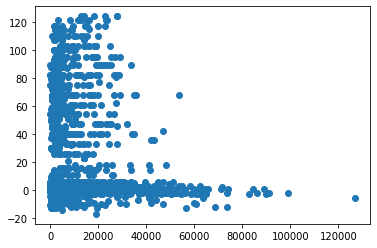

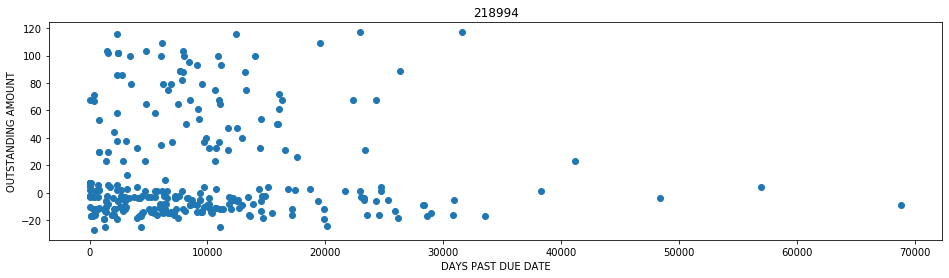

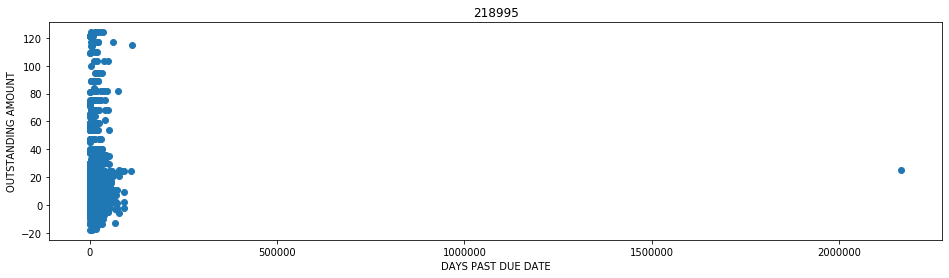

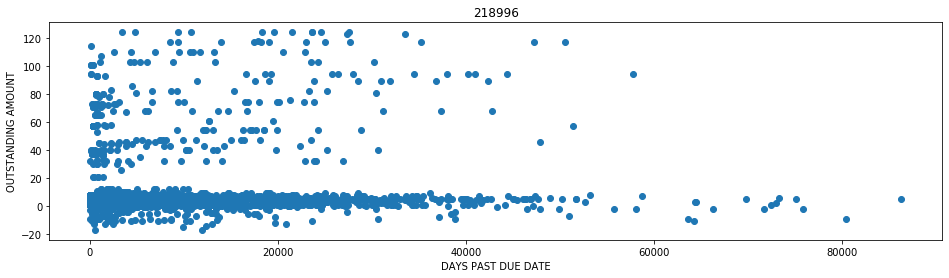

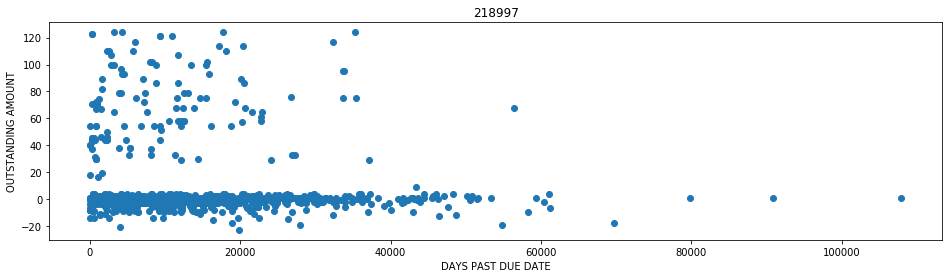

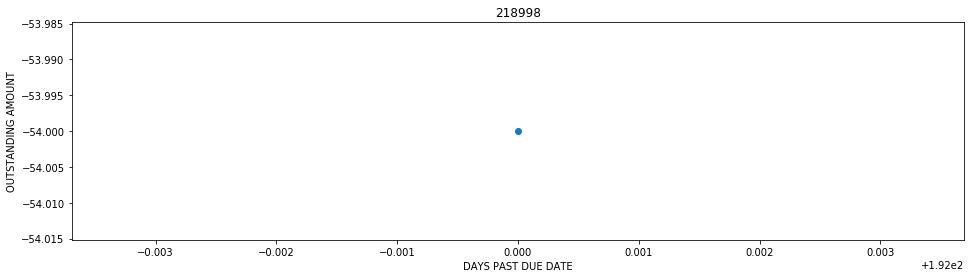

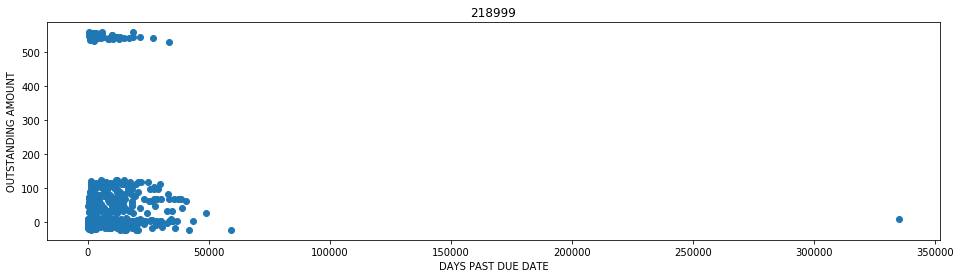

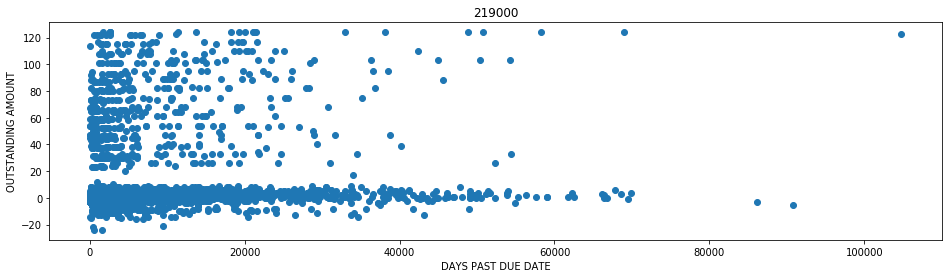

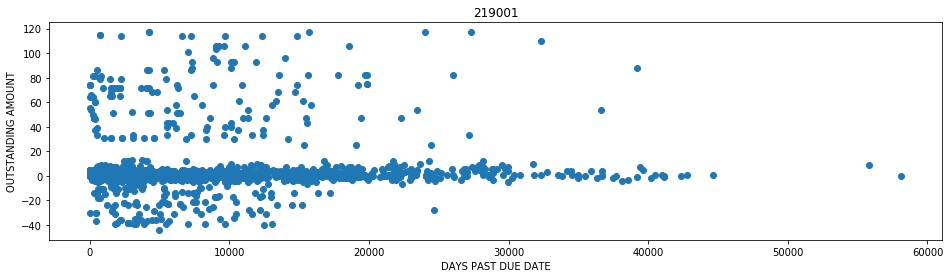

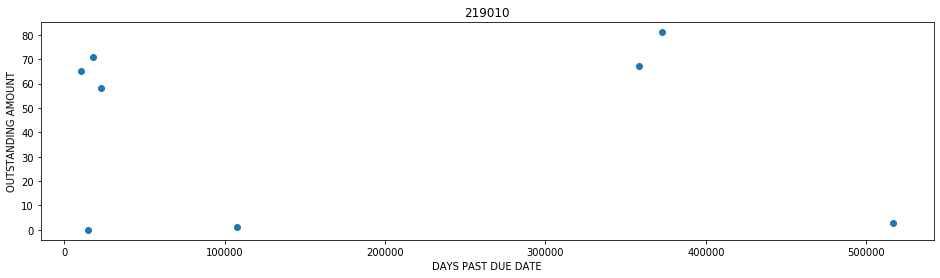

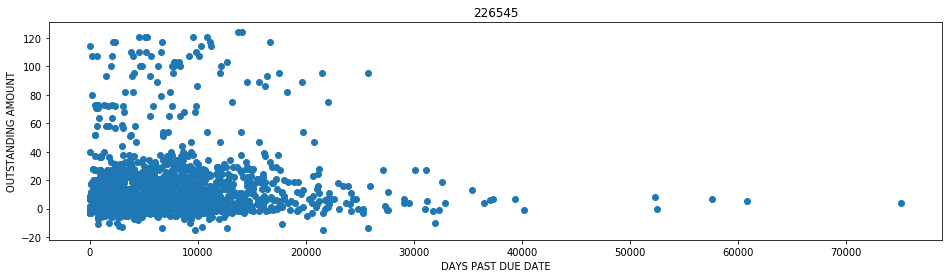

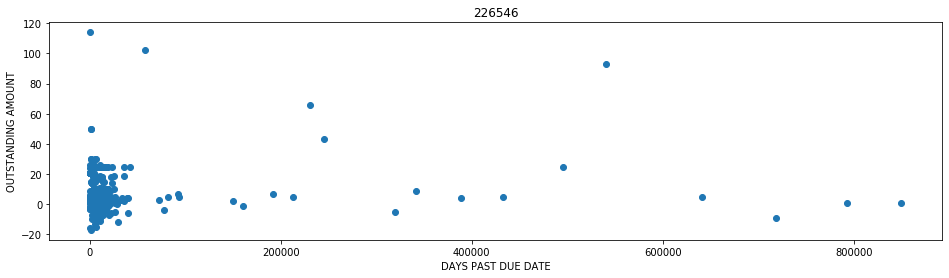

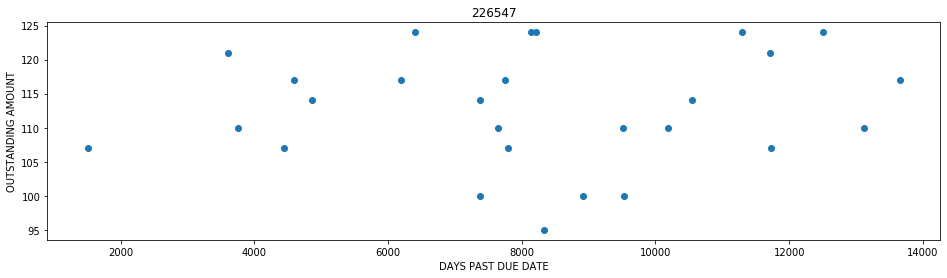

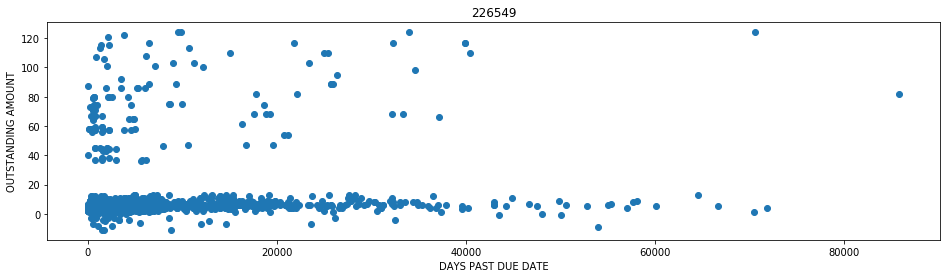

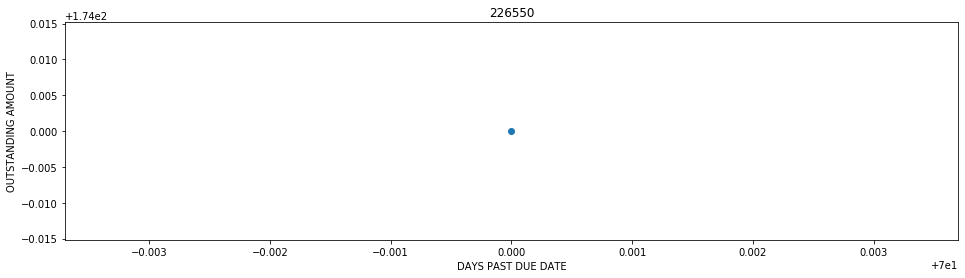

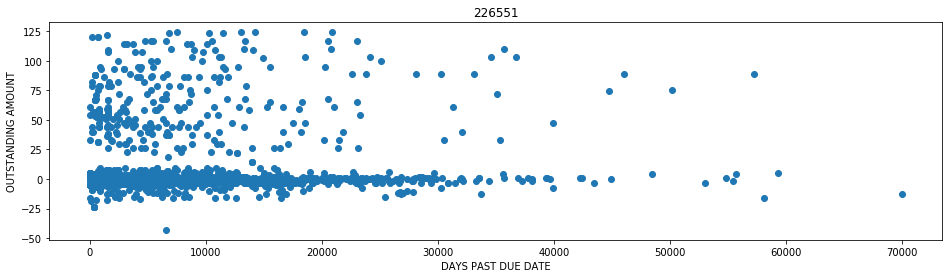

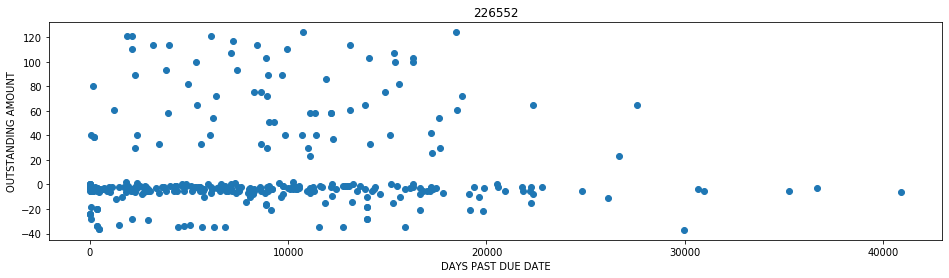

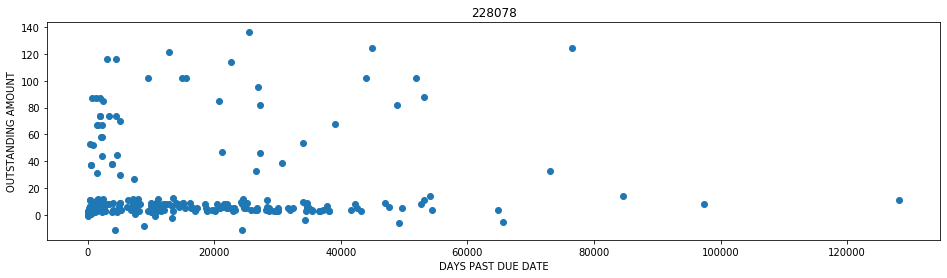

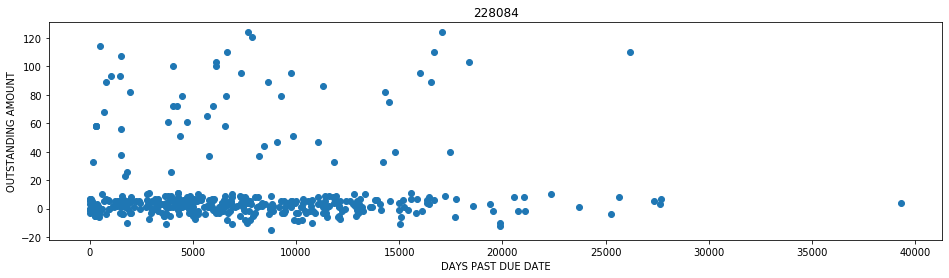

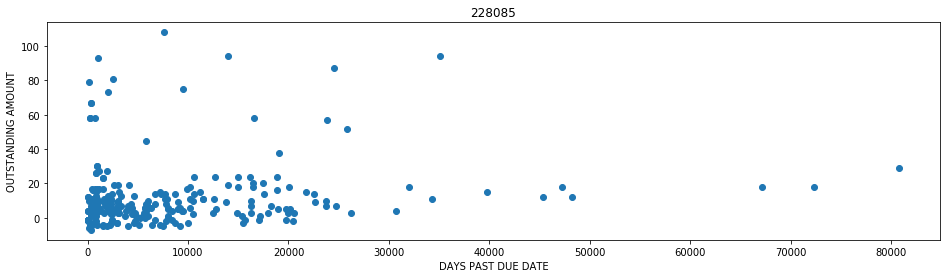

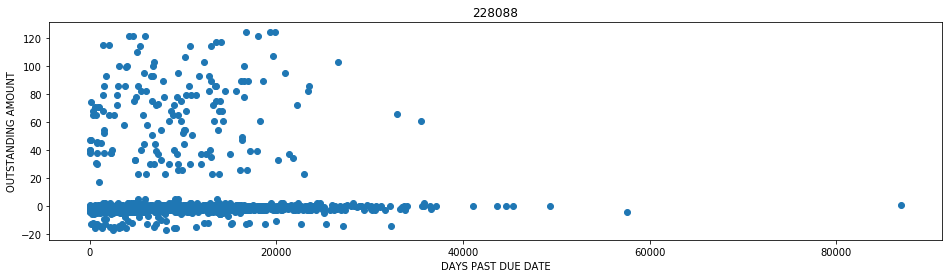

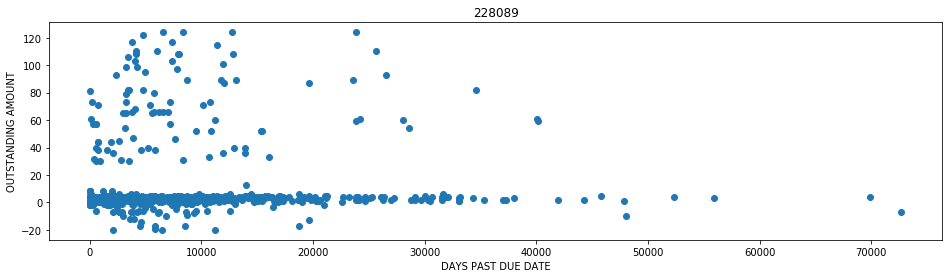

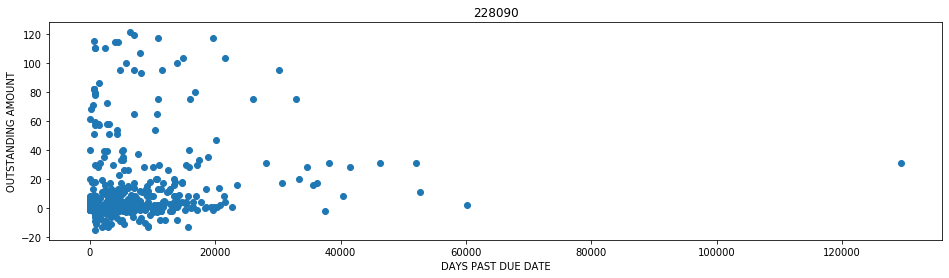

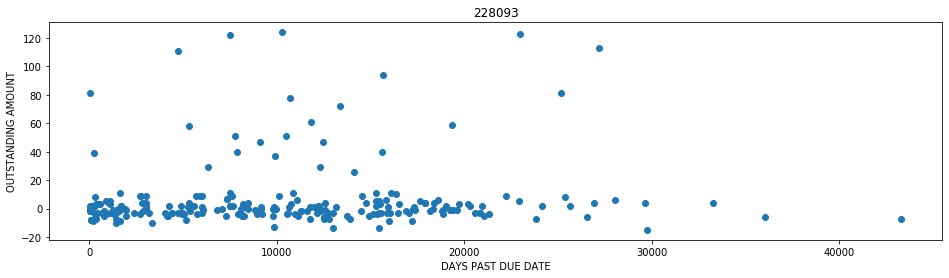

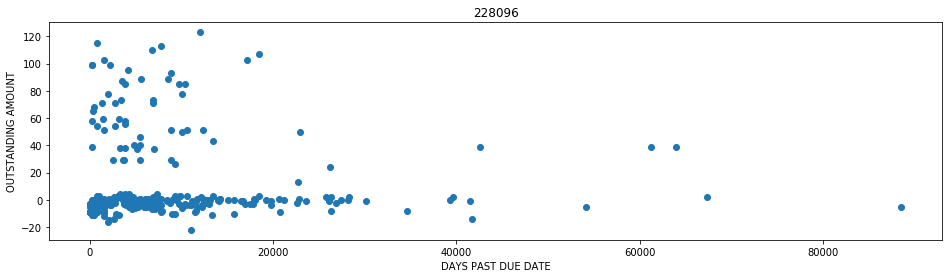

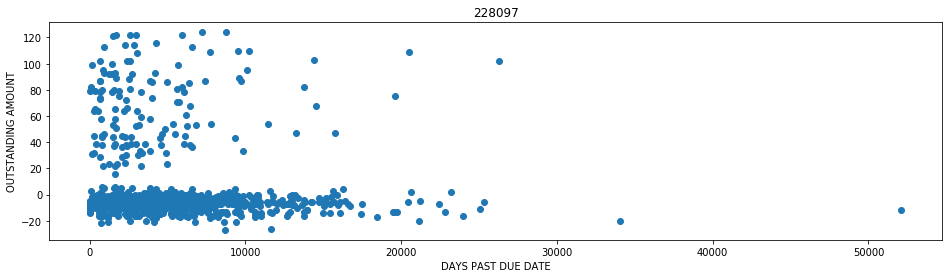

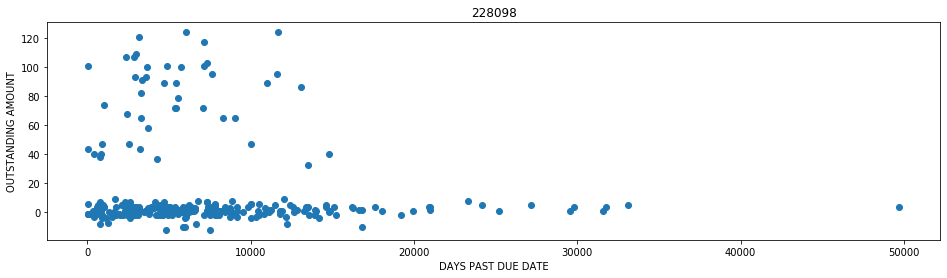

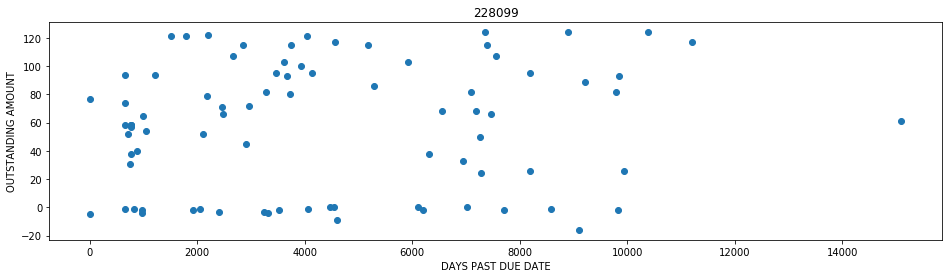

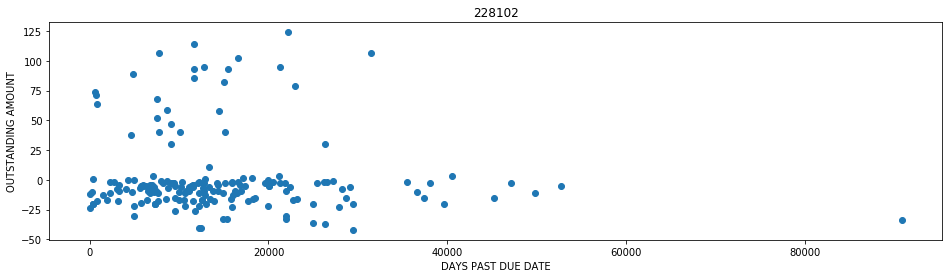

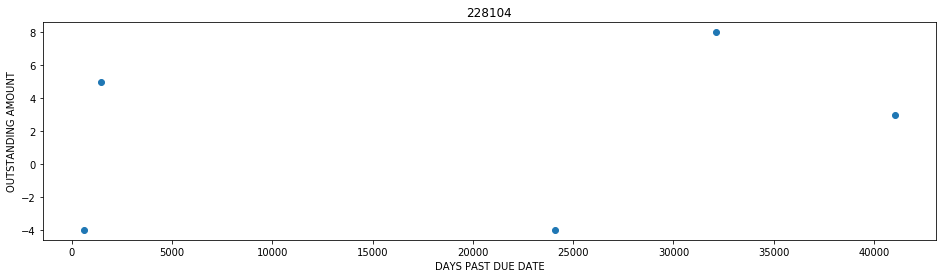

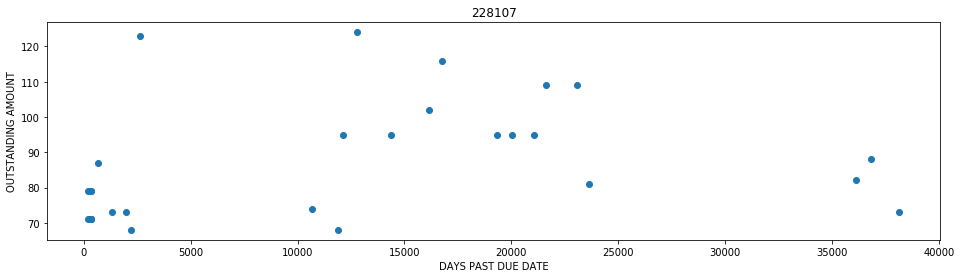

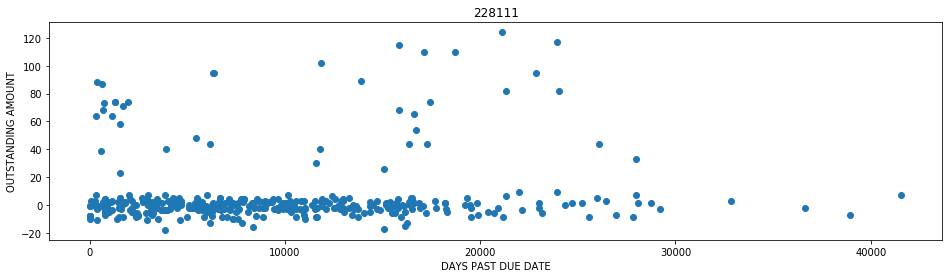

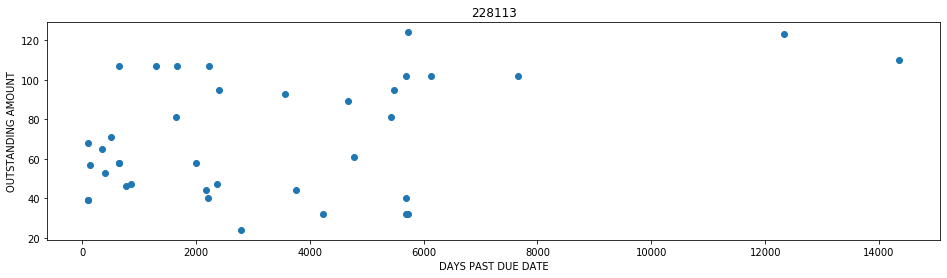

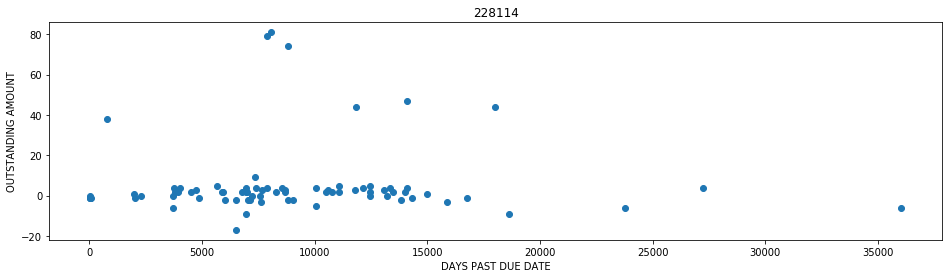

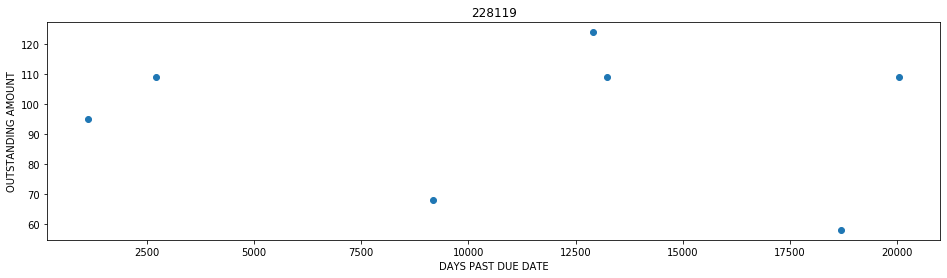

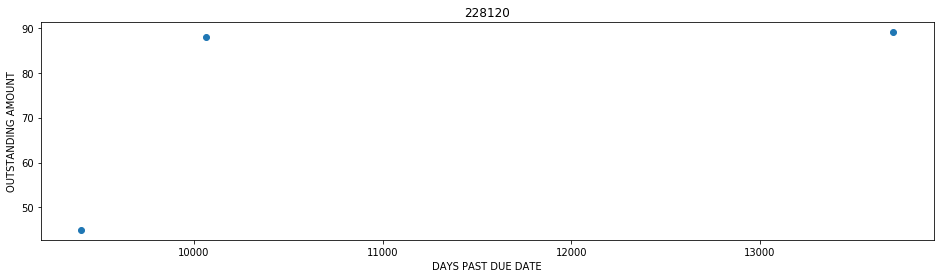

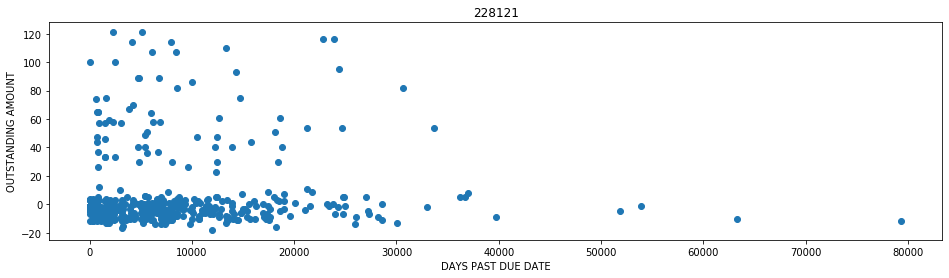

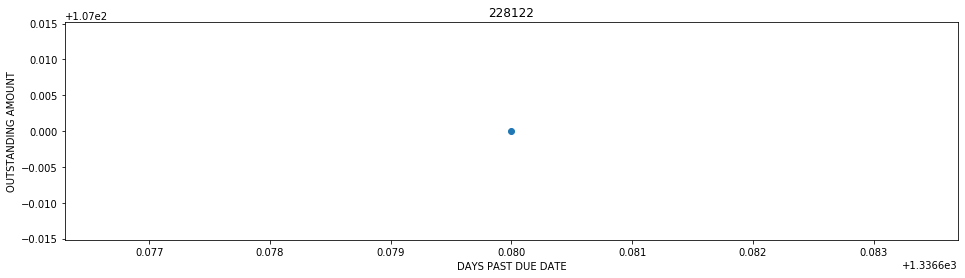

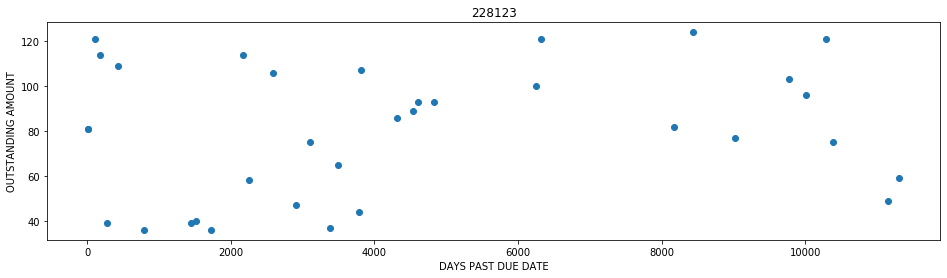

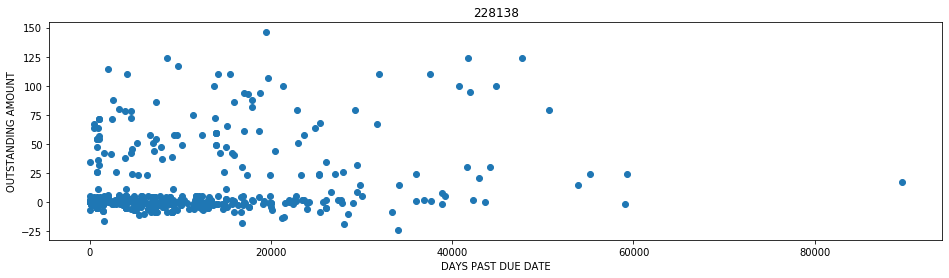

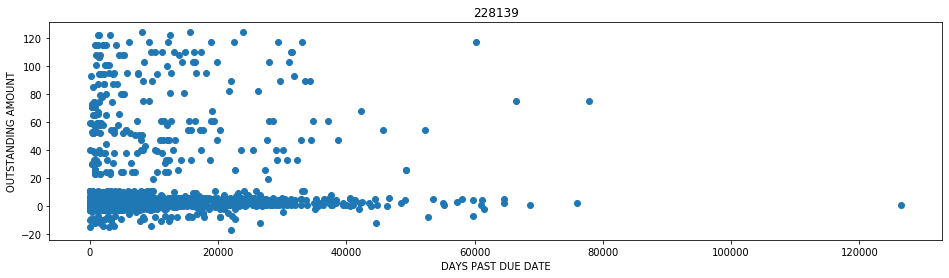

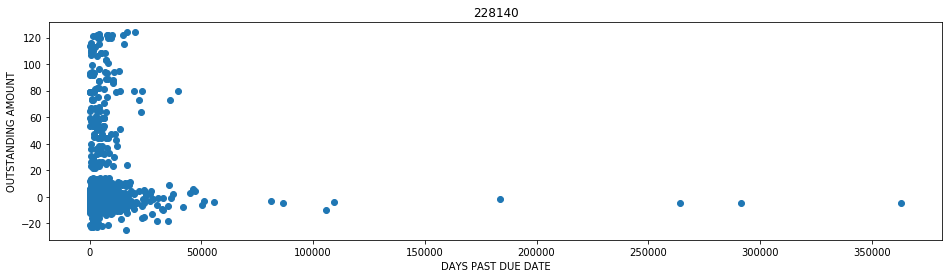

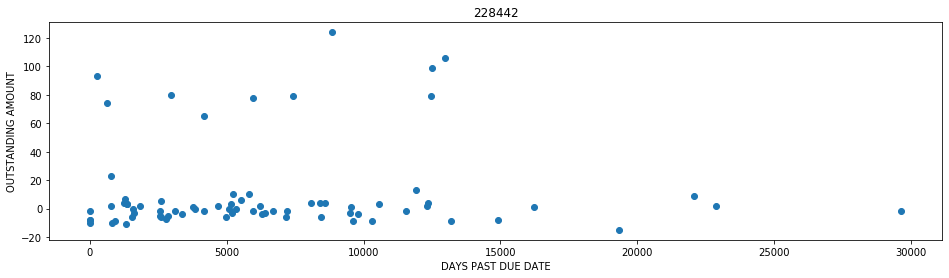

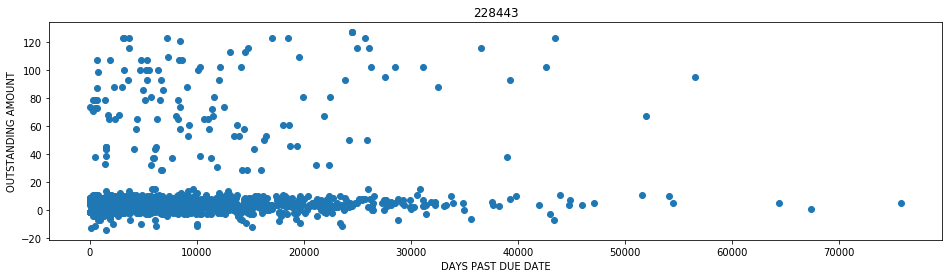

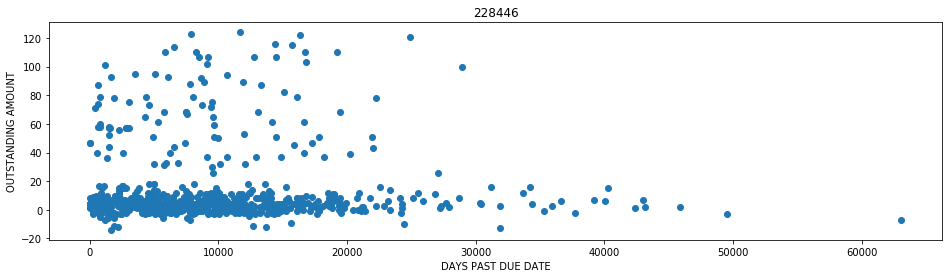

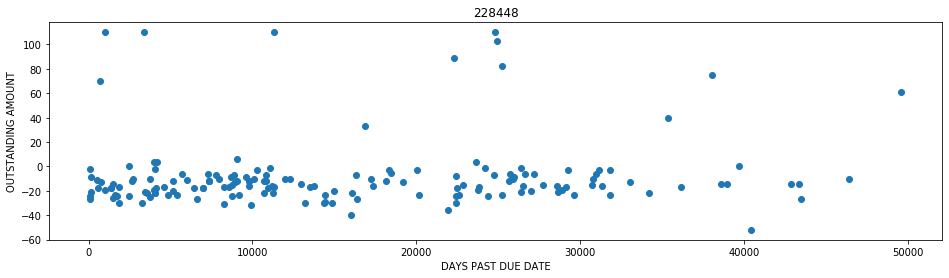

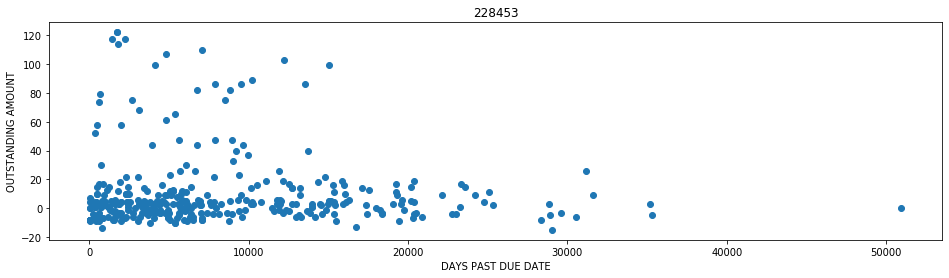

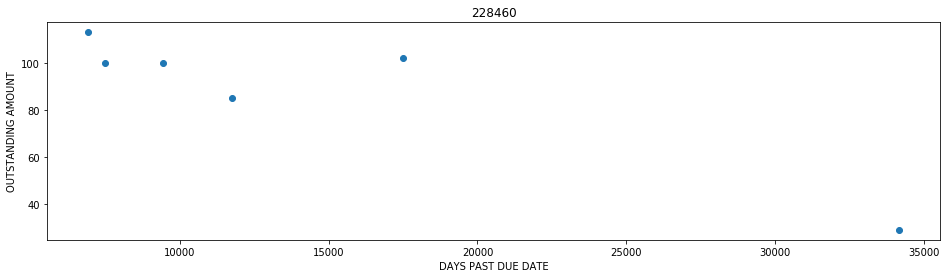

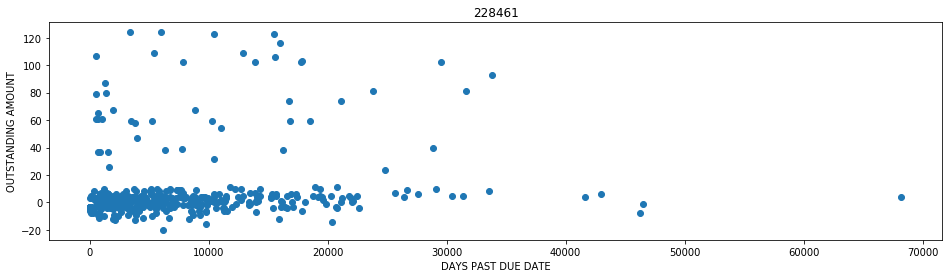

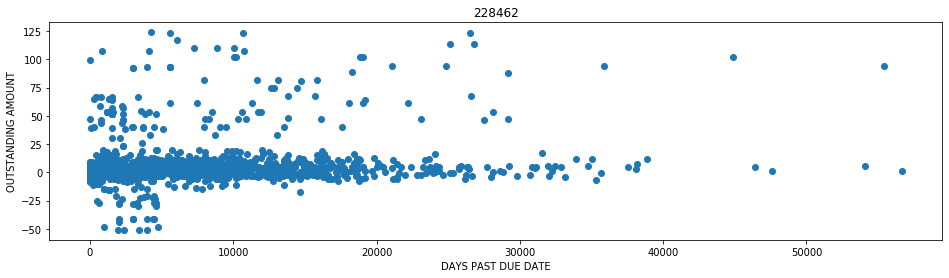

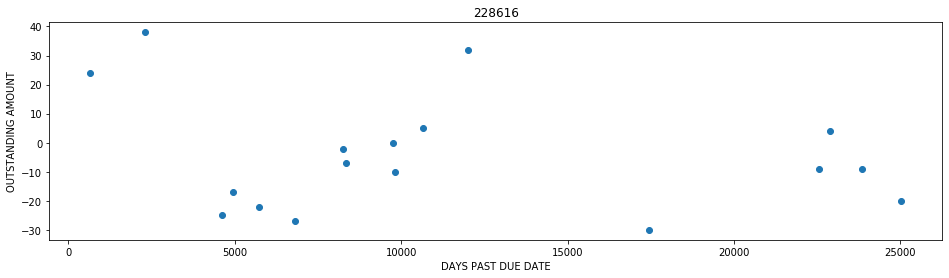

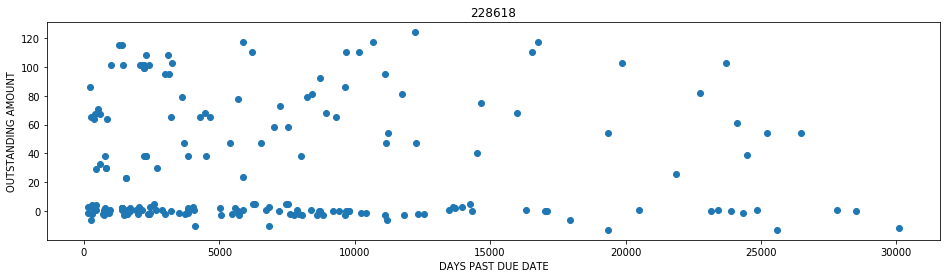

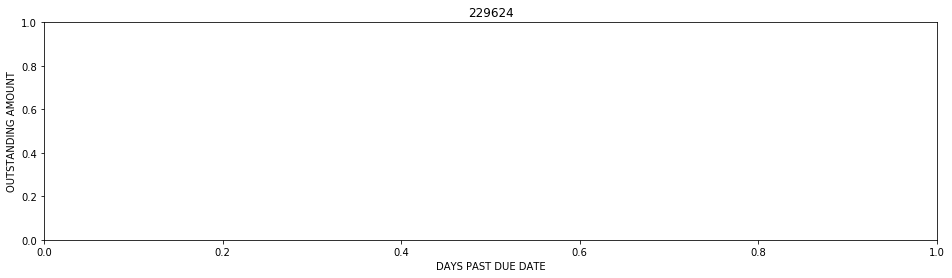

In [118]:
grouped=c.groupby('cust_number_norm')             

for name,group in grouped:
    
    d=group.actual_outstanding_amount
    e=group.days_past_duedate
    
    plt.scatter(d,e)
    plt.figure(figsize=(16, 4))
    plt.title(name)
    plt.xlabel('DAYS PAST DUE DATE')
    plt.ylabel('OUTSTANDING AMOUNT')
    print('')

# payment amount v/s outstanding amount

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


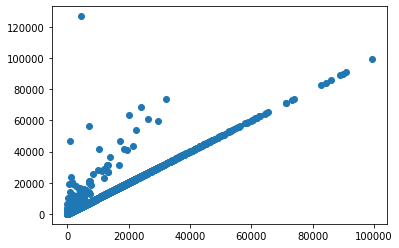

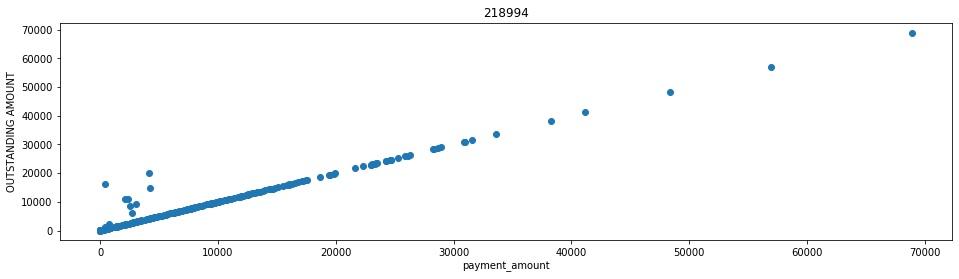

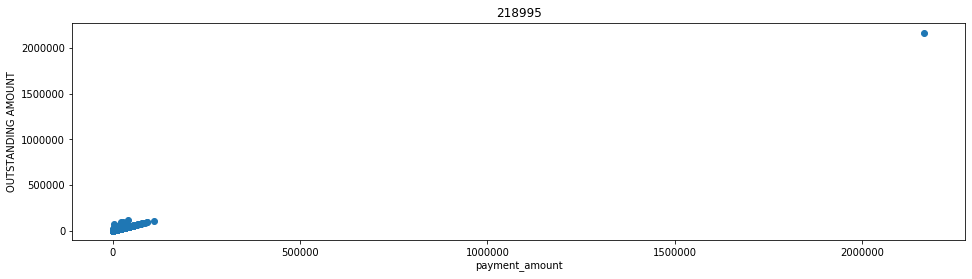

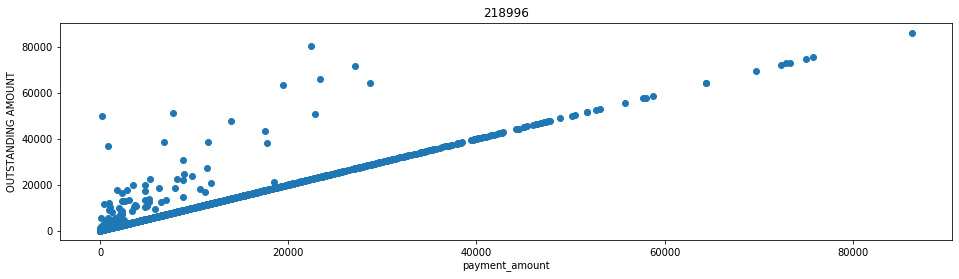

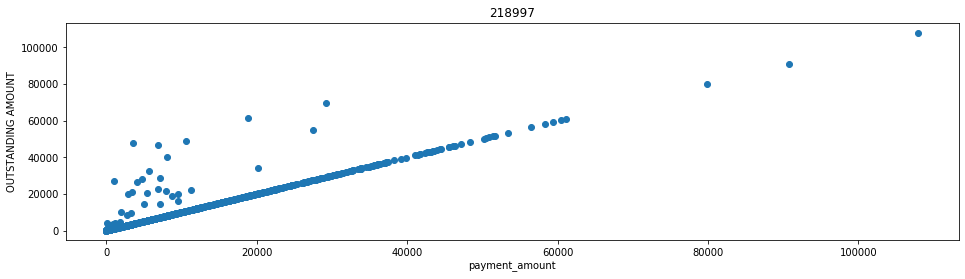

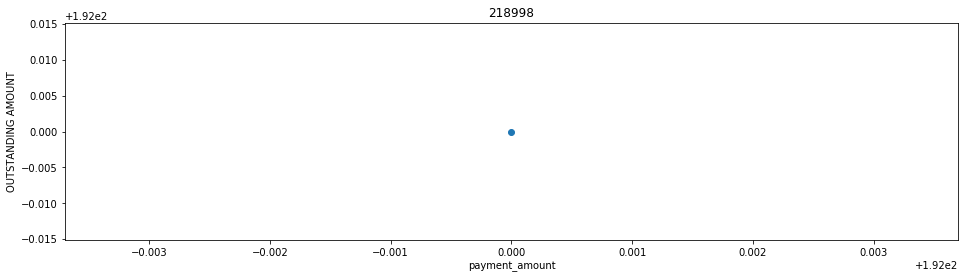

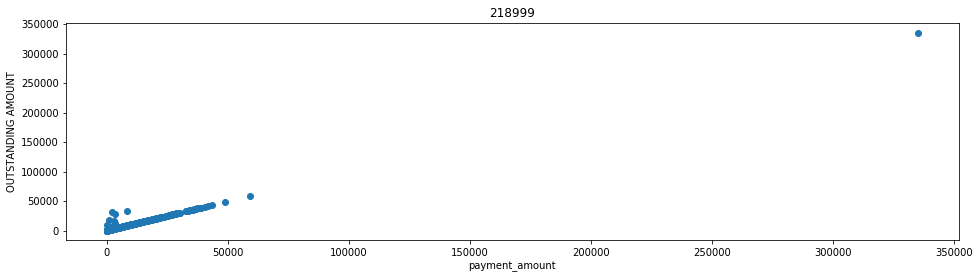

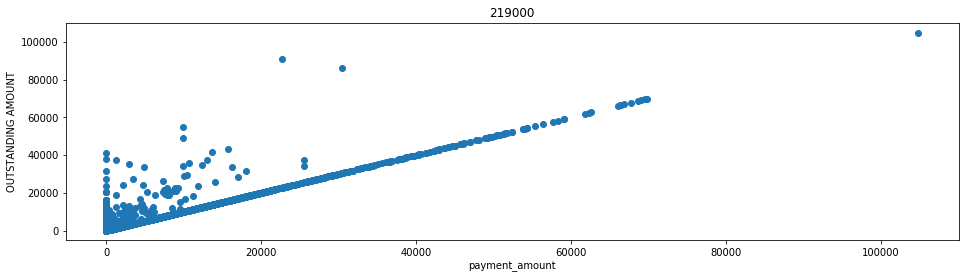

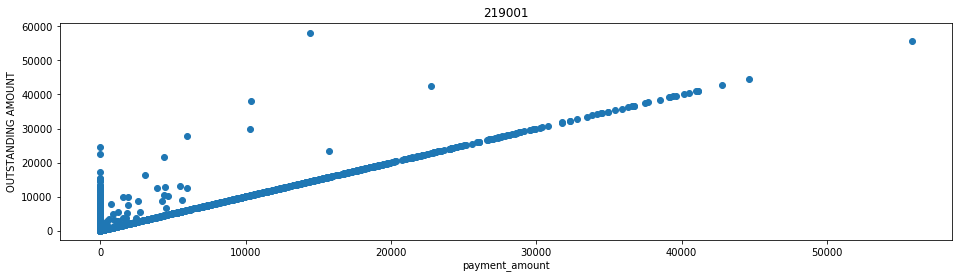

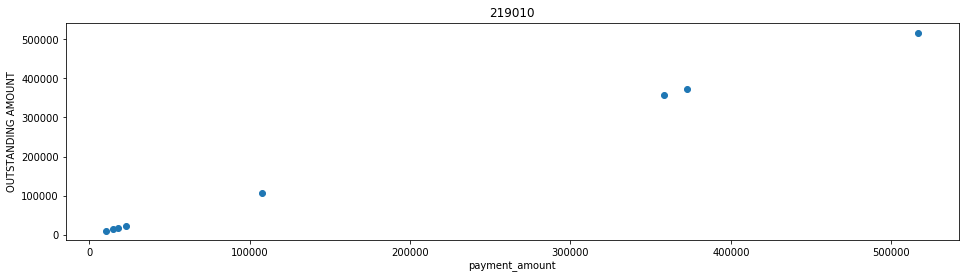

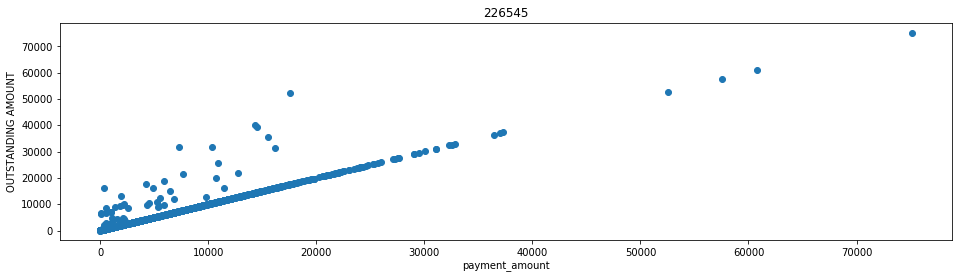

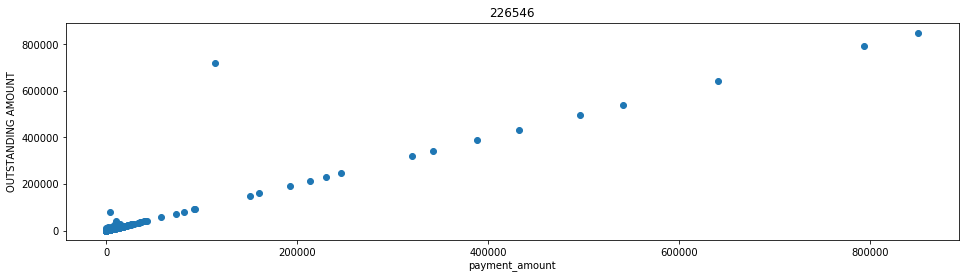

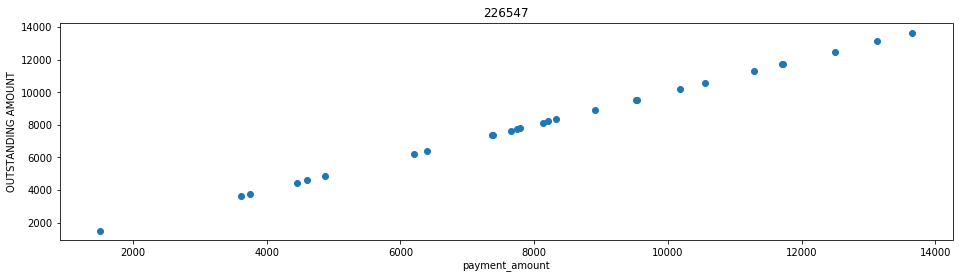

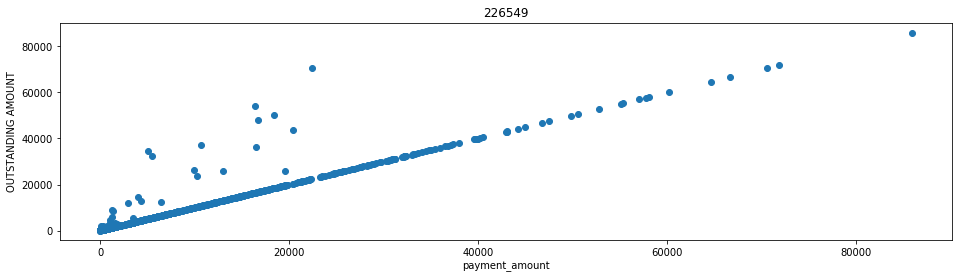

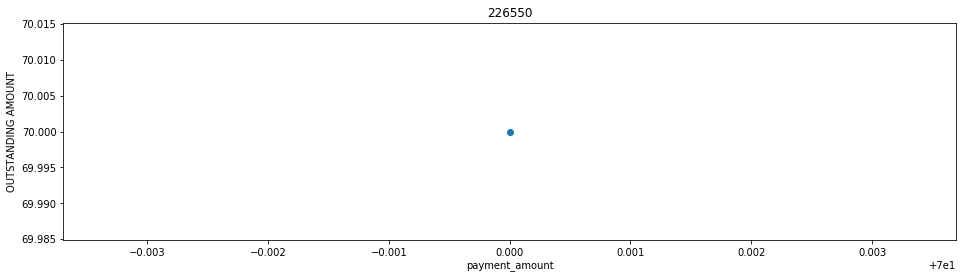

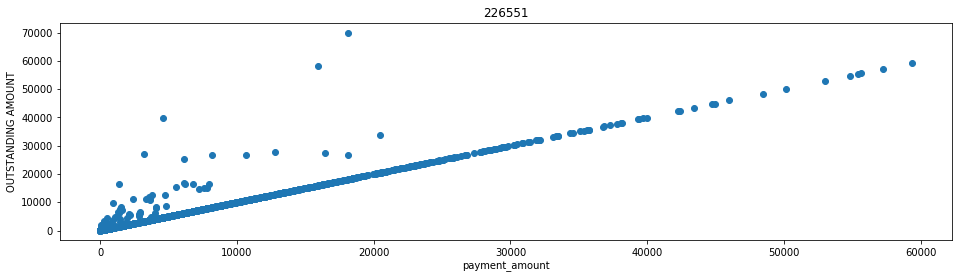

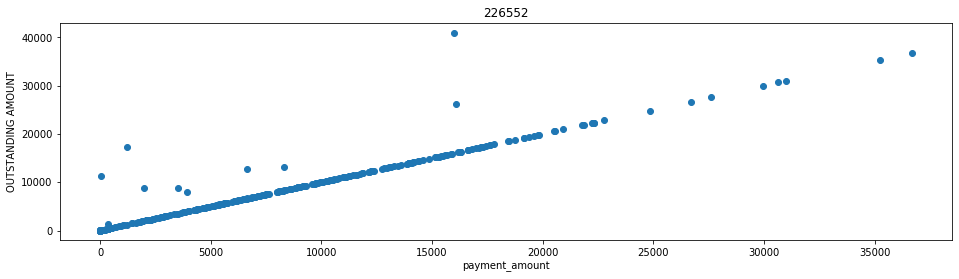

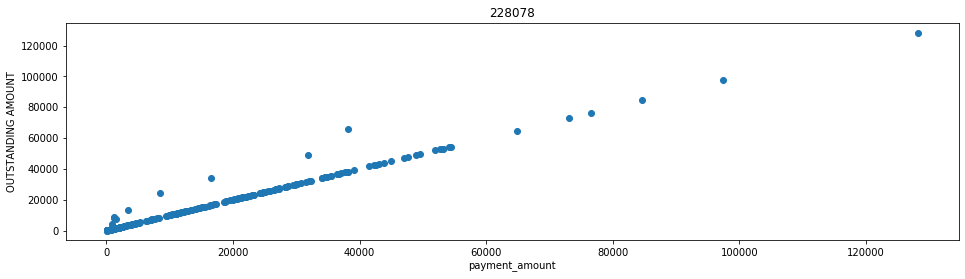

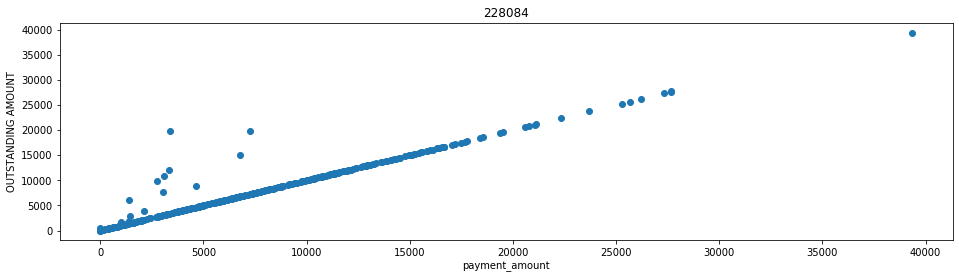

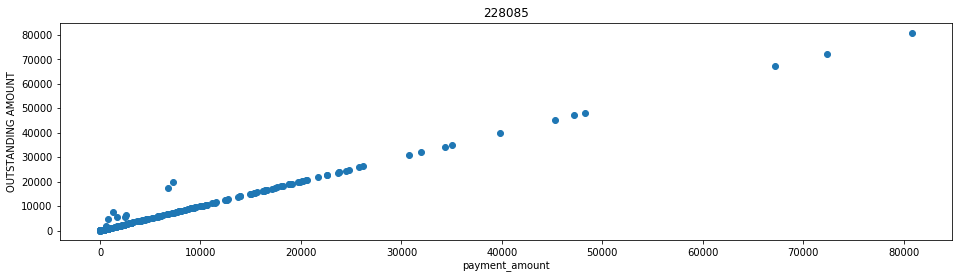

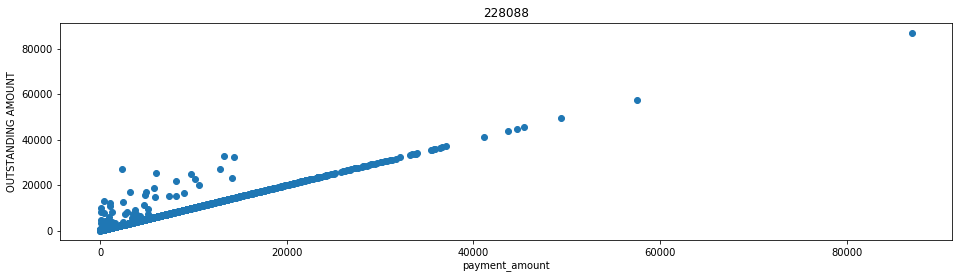

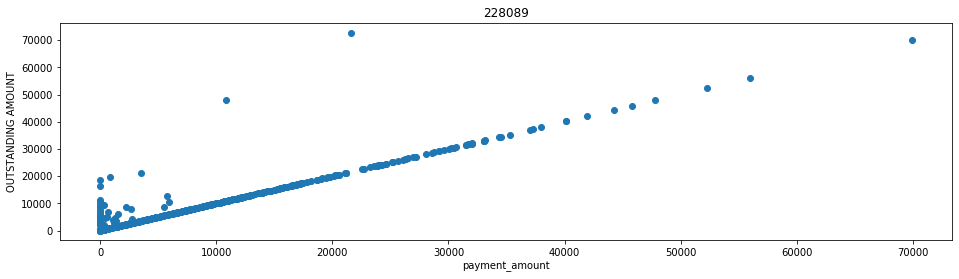

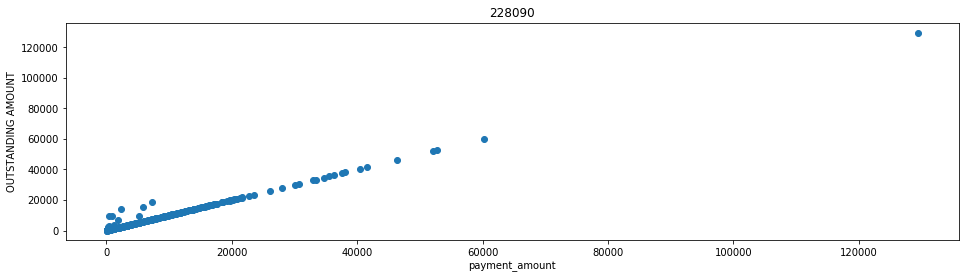

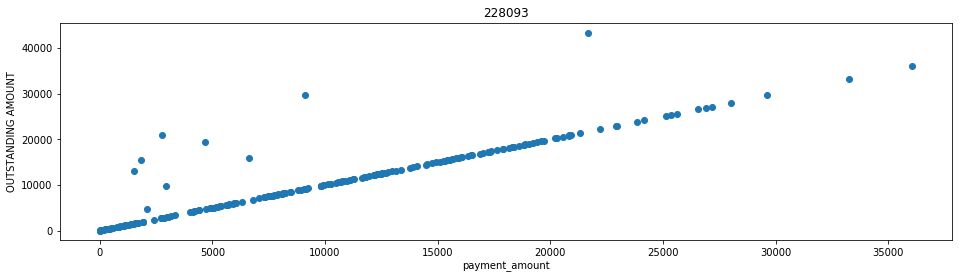

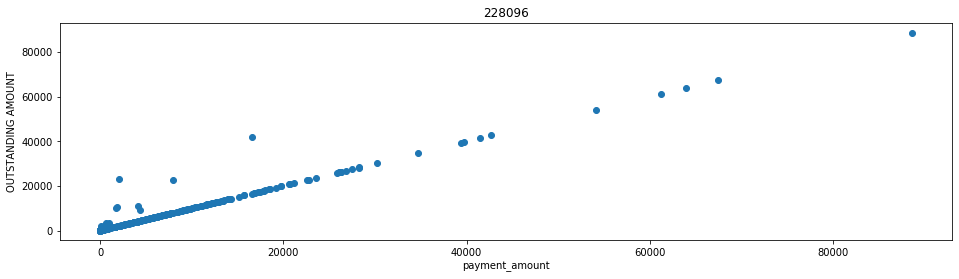

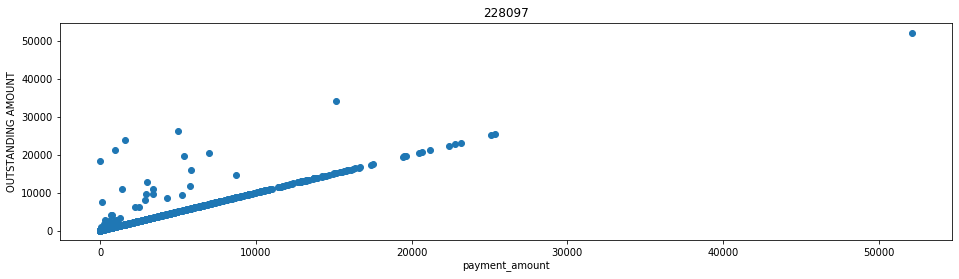

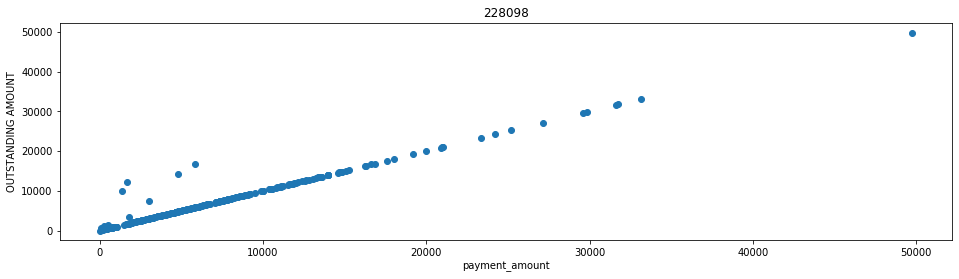

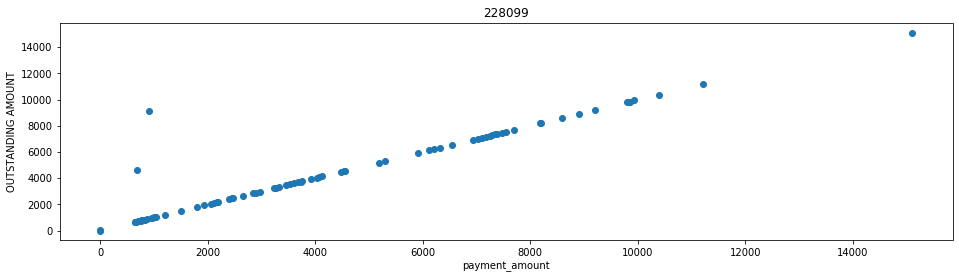

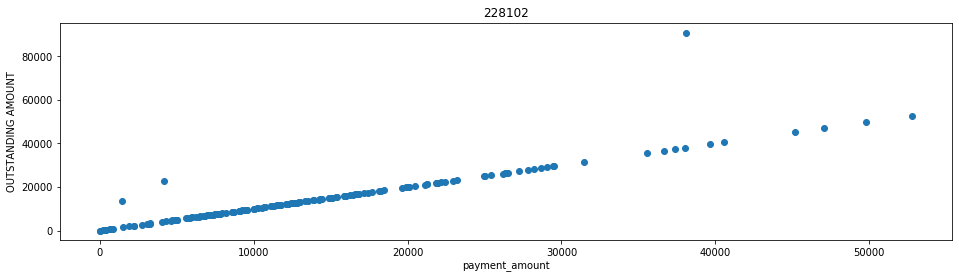

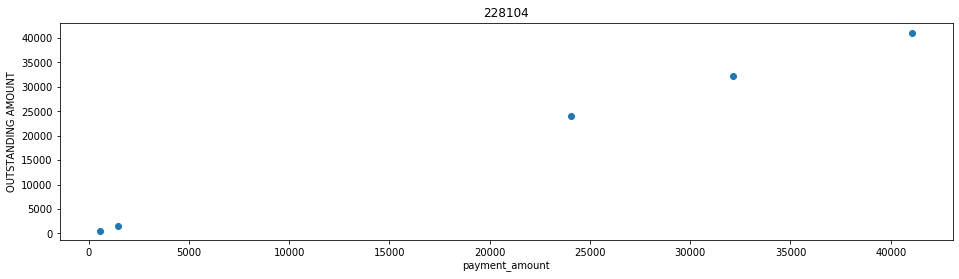

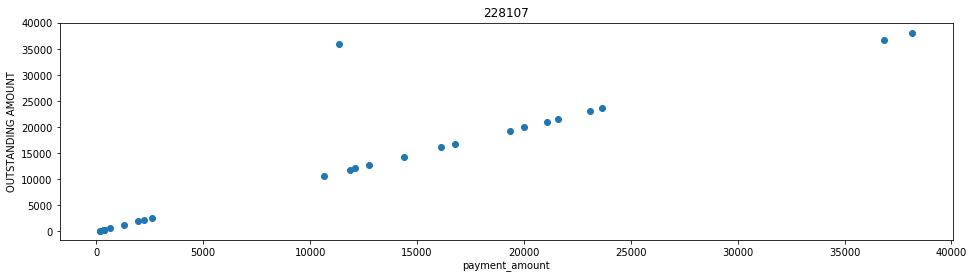

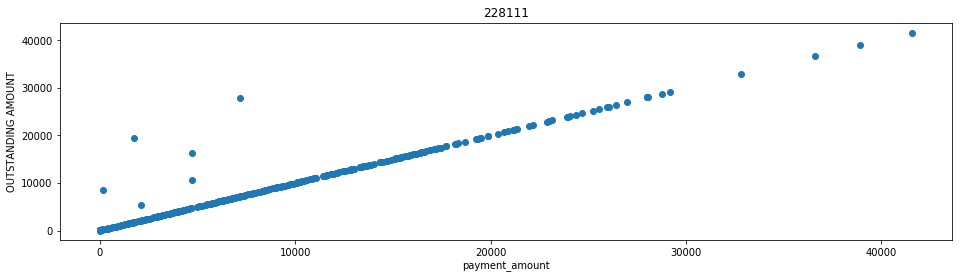

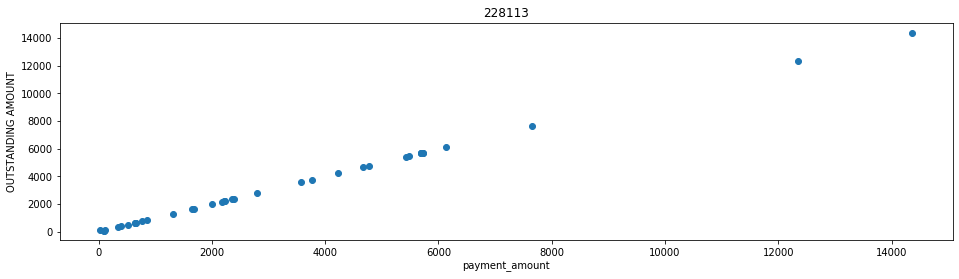

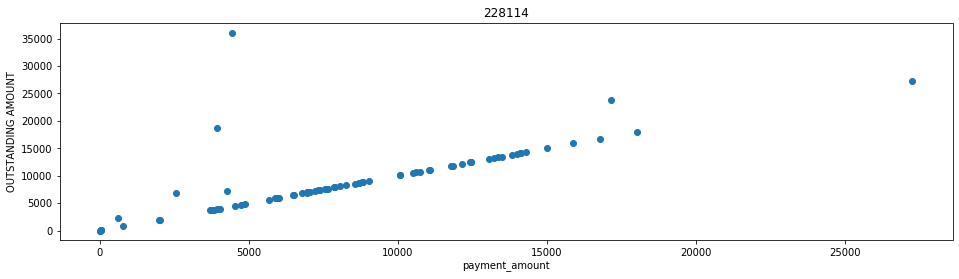

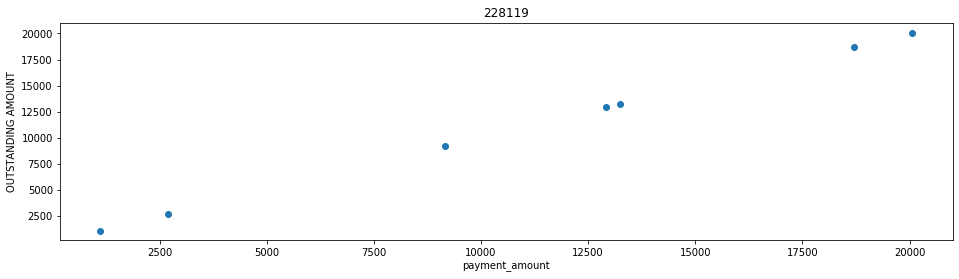

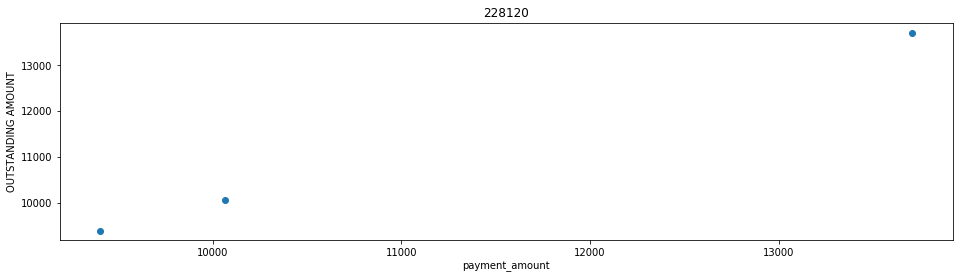

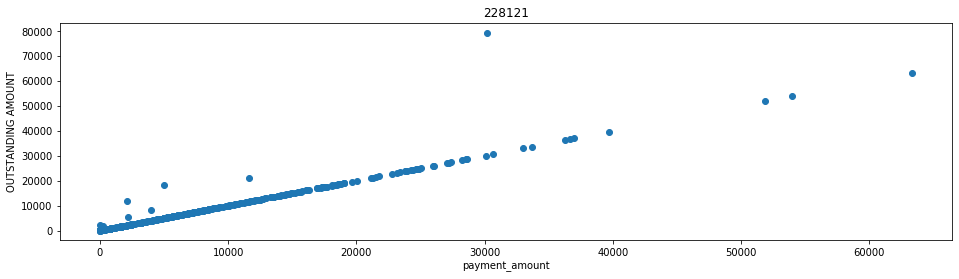

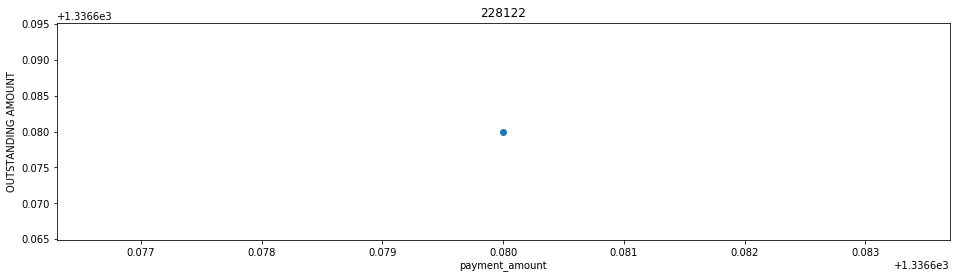

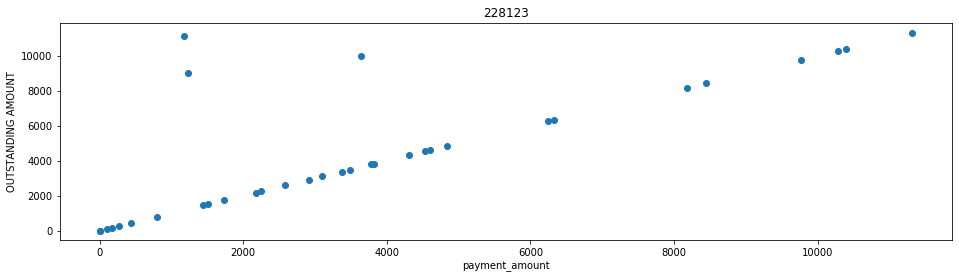

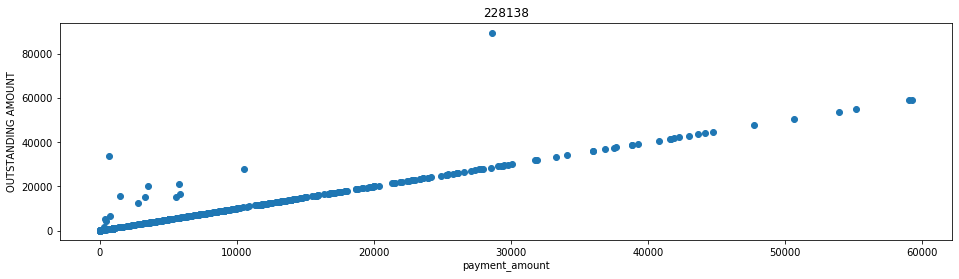

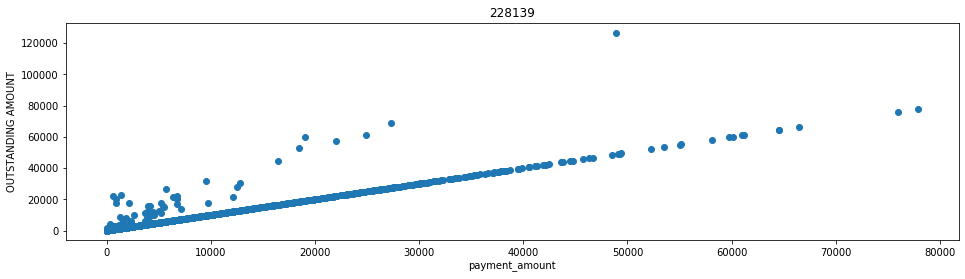

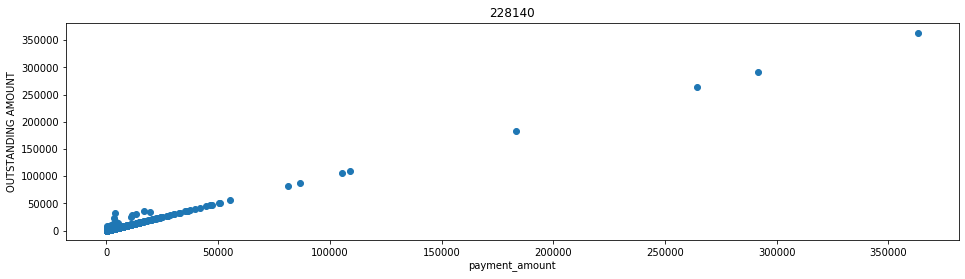

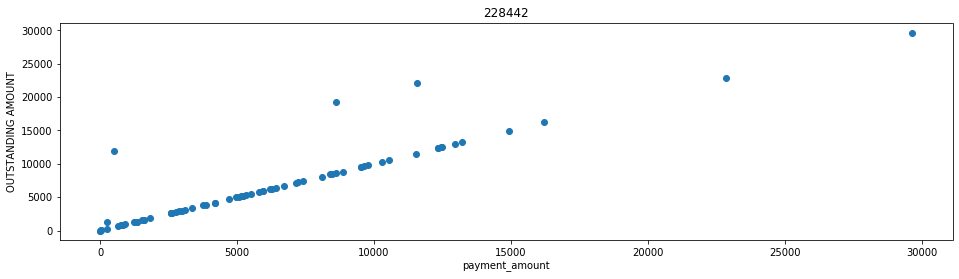

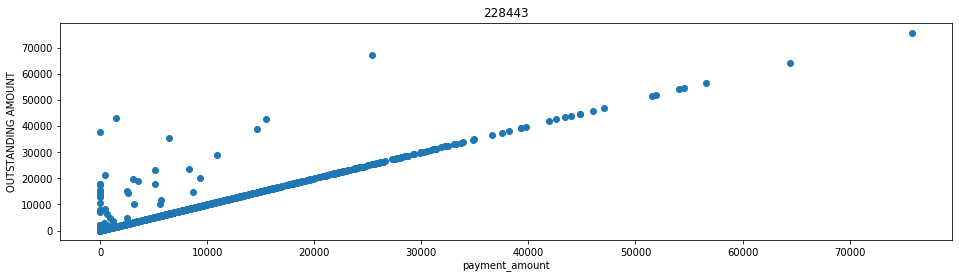

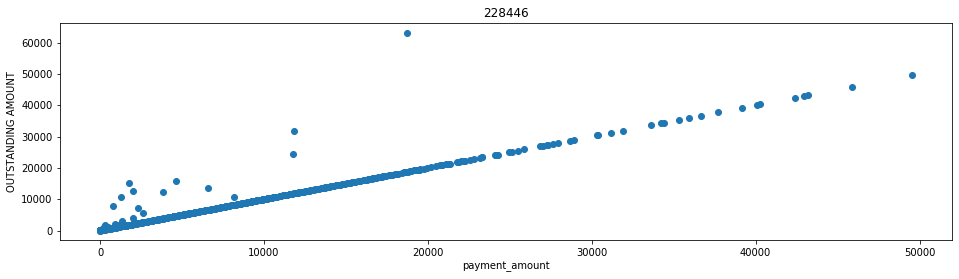

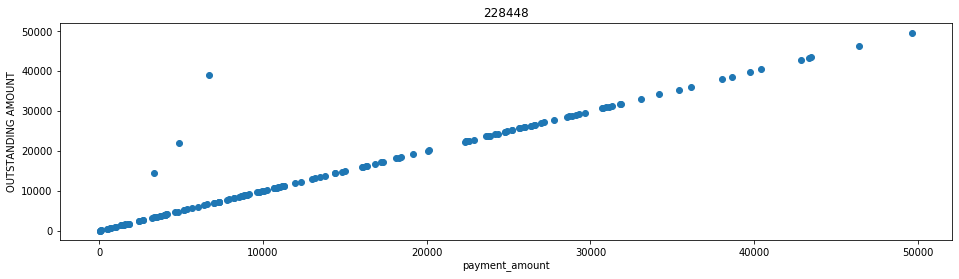

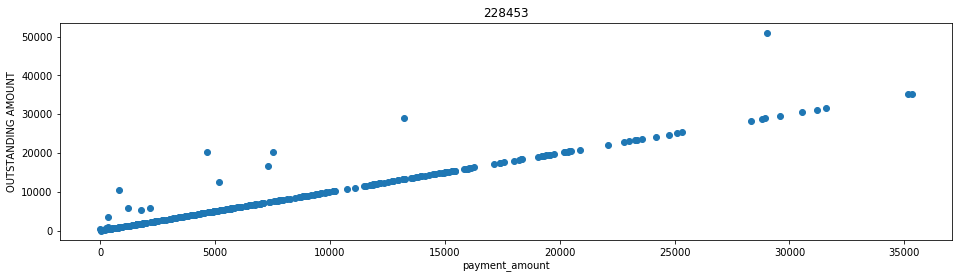

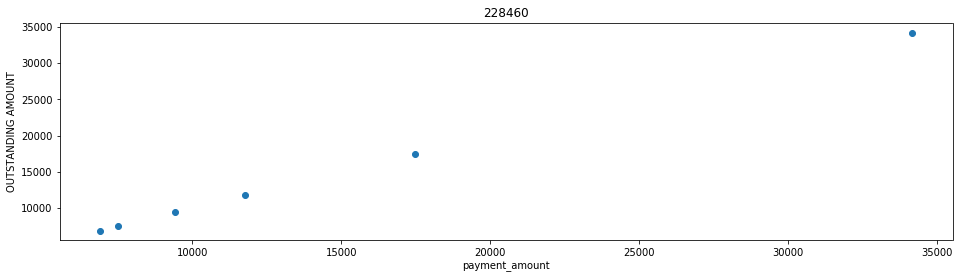

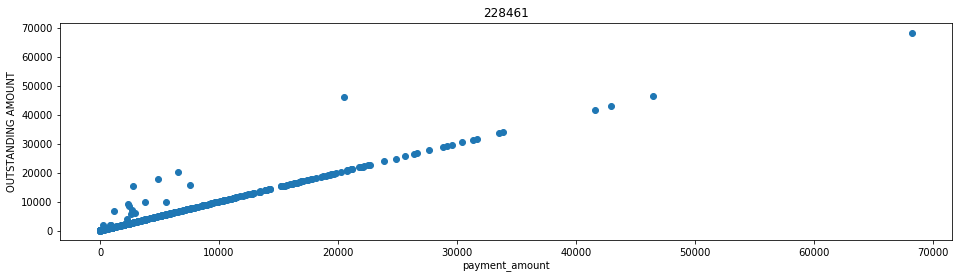

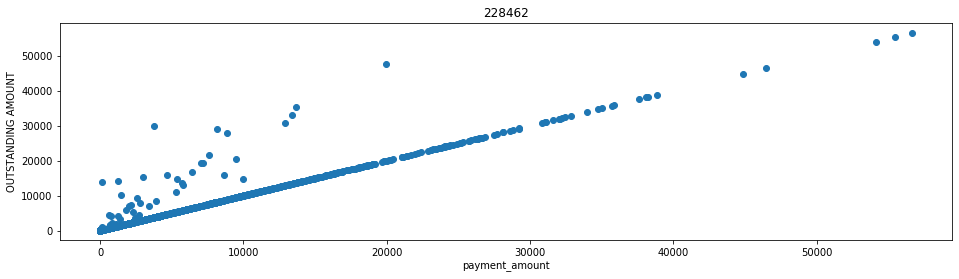

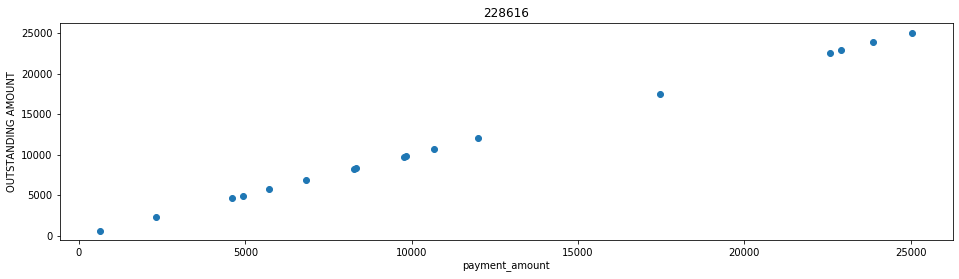

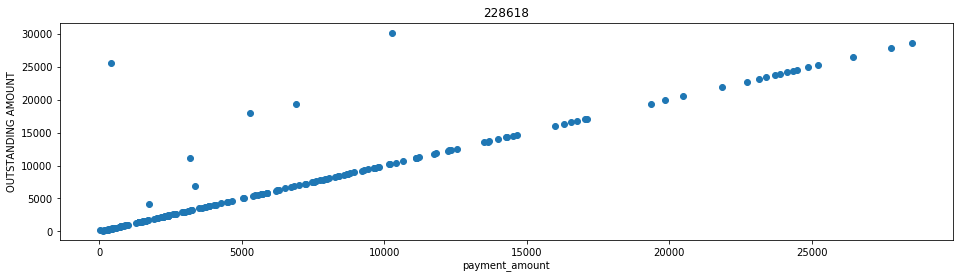

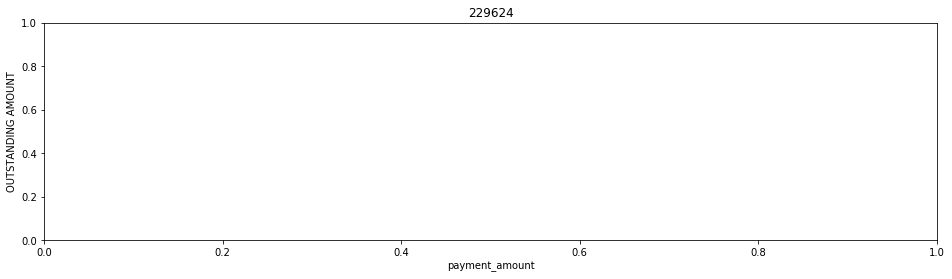

In [119]:
grouped=c.groupby('cust_number_norm')             

for name,group in grouped:
    
    d=group.payment_amount
    e=group.actual_outstanding_amount
    
    plt.scatter(d,e)
    plt.figure(figsize=(16, 4))
    plt.title(name)
    plt.xlabel('payment_amount')
    plt.ylabel('OUTSTANDING AMOUNT')
    print('')

# ML

In [120]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [121]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(a.select_dtypes(include=numerics).columns)
a = a[numerical_vars]
a.shape

(45857, 11)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(
    a.drop(labels='payment_amount', axis=1),
    a['payment_amount'],
    test_size=0.1090346075844473,
    random_state=0)

X_train.shape, X_test.shape

((40857, 10), (5000, 10))

In [182]:
dat.tail(20)

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
48599            218997         50108492                  367.87   
48600            218997         49967356                 7968.77   
48601            218997         49870912                  509.84   
48602            219010         51451932                 3216.43   
48603            218997         50785129                 9347.68   
48604            219001         30427670                 4296.76   
48605            219010         50477603                 4025.15   
48606            219010         51041113                 3467.89   
48607            228098         50946850                 9057.92   
48608            218998         49967659                19849.12   
48609            218994         51387376                14663.88   
48610            218994         30305757                  441.40   
48611            219001         50041970                 2017.43   
48612            218996         50619452                34185.62   
48613            218996         50784829                 2267.66   
48614            219010         50264054                 5279.55   
48615            218996         30234909                16343.80   
48616            228090         50790404                11246.00   
48617            219010         50867507                 1854.36   
48618            218994         51116679                 2824.24   

       is_open_invoice  invoice_currency     doc_id  \
48599                1            367.87  544883137   
48600                1           7968.77  544816697   
48601                1            509.84  544776586   
48602                1           3216.43  545880749   
48603                1           9347.68  545384354   
48604                0           4296.76  532989188   
48605                1           4025.15  545060140   
48606                1           3467.89  545630708   
48607                1           9057.92  545465922   
48608                1          19849.12  544816982   
48609                1          14663.88  545839746   
48610                0            441.40  532939611   
48611                1           2017.43  544851324   
48612                1          34185.62  545127845   
48613                1           2267.66  545383843   
48614                1           5279.55  544965036   
48615                0          16343.80  532905776   
48616                1          11246.00  545384834   
48617                1           1854.36  545416707   
48618                1           2824.24  545668896   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
48599                     367.87             0.0                 -7   
48600                    7968.77             0.0                 -3   
48601                     509.84             0.0                  1   
48602                    3216.43             0.0                -61   
48603                    9347.68             0.0                -31   
48604                    4296.76             0.0                 17   
48605                    4025.15             0.0                -26   
48606                    3467.89             0.0                -46   
48607                    9057.92             0.0                -35   
48608                   19849.12             0.0                 -3   
48609                   14663.88             0.0                -52   
48610                     441.40             0.0                 23   
48611                    2017.43             0.0                 -5   
48612                   34185.62             0.0                -39   
48613                    2267.66             0.0                -46   
48614                    5279.55             0.0                -19   
48615                   16343.80             0.0                 26   
48616                   11246.00             0.0                -31   
48617                    1854.36             0.0                -40   
48

In [164]:
dat.shape

(45857, 16)

In [169]:
len(dat.days_past_duedate.unique())

209

In [427]:
final_data=dat.dropna(subset=['clear_date_norm_new'])

In [430]:
final_data.head()

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                     0.0   
17530            218995         28364082                     0.0   
13832            218995         28332795                     0.0   
34364            218995         28333003                     0.0   
1803             218995         28364285                     0.0   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
11264          142                  13                    2017-05-08   
17530          148                  19                    2017-05-02   
13832          149                  19                    2017-05-01   
34364          149                  19                    2017-05-01   
1803           148                  19                    2017-05-02   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
11264            2017-05-08        2017-05-08          2017-06-15   
17530            2017-05-02        2017-05-02          2017-06-15   
13832            2017-05-01        2017-05-01          2017-06-15   
34364            2017-05-01        2017-05-01          2017-06-15   
1803             2017-05-02        2017-05-02          2017-06-15   

      clear_date_expected  
11264          2017-06-15  
17530          2017-06-15  
13832          2017-06-15  
34364          2017-06-15  
1803           2017-06-15

In [431]:
final_data.dtypes

cust_number_norm                          int64
invoice_id_norm                           int64
total_open_amount_norm                  float64
is_open_invoice                           int64
invoice_currency                        float64
doc_id                                    int64
actual_outstanding_amount               float64
payment_amount                          float64
days_past_duedate                         int64
age_invoice                               int64
cust_number_mapped                        int64
document_create_date_norm_new    datetime64[ns]
invoice_date_norm_new            datetime64[ns]
shipping_date_new                datetime64[ns]
clear_date_norm_new              datetime64[ns]
clear_date_expected              datetime64[ns]
dtype: object

In [432]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(final_data.select_dtypes(include=numerics).columns)
final_data= final_data[numerical_vars]
final_data.shape

(40857, 11)

In [433]:
final_data.head()


cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                     0.0   
17530            218995         28364082                     0.0   
13832            218995         28332795                     0.0   
34364            218995         28333003                     0.0   
1803             218995         28364285                     0.0   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   

       age_invoice  cust_number_mapped  
11264          142                  13  
17530          148                  19  
13832          149                  19  
34364          149                  19  
1803           148                  19

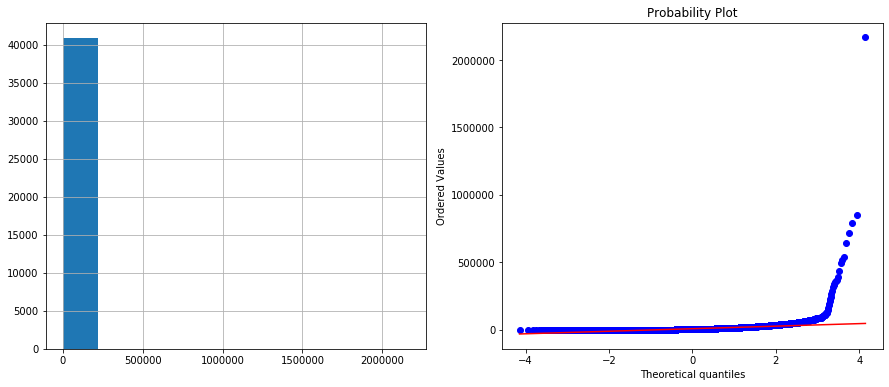

In [307]:
import pylab 
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=pylab)
    plt.show()
diagnostic_plots(final_data,'actual_outstanding_amount') 

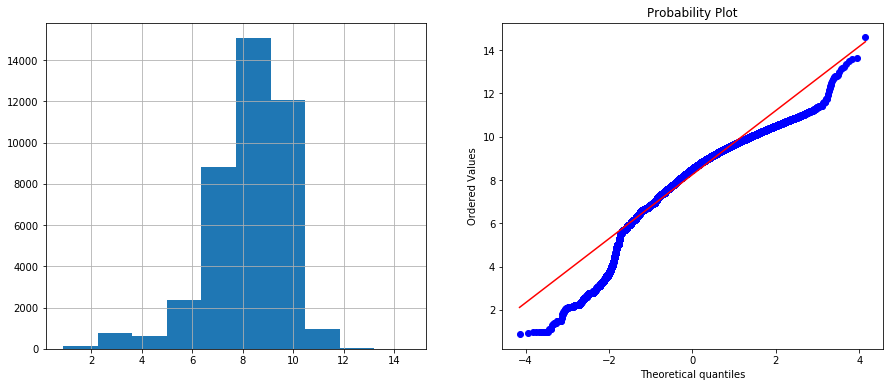

In [309]:
final_data['amount_log'] = np.log(final_data.actual_outstanding_amount+1)
diagnostic_plots(final_data, 'amount_log')

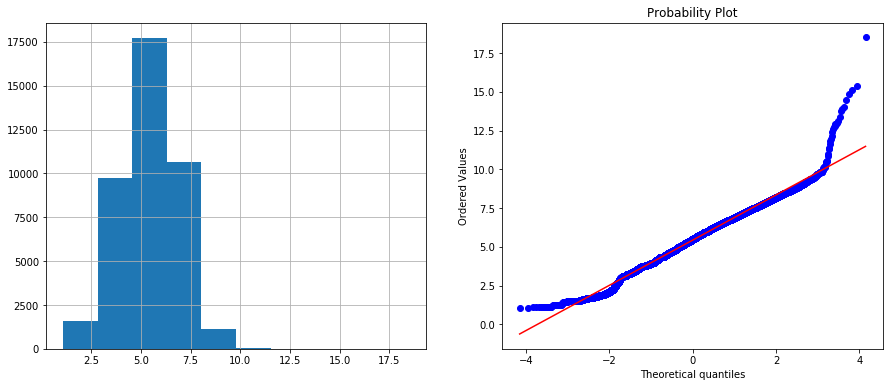

In [310]:
final_data['amount_exp'] =final_data.actual_outstanding_amount**(1/5)
diagnostic_plots(final_data, 'amount_exp') 

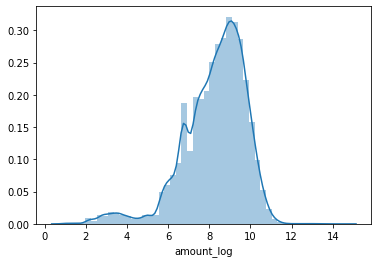

In [311]:
sns.distplot(final_data['amount_log'])

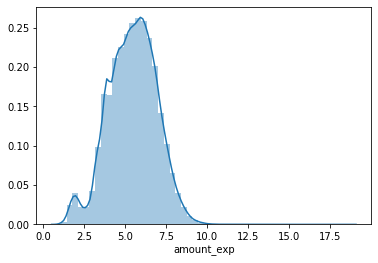

In [312]:
sns.distplot(final_data['amount_exp'])

In [314]:
final_data.drop(['amount_log','amount_exp'],axis=1,inplace=True)

# MULTILINEAR_REGRESSION

In [499]:
X=final_data.loc[:, ['cust_number_mapped','invoice_currency']]

In [500]:
X

cust_number_mapped  invoice_currency
11264                  13          25238.12
17530                  19           7907.03
13832                  19           7682.45
34364                  19           7684.08
1803                   19          13174.26
...                   ...               ...
2401                   14            574.98
26206                  21          14586.66
36766                  21           3093.52
9562                   21           7827.57
9772                   21           4491.60

[40857 rows x 2 columns]

In [501]:
Y=final_data.loc[:, ['payment_amount']]

In [502]:
Y

payment_amount
11264        25238.12
17530         7907.03
13832         7682.45
34364         7684.08
1803         13174.26
...               ...
2401           574.98
26206        14586.66
36766         3093.52
9562          7827.57
9772          4491.60

[40857 rows x 1 columns]

In [503]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((28599, 2), (12258, 2))

In [504]:
from sklearn.linear_model import LinearRegression

In [505]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [506]:
y_pred = regressor.predict(X_test)

In [507]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

98.06137273643483 %


In [508]:
X=final_data.loc[:, ['cust_number_mapped','invoice_currency','days_past_duedate','age_invoice']]
Y=final_data.loc[:, ['payment_amount']]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [509]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

98.05844256877046 %


# DECISION TREE REGRESSION

In [510]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

In [511]:
accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

71.68835602861313 %


# RANDOM FOREST

In [512]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

# Predicting a new result
y_pred = regressor.predict(X_test)


C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [513]:
    accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

63.11307400911295 %


# RIDGE REGRESSION

In [514]:
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.9116010426271881
linear regression test score: 0.9805844256877045
ridge regression train score low alpha: 0.9116010426271881
ridge regression test score low alpha: 0.9805844256889454
ridge regression train score high alpha: 0.9116010426241339
ridge regression test score high alpha: 0.9805844380867168


In [515]:
accuracy1 = lr.score(X_test,y_test)
print(accuracy1*100,'%')
accuracy2 = rr.score(X_test,y_test)
print(accuracy2*100,'%')
accuracy3 = rr100.score(X_test,y_test)
print(accuracy3*100,'%')

98.05844256877046 %
98.05844256889455 %
98.05844380867168 %


In [516]:
y_pred=rr100.predict(X_test)
for i in range(12258):
    print(y_pred[i],y_test.payment_amount.values[i])

[500.71085323] 35.45
[10720.73315874] 11433.69
[9954.52398336] 10565.21
[700.8905785] 2835.43
[2723.55505835] 2532.36
[1377.37127456] 980.37
[44601.17244815] 48904.77
[13883.44687269] 14914.09
[18891.68846118] 20489.15
[2205.0530106] 1941.53
[8967.88130376] 9500.49
[9078.25477884] 1934.9
[11636.81826094] 2757.6
[13704.32346086] 14619.94
[9709.44313532] 10305.02
[33176.50634017] 36362.88
[2773.75504865] 2583.22
[1575.00854707] 1319.43
[4978.57092842] 5028.4
[9819.71508383] 10263.73
[6050.92572125] 6161.62
[13198.22244714] 14159.92
[2287.94308731] 2019.0
[3117.54339826] 3038.45
[4099.34692782] 4019.74
[11352.15731409] 12047.62
[2288.03721305] 2053.23
[658.79387149] 252.51
[885.24070401] 374.99
[9444.49129524] 9939.93
[5348.3311434] 5453.93
[14261.99546112] 15244.04
[5001.03696645] 5048.52
[2314.65326443] 2019.46
[3337.11901106] 3214.12
[4791.2954881] 4827.62
[6366.40922244] 6534.11
[6599.9583224] 6796.06
[444.02845208] 18.74
[5352.17143716] 5404.6
[2264.94143388] 2008.08
[3507.32533824] 

[14026.42613265] 14848.59
[9247.24236772] 9728.1
[486.42455817] 53.7
[14969.77372904] 16135.84
[3188.58993127] 3022.33
[3006.56022412] 1562.74
[6435.92906738] 6160.11
[9347.15934776] 9890.26
[3051.74343135] 2899.45
[9473.07934652] 10037.5
[1859.31547299] 1562.18
[1115.21734163] 749.98
[3265.19734986] 3009.4
[7140.65239494] 7452.95
[817.68159419] 424.2
[13687.6103787] 14696.47
[1827.29943117] 1499.85
[3414.13999355] 3174.91
[9793.90999046] 10347.76
[8155.90151143] 8554.31
[28681.97725219] 31361.11
[914.88991091] 541.99
[4607.44441709] 4635.51
[10764.88140848] 11465.66
[10183.16488726] 10804.63
[2687.13553513] 2235.87
[26904.31815913] 29090.64
[4707.43694147] 4741.78
[1732.23919607] 1401.49
[13519.12502543] 14533.6
[9881.65145502] 10425.73
[7510.74497959] 7417.9
[9398.42397478] 9939.92
[3209.81532715] 3070.24
[599.06314947] 35.0
[7314.13135857] 7628.63
[2493.80345165] 2091.68
[981.74208699] 596.78
[15029.03044643] 16135.84
[10336.44677404] 10916.48
[10359.25511775] 11017.37
[6751.8231843

[1272.35310519] 810.04
[4697.64434985] 4826.02
[1883.9890119] 1592.06
[17773.84855311] 19151.9
[3859.50465709] 3782.48
[2100.10653542] 1824.91
[16881.68057391] 17823.92
[2345.23814388] 2068.12
[1655.38943953] 1160.0
[20630.97447191] 22409.77
[15361.70555458] 16534.8
[1997.31412883] 1742.38
[11274.09422376] 12048.59
[3600.90529154] 3509.71
[1481.27149349] 1137.24
[3539.34271189] 3448.6
[4760.54047893] 4761.82
[4570.65226058] 4536.15
[4869.69116456] 4497.74
[3340.28857537] 3222.52
[2148.20220219] 2835.43
[17369.87526638] 18493.21
[5798.88301403] 2194.7
[4811.94645537] 4775.03
[4504.23000634] 4515.95
[10933.13343892] 11645.34
[1961.72408151] 1368.7
[4221.05495921] 4176.92
[9316.91319196] 9924.92
[11752.53274743] 12509.58
[826.92088369] 373.51
[1311.73134368] 968.32
[3724.70460313] 3391.22
[8573.39506698] 9032.85
[3426.55118997] 3313.5
[5740.59709824] 5948.37
[63078.25880055] 69337.1
[1945.87343253] 1607.27
[8156.18211053] 8503.46
[6788.55289619] 7059.23
[14982.79030373] 16145.42
[8814.529

[10575.33230136] 11262.36
[10461.63107727] 10901.88
[3149.92755534] 3020.76
[968.59356285] 450.44
[30046.06271031] 32869.62
[5043.24646724] 5129.55
[2316.78557149] 2068.12
[746.49849063] 349.99
[13985.46128073] 14822.58
[2305.87175352] 2075.53
[867.51121384] 469.81
[14638.22220474] 15694.3
[1322.57515285] 980.37
[1503.51079968] 879.01
[1156.11433707] 810.04
[1636.29727634] 865.61
[10110.0579651] 10669.82
[25533.98034582] 27889.77
[23265.86168267] 25357.17
[1393.98097111] 689.0
[1297.440712] 520.83
[7738.96452049] 7837.32
[1309.46847982] 999.99
[3076.68605144] 2799.92
[10078.90928317] 10481.49
[3422.67015225] 3079.96
[3916.28631946] 3865.03
[1016.47759205] 649.98
[11243.60958589] 11809.87
[7428.59317791] 745.08
[757.46954666] 349.99
[1136.10519006] 799.99
[2617.07130557] 2257.92
[5622.82380279] 5700.48
[4012.81431399] 3960.13
[3866.72864253] 3658.33
[3030.79946017] 2332.29
[4418.00945352] 4251.42
[60576.88566637] 66816.0
[3616.67439282] 3527.22
[6359.69167662] 6563.18
[48118.63917767] 5

[5965.65510284] 6139.98
[780.65616226] 288.0
[1437.82956822] 649.99
[3769.54933562] 3719.06
[956.41322108] 546.68
[13445.85146895] 14474.11
[19516.96959628] 21127.95
[7967.61124542] 8374.31
[1263.38033382] 899.99
[1196.33634582] 845.0
[12205.35990731] 13044.44
[11744.0414248] 12331.84
[5333.20306348] 5427.37
[9385.91757189] 9955.27
[23092.51652965] 24923.13
[2573.2578753] 2121.45
[7573.62960172] 7836.61
[8777.16730951] 9119.85
[3765.81007409] 3156.49
[5911.62979959] 6062.83
[3846.91728163] 3775.76
[1839.64180256] 1350.14
[2027.35557309] 1783.07
[1381.8248968] 1046.23
[6814.30703912] 5149.38
[26202.99659824] 28399.11
[4634.2311245] 4323.87
[8921.63450922] 9400.34
[2327.9559984] 2095.16
[2587.87367382] 1949.97
[473.8953805] 8.14
[5793.43159102] 5863.24
[19149.67238091] 20775.85
[5766.66919489] 5928.57
[7537.12524238] 7359.38
[1444.82128601] 769.99
[1974.69668992] 1724.58
[6245.30717913] 6409.28
[2407.94271459] 2091.43
[1629.7470431] 1182.7
[6674.56521493] 6876.53
[442.2084705] 33.8
[2310

[4609.76193682] 4611.28
[4886.97498301] 4931.5
[8423.12821819] 8885.38
[5404.10979018] 5491.55
[13354.52767509] 14360.43
[13855.00598668] 14987.35
[3449.8168979] 3324.72
[6442.03512613] 6281.08
[21006.59552572] 22858.79
[6317.23242696] 6511.12
[6232.5299936] 6399.92
[12059.70221421] 12906.95
[20342.13434374] 21535.1
[5479.69305178] 5599.93
[6135.44795225] 6065.24
[2985.20224588] 2818.22
[2870.57384423] 2678.63
[24464.84371201] 26655.38
[2902.02665103] 2701.39
[2606.37368035] 2397.24
[1310.60197287] 962.22
[18720.05679259] 20032.56
[10122.47611372] 10761.58
[1735.32623954] 1443.95
[1358.32440227] 1010.34
[724.00096122] 324.99
[6149.78972724] 6329.93
[22285.769893] 24272.99
[10041.40019243] 10661.73
[10262.49324893] 10905.0
[39958.65324747] 43504.37
[9518.80313254] 10024.95
[2286.12255427] 1999.98
[6645.56802814] 6885.72
[4354.15475819] 4327.3
[20156.33375798] 21884.71
[939.06251719] 556.66
[977.57730622] 580.0
[4133.1897371] 4028.08
[11567.76026419] 12331.06
[9017.74787919] 9499.89
[127

[7247.24663866] 7534.84
[2214.21548688] 1971.21
[11026.08854641] 11768.12
[5205.94137758] 5012.83
[1366.91638247] 919.98
[14562.02635372] 15668.15
[975.52252772] 580.08
[1969.05898324] 1708.52
[25732.33551066] 28076.07
[4071.33180431] 4025.15
[10467.1243596] 11132.36
[889.34226492] 459.99
[3292.74984992] 3010.75
[5894.16327955] 6067.81
[15548.28652273] 16790.94
[3149.62633378] 3025.29
[25916.72763504] 28136.63
[15301.1768511] 16487.05
[14508.38873058] 15623.16
[11204.70498814] 11808.09
[7298.23208453] 7367.12
[7766.79820825] 8158.48
[16263.57425709] 17261.37
[5070.44514125] 5074.5
[3825.10863019] 3710.08
[27773.54640534] 30378.45
[1687.52560119] 981.15
[12726.48399081] 13647.9
[56895.48808341] 62754.35
[1807.711207] 526.17
[12308.90667228] 13193.63
[2591.67304831] 2376.0
[7857.1683538] 8007.74
[3167.90976205] 3023.66
[11427.7868922] 11977.94
[723.56801701] 314.74
[28297.78116375] 30968.35
[18912.32751014] 20531.57
[14076.69848765] 15123.94
[31884.2321651] 34931.74
[5042.03541159] 5059.

[16501.91650186] 17809.18
[1116.63576214] 758.85
[461.52995797] 26.01
[5294.50120425] 4940.47
[6095.67734801] 6257.64
[2051.34003096] 1799.96
[1377.21240745] 1036.22
[1861.57422494] 1564.69
[3167.25582768] 3030.26
[1346.64159348] 1007.12
[669.01749516] 173.64
[965.47243549] 412.82
[7873.70107169] 8255.34
[3016.14567976] 2572.19
[2901.63242731] 2720.47
[13115.46622381] 14046.11
[8812.40220984] 9235.05
[3345.91563991] 3211.73
[6522.64134809] 6763.76
[13687.88817705] 14701.65
[25440.09469161] 27478.18
[3035.94971376] 2655.12
[1792.62435861] 1512.46
[945.28209145] 288.0
[25317.70957007] 11269.21
[4004.7375164] 3970.64
[23536.3312354] 25652.86
[1355.42672048] 1007.12
[32221.53375695] 13656.9
[13928.73429116] 14898.58
[5856.81274107] 5904.45
[859.11686867] 480.0
[2292.1575575] 2006.66
[1629.02491726] 1320.94
[2875.20518613] 2569.13
[13657.68529899] 14607.17
[1293.56989789] 974.97
[3352.84011554] 2856.0
[3587.18808349] 3455.49
[2042.46000514] 1699.96
[20397.48623636] 21630.8
[7219.82565817] 7

[885.57414261] 494.76
[1448.73146793] 1118.13
[3810.45109138] 3674.32
[3528.94591756] 1810.21
[18302.66732103] 19556.59
[1226.02998808] 799.99
[64945.69604024] 71339.09
[2258.02737356] 1017.32
[12103.99515736] 12892.81
[9303.22280669] 9404.85
[4949.68025779] 5008.52
[10787.65152963] 11449.57
[7808.79897219] 8063.76
[3477.53870411] 3053.13
[5647.6202447] 5730.49
[8805.54942013] 9276.24
[2198.64054982] 1553.93
[6619.04258287] 6617.26
[1410.35841803] 999.99
[52355.04464479] 57674.74
[3755.58347857] 3674.28
[18087.68065114] 19525.03
[3623.96368203] 3528.0
[783.18668851] 324.99
[1170.84090335] 806.88
[14070.24187298] 14729.03
[5951.31259541] 6028.94
[13062.64497904] 14036.1
[5784.93037096] 5931.78
[4899.27830409] 4940.34
[2423.31398945] 2149.95
[9057.35942709] 9373.09
[8006.45295011] 8359.01
[1176.43937] 815.55
[3110.02085218] 2978.85
[3770.84282183] 3571.29
[459.67390921] 26.37
[1065.84167624] 2835.43
[6497.72419472] 6706.85
[6141.60512087] 6325.68
[1835.39457] 245.63
[6765.1662263] 7021.0

[7658.74456812] 7953.12
[699.22946709] 76.59
[3515.67913527] 3432.06
[2532.59534838] 2334.76
[5513.99672282] 5613.66
[16560.56645599] 17898.73
[18116.59867236] 19615.64
[7706.62411634] 8035.54
[40423.97727156] 44431.15
[3312.91921748] 2835.43
[14501.43507667] 15615.4
[22436.97834306] 24204.43
[799.6818482] 374.99
[4457.74292067] 4398.49
[1195.33824409] 799.99
[8350.02240573] 8545.66
[1061.10097726] 660.59
[3405.59631589] 3299.97
[1598.23231939] 1262.3
[4526.46422239] 4550.4
[12980.37105738] 13898.43
[12290.95284186] 13139.58
[13050.64143643] 13961.87
[723.37404243] 309.64
[2146.3387419] 1839.75
[19505.21359033] 21070.9
[9574.70225308] 9976.83
[13473.42319579] 14407.27
[7202.62833846] 7521.8
[8878.80064811] 9425.89
[20928.18278927] 22315.61
[841.87427148] 2835.43
[571.48065372] 126.27
[2991.95031515] 2852.57
[9565.94188171] 10160.21
[18672.53635854] 20248.05
[1041.68923577] 399.99
[710.81333417] 300.56
[48055.55511356] 52916.49
[970.06553935] 296.01
[11365.03848358] 11886.29
[2932.77751

[5707.07244781] 5342.88
[1553.26134805] 1107.04
[8526.50812933] 8890.53
[10936.95505431] 11610.59
[2763.76720838] 1200.95
[477.69529514] 12.31
[4939.80596795] 4951.27
[1915.62972941] 1499.96
[3965.97012424] 3910.57
[11708.76905542] 12551.12
[3564.13723856] 3195.77
[7648.76954085] 7985.91
[2577.60550141] 2370.13
[3400.17607814] 3293.96
[3528.89677139] 3441.87
[31549.40852693] 34549.95
[4155.19347333] 4069.64
[5483.96970786] 5082.73
[1045.40028084] 5.07
[1436.54788733] 1107.04
[920.06950397] 459.99
[2134.72478944] 1799.96
[1277.42356071] 798.5
[4082.92043995] 4047.79
[13809.25168237] 14836.5
[10374.0454286] 11014.34
[17196.736688] 18025.17
[542.95579861] 82.44
[1783.50561365] 1407.33
[27566.30128482] 30106.72
[1293.49856758] 792.0
[15006.49815441] 15957.19
[23186.01428213] 25270.87
[7208.07616036] 7257.18
[5798.88365517] 2334.87
[13093.36243051] 14079.99
[16243.52565364] 17492.8
[2607.3273251] 2398.28
[5495.02120148] 5616.95
[2260.55105828] 2030.0
[1360.60923074] 1017.77
[18928.0118352] 

[9564.1410269] 10124.09
[1210.66932648] 799.99
[8639.43093889] 1081.68
[5634.47712205] 5696.38
[14057.73802344] 2463.06
[2325.61840461] 2019.46
[17227.99307827] 18640.39
[14258.52291112] 15355.25
[18925.03013994] 20518.9
[11073.19813798] 11710.78
[1270.03468349] 817.18
[953.4847602] 580.0
[8619.02341916] 9051.91
[1779.25786153] 1458.61
[2194.40410685] 1920.0
[513.04741703] 46.71
[3428.04192934] 1521.8
[3295.76992297] 2558.47
[3786.91157023] 3675.02
[7287.00858761] 7598.51
[17062.36700792] 18466.09
[1158.43898236] 563.89
[9909.133369] 10531.82
[2259.81450001] 1999.98
[976.77838568] 586.36
[7315.83978851] 7594.02
[1347.75629993] 1013.23
[1136.22713028] 758.68
[8576.3856427] 9050.82
[1978.91576267] 1687.79
[9618.6154107] 10240.67
[3732.36236472] 3646.06
[8127.52365253] 8495.99
[3341.93225055] 3199.99
[500.05392537] 34.72
[5112.78681308] 5133.71
[691.52998684] 145.0
[5628.60382166] 5721.53
[10877.38005638] 11588.23
[10034.85066321] 10651.99
[1117.01054779] 766.58
[4886.9315414] 4965.61
[88

[1534.25431161] 1037.14
[777.7752312] 374.99
[546.38788252] 35.0
[1364.72529214] 1007.73
[12791.65508094] 13456.96
[2719.73451336] 2388.63
[1892.06282112] 1283.97
[7224.88219261] 7495.42
[2932.08802855] 2244.13
[3423.2414658] 3314.7
[3107.87418172] 2964.26
[6520.52035319] 6737.04
[10181.9611112] 10793.53
[6846.5841523] 7167.65
[13420.83807975] 14224.44
[28012.24031248] 30131.59
[4520.21785578] 4509.34
[22291.68540624] 24281.94
[23395.57451956] 25503.76
[1853.80753972] 1599.98
[4315.27461753] 4181.64
[17994.50255471] 19509.23
[2019.77778259] 1725.91
[72264.75446732] 79820.99
[1781.11938289] 1394.87
[3589.5761872] 3514.19
[2930.59228621] 2518.5
[23911.26231347] 25974.42
[9022.00957095] 9604.54
[5228.25818915] 5291.26
[8022.01451232] 8351.9
[14711.05287894] 15770.4
[7126.26125776] 6927.23
[1580.94024618] 1306.51
[17356.92602595] 18658.84
[13363.46080029] 14346.02
[2493.87561279] 2277.08
[9532.84306802] 9969.76
[11365.6225498] 12101.56
[1726.30413136] 1358.36
[577.90717993] 152.89
[6465.50

[504.29731297] 15.0
[11363.28336546] 11845.39
[5200.23157414] 5289.37
[3669.72532884] 3574.02
[26813.38053777] 29284.67
[585.03676814] 119.4
[17995.86413509] 19440.05
[2291.9261097] 1691.77
[2788.40196599] 2572.75
[752.12668392] 288.0
[5659.60819936] 5531.66
[782.75916948] 305.01
[3236.17653432] 3077.56
[1356.86027441] 960.0
[9313.28896626] 9779.5
[1819.41938249] 1388.17
[6819.45193909] 7074.14
[510.53095626] 29.28
[14916.99391278] 16018.76
[37865.34081252] 41251.38
[2940.95644705] 2759.31
[3629.2126984] 3524.11
[1475.04723164] 1162.0
[18379.42286053] 19944.26
[6830.36073286] 7093.51
[10548.04874287] 10914.96
[4696.44995521] 4663.69
[1210.13261942] 816.43
[14045.32350939] 9992.28
[1420.01522041] 1069.17
[17801.4954815] 19048.45
[1820.88796511] 1399.98
[20841.69535503] 22331.7
[769.03270159] 260.45
[44937.99493482] 48832.69
[13966.2271099] 15010.91
[1469.45604669] 1024.15
[16702.25121217] 18075.66
[18630.08518943] 19632.68
[26051.865452] 28016.49
[2885.3137771] 2731.61
[13463.85818019] 

[4464.61210238] 4476.79
[6473.29828429] 6689.43
[11173.60749183] 11863.83
[3573.52199408] 3179.32
[4545.10688277] 4426.8
[1300.1454325] 974.97
[3651.94783369] 3495.77
[1063.6583397] 500.0
[5610.47507224] 5216.0
[6781.31240782] 7090.24
[1065.64844282] 704.64
[2532.67408407] 2059.31
[10558.92395894] 11219.77
[9929.80156426] 10501.17
[12586.48397991] 13074.85
[13086.2635606] 14052.59
[4083.903231] 3975.76
[9957.07994286] 10577.76
[1703.77619496] 1418.62
[6508.59654404] 6762.78
[2844.46185301] 2586.28
[23727.92003502] 25858.42
[9157.54517458] 9674.67
[4071.67719523] 3727.99
[990.55505465] 486.62
[2954.76308342] 2789.24
[2425.14307311] 2205.58
[1286.31386174] 966.92
[36248.40625271] 39769.17
[1903.77555696] 1457.52
[6917.08448859] 7158.23
[5525.80931528] 5090.24
[1911.47156397] 1637.22
[2060.96320514] 1740.0
[8675.64855338] 9092.88
[4291.55314267] 3977.22
[8354.98103074] 8721.91
[27484.43210012] 30025.5
[4192.41153462] 4130.47
[1818.97394745] 1183.22
[1291.06943331] 960.0
[4562.50495321] 45

[4067.78094785] 4016.3
[2394.97932168] 2057.5
[1929.70845407] 1591.69
[2831.01526984] 2637.12
[731.53885717] 270.0
[1661.04386231] 1207.3
[2010.56157612] 1002.8
[20992.63830897] 22843.3
[7603.50043686] 7925.83
[5685.6005398] 5809.21
[1306.73871463] 974.97
[7856.75568204] 8236.49
[1346.47677859] 1006.95
[1205.28942863] 781.84
[18896.0980955] 20455.06
[48192.69613883] 53066.45
[3511.56165915] 3173.88
[7284.30836455] 7617.45
[10954.50238609] 11620.34
[1890.05376549] 1596.39
[5266.40680911] 5267.85
[6909.73145481] 7157.32
[29264.07367295] 31995.77
[4731.6490857] 4710.21
[2734.10405246] 2558.67
[3887.07634985] 3466.75
[8651.35110307] 9104.87
[21325.30664673] 23171.52
[8905.62647228] 8865.49
[1882.53798981] 1607.53
[467.41841337] 10.58
[20810.46604948] 8058.43
[2114.93927769] 1799.98
[1128.40390589] 749.98
[9004.96530717] 9283.21
[4991.28771338] 5027.97
[1354.00876852] 766.58
[7477.32443322] 7814.86
[1172.24950435] 803.62
[4972.10896796] 5026.13
[18778.9400933] 20363.88
[4117.21234011] 4085.

[10395.71114832] 3671.2
[943.37381385] 539.53
[3797.78762532] 3779.7
[5225.94107248] 4954.6
[1882.87353542] 1607.87
[903.76662832] 441.9
[443.52401676] 8.45
[6771.44145985] 7020.73
[1119.2423027] 769.06
[7642.89725065] 7998.85
[1829.92238743] 1507.59
[40671.64702086] 44672.25
[6743.76183869] 6324.25
[6843.14706788] 7119.91
[437.6581434] 21.43
[12965.10032814] 13961.87
[6088.19813533] 6193.23
[610.82319348] 40.26
[15848.60095262] 17131.94
[6354.43715572] 6574.43
[11660.44271608] 12382.89
[2976.1558259] 2803.25
[6693.94000741] 6720.0
[7294.19864235] 7499.18
[6332.57531216] 6542.79
[27309.05732816] 29864.73
[879.35582549] 487.85
[6124.29567434] 6230.94
[5513.28040707] 2835.43
[4767.77263475] 4462.51
[10769.71464783] 11449.11
[8516.64921096] 8974.67
[6424.05294892] 6627.4
[1113.74932814] 489.84
[15590.21000644] 16264.36
[1749.89908147] 1430.87
[3225.13661678] 3023.84
[2252.90907481] 2009.31
[11755.06773913] 6050.11
[1222.76588157] 849.98
[36600.01766233] 39962.38
[14219.11241073] 15038.32


[7033.67380476] 7338.93
[7672.74213816] 8034.47
[4188.05118087] 4025.15
[7559.94031428] 7865.22
[3302.08699981] 3011.37
[4142.01263521] 4093.97
[18331.49469806] 19337.49
[1165.70780314] 798.76
[4794.89795436] 4799.94
[9885.73610436] 10222.91
[6361.16067819] 6569.71
[1821.55426927] 1539.73
[1102.06627242] 749.98
[1730.25880071] 1165.17
[1166.36559584] 480.0
[2557.32934807] 2208.16
[6694.17403269] 6929.99
[2561.31483633] 822.22
[5556.92117502] 5380.97
[877.86990929] 105.81
[7346.66643106] 7689.18
[1725.97002884] 1418.88
[2400.62459037] 2188.09
[2985.95341803] 2814.19
[1807.27092544] 1518.98
[6498.31436598] 6722.1
[5623.0265098] 5624.62
[9363.93816085] 9921.09
[12179.91909184] 13045.43
[819.58747252] 421.44
[3421.28067289] 3322.29
[1800.69573101] 1511.68
[1849.42905868] 1268.31
[4368.42208211] 4277.28
[13067.84692222] 14119.92
[6720.39526968] 6922.58
[2954.15084966] 2754.5
[4388.88559775] 4378.0
[2501.34056726] 2258.57
[1430.6756126] 820.04
[48272.65071522] 53128.46
[2593.48749648] 2399.9

[12459.05303123] 13345.89
[8060.57386656] 8389.91
[2093.05322236] 1821.95
[8234.51070359] 8273.4
[7517.51309924] 7864.41
[3497.94534562] 3397.72
[78240.92591821] 86483.87
[1338.56821924] 1010.34
[1733.25799656] 1407.5
[2021.19805446] 1715.31
[13840.63338561] 14417.73
[2805.38608434] 2608.64
[5649.42802554] 5754.4
[4445.71818136] 4450.91
[5144.65028302] 5203.23
[12167.54079551] 13019.49
[1645.00074532] 1338.66
[4504.08843013] 4430.42
[29165.24049137] 31924.94
[8093.78867057] 8480.43
[755.80945577] 374.99
[2276.45825678] 2016.0
[747.80402769] 336.84
[860.88794119] 462.45
[1915.79017944] 1637.22
[9047.06694193] 9588.51
[4128.97836041] 4030.74
[5339.11233103] 5433.93
[732.90033238] 317.81
[2433.58482649] 2200.36
[11710.74253668] 12426.6
[7056.24730785] 7117.73
[2473.82126927] 2040.22
[27997.09985556] 30626.87
[801.01838081] 256.85
[12106.41851081] 2449.61
[1922.95147031] 1649.99
[9457.59541227] 9885.72
[12981.4595873] 13916.63
[5218.85970785] 5295.43
[965.27821044] 597.97
[5723.40553565] 5

[2313.66547804] 2086.6
[50855.04398303] 55705.48
[10749.37410938] 11450.87
[13217.90344669] 14189.13
[1289.31031104] 938.56
[2093.60728579] 1603.08
[1223.82631153] 799.99
[1346.64159348] 1007.12
[10329.07926865] 10978.94
[21269.71153547] 23165.82
[8700.74945051] 9135.4
[12774.27101933] 13766.89
[4543.12173334] 4561.61
[9669.24815247] 10238.42
[6235.11601476] 6434.49
[3640.4748111] 3234.19
[4897.61943409] 4803.89
[20774.15696772] 5308.99
[41928.3879228] 46073.66
[1606.91445358] 1267.07
[11295.50964829] 12043.14
[25633.99619032] 27725.38
[4438.24771881] 4213.4
[11260.43656173] 11933.42
[2246.07847132] 1931.02
[2325.26952434] 2019.0
[1366.94850678] 963.91
[10065.2358924] 10705.26
[13798.7086649] 14834.54
[6366.44739969] 6517.07
[13302.31565933] 14302.43
[7499.12269303] 7853.71
[12444.71528202] 13317.72
[511.14214791] 20.21
[2480.87758969] 2113.93
[19548.23693991] 21223.58
[7404.99838918] 7624.74
[17091.81327688] 2857.8
[2562.01074635] 2218.24
[17167.83679674] 17973.59
[1660.55475375] 2835

[3311.20253754] 3170.72
[1461.46824242] 1124.97
[12831.16148729] 13773.99
[1031.67260438] 384.0
[445.1067615] 7.76
[17511.64372473] 18621.52
[455.51119109] 31.5
[1727.701716] 1276.93
[7672.76706222] 8022.28
[4356.29894435] 4322.31
[5871.23889808] 5930.23
[4085.55179634] 4075.11
[13960.70327012] 15038.93
[11070.15824707] 11773.25
[6128.60371153] 6316.13
[54254.9754409] 29742.31
[2424.98166818] 2120.12
[3634.71423856] 3554.58
[14466.9869885] 15338.17
[1307.70699181] 919.98
[4524.01331835] 4554.99
[1209.66783546] 820.89
[2519.16474801] 2310.06
[12270.10908651] 13072.53
[8170.6679826] 2312.4
[2790.73097969] 2452.89
[2560.32201285] 2319.3
[520.70647801] 72.31
[8081.09576239] 2835.43
[47075.38783731] 51824.86
[11371.92057881] 3334.97
[30040.31961005] 32275.51
[6720.51562242] 6978.76
[14396.13539802] 15491.12
[8081.74664757] 8006.04
[10159.57390887] 10480.95
[744.30072992] 349.99
[4081.0188869] 3870.08
[728.71005543] 298.52
[21339.98659855] 23209.78
[12089.29263689] 12935.0
[1901.20855494] 15

[6462.89548444] 6614.53
[19983.16321099] 21670.33
[2894.18250626] 2700.0
[7109.95876458] 7138.44
[10058.14526115] 10118.94
[4588.58075563] 4595.03
[914.61611623] 531.93
[1012.42855629] 623.54
[21094.96964556] 22966.75
[1708.70925427] 1404.61
[13778.32028533] 2835.43
[2096.90076683] 1862.78
[866.06928044] 477.97
[9966.28438363] 10644.12
[5661.20435085] 5821.11
[3492.25325935] 3064.61
[3011.75023765] 2384.29
[2369.96698801] 2119.91
[13114.71727507] 13698.85
[2440.71204381] 2208.28
[4936.56114902] 4957.42
[8704.2283484] 8836.83
[996.25040611] 617.78
[3910.68644165] 3851.52
[2578.09626402] 2390.2
[550.46806432] 173.6
[4675.89164172] 4721.32
[4364.82514616] 3797.7
[7268.66601946] 7578.16
[6160.20540817] 6351.26
[1694.71662181] 1391.49
[4830.85874859] 4471.71
[7875.61551918] 8267.21
[1879.20184587] 1333.15
[1821.55426927] 1539.73
[813.86343103] 419.99
[10171.31456801] 10740.28
[1710.67556205] 1379.97
[4720.67099024] 4661.43
[2397.81701726] 2145.98
[954.72262527] 296.01
[7067.25811666] 7376.2

[21506.08041087] 23067.55
[1545.62620358] 703.87
[17555.51871274] 18889.76
[3793.76238692] 3224.06
[13522.85705167] 14515.8
[4973.47299342] 5017.89
[2805.6722725] 2643.09
[2747.50567249] 2563.8
[3876.33660098] 3579.23
[3982.95774223] 3853.85
[4397.34435751] 4363.03
[8810.06521493] 9139.78
[1437.10951844] 1078.41
[13293.05342389] 14294.56
[10069.00764933] 10704.58
[2281.14832669] 1920.77
[4089.43534202] 4016.0
[13396.86910371] 14322.24
[3831.98803967] 3720.18
[7112.68078934] 7338.93
[2186.34788947] 1930.5
[21795.06745425] 23717.91
[2276.65011256] 1699.17
[7261.46189569] 3340.02
[722.15917584] 308.29
[1879.20002646] 1598.91
[11027.40794587] 11720.86
[1100.37366963] 792.0
[17520.9563072] 18982.99
[2714.14878307] 2400.0
[11622.91885225] 12416.75
[1052.27497739] 236.13
[4675.70897869] 4547.54
[2003.06547041] 1399.98
[1876.80757374] 30.67
[3897.0557715] 3836.36
[39525.09489572] 43437.16
[2635.81088787] 2403.12
[2803.35429304] 2057.71
[6233.86989696] 6437.97
[3159.13098074] 3009.04
[19294.710

[14820.44568128] 16004.06
[13173.51989082] 14154.43
[25694.24485652] 28038.64
[1584.96050984] 1267.07
[1940.26901598] 1539.98
[6365.22618741] 6530.34
[517.42471881] 15.0
[12032.47080363] 12859.64
[4093.53475061] 2903.44
[2891.92840946] 2709.68
[5612.0560502] 5707.98
[483.54014812] 23.65
[545.18443115] 126.27
[2880.05741] 2662.35
[10765.08617263] 11426.95
[1251.43204902] 901.32
[10294.57823889] 10926.04
[1433.00356108] 968.95
[3425.45099739] 3290.35
[770.70675279] 372.0
[11956.60522047] 12772.9
[678.12318696] 249.6
[1611.8015499] 1311.55
[8473.35186366] 8948.53
[448.71437357] 2.0
[16122.97465495] 17436.82
[15082.95146731] 16261.62
[9699.75560126] 10218.73
[2613.77046704] 2388.41
[22550.77866498] 24521.14
[958.67892279] 145.0
[1362.78770327] 870.99
[1272.76247877] 900.66
[1447.08105123] 1038.25
[16775.22074329] 18108.02
[506.88734815] 35.0
[2604.50152719] 2424.44
[13187.41074371] 14023.51
[1167.66758231] 540.0
[2112.45644208] 1824.0
[49731.59268025] 54261.93
[3419.3856738] 3273.92
[4521.

[16062.50944241] 16730.68
[32010.47959904] 35018.4
[22782.66407135] 24830.02
[11457.70866199] 6475.46
[794.30640242] 315.36
[832.58910043] 374.99
[4830.12064819] 4863.47
[668.38087272] 104.22
[1869.18003301] 1599.98
[411.38116099] 16.15
[2081.74103471] 1824.0
[1677.78014149] 1379.97
[9065.60409388] 9584.7
[3987.38337578] 3909.91
[876.69646186] 472.71
[570.83361651] 152.33
[4077.42705763] 4024.59
[2423.74723917] 1713.39
[1728.86839098] 1407.5
[5161.73053929] 5261.22
[2129.31037269] 1901.25
[1454.31472181] 325.43
[1124.73169988] 775.16
[8090.61090921] 8506.12
[1598.01378981] 1230.42
[10243.61698576] 10886.44
[20296.29430661] 22037.79
[6592.48536568] 6343.81
[2082.75261641] 1795.87
[14874.24056033] 16022.38
[6106.18094609] 6266.85
[1901.37685397] 1608.92
[15855.5322832] 17129.88
[9051.23840857] 9583.37
[4323.93905984] 4310.74
[9378.15636955] 9536.95
[9627.40789053] 10126.15
[21921.21320867] 23833.79
[5889.89679554] 6011.94
[10982.74582161] 11702.9
[8883.13587719] 9386.8
[3087.67661421] 28

# ACCURACY OF RIDGE REGRESSION

In [517]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_test, y_test)}
    return scores

In [518]:
show_scores(rr100)

{'Training MAE': 934.9477328223571,
 'Valid MAE': 917.553849050363,
 'Training RMSLE': 0.6883008636205321,
 'Valid RMSLE': 0.6878419471587256,
 'Training R^2': 0.9116010426241339,
 'Valid R^2': 0.9805844380867168}

In [519]:
print(len(y_test[y_test.payment_amount==0.0]))

0


In [520]:
final_data.head()

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                     0.0   
17530            218995         28364082                     0.0   
13832            218995         28332795                     0.0   
34364            218995         28333003                     0.0   
1803             218995         28364285                     0.0   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   

       age_invoice  cust_number_mapped  
11264          142                  13  
17530          148                  19  
13832          149                  19  
34364          149                  19  
1803           148                  19

In [521]:
final_data.shape

(40857, 11)

# finding there are 335 rows which have value in clear_date still payment is 0.0



In [460]:
print(len(final_data[final_data.payment_amount==0.0]))

335


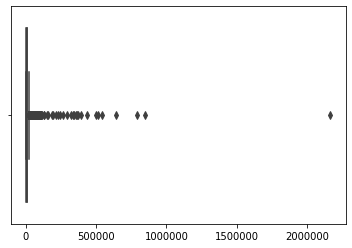

In [461]:
import seaborn as sns
sns.boxplot(Y)

In [462]:
final_data

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
11264            228453         28480328                     0.0   
17530            218995         28364082                     0.0   
13832            218995         28332795                     0.0   
34364            218995         28333003                     0.0   
1803             218995         28364285                     0.0   
...                 ...              ...                     ...   
2401             228090         49798675                     0.0   
26206            226546         49084629                     0.0   
36766            226546         49478447                     0.0   
9562             226546         49478455                     0.0   
9772             226546         49478220                     0.0   

       is_open_invoice  invoice_currency     doc_id  \
11264                0          25238.12  531597048   
17530                0           7907.03  531533111   
13832                0           7682.45  531517992   
34364                0           7684.08  531518567   
1803                 0          13174.26  531533100   
...                ...               ...        ...   
2401                 0            574.98  544748519   
26206                0          14586.66  544427416   
36766                0           3093.52  544604259   
9562                 0           7827.57  544604339   
9772                 0           4491.60  544604254   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
11264                   25238.12        25238.12                 82   
17530                    7907.03         7907.03                 88   
13832                    7682.45         7682.45                 89   
34364                    7684.08         7684.08                 89   
1803                    13174.26        13174.26                 88   
...                          ...             ...                ...   
2401                      574.98          574.98                  3   
26206                   14586.66        14586.66                 28   
36766                    3093.52         3093.52                 15   
9562                     7827.57         7827.57                 15   
9772                     4491.60         4491.60                 15   

       age_invoice  cust_number_mapped  
11264          142                  13  
17530          148                  19  
13832          149                  19  
34364          149                  19  
1803           148                  19  
...            ...                 ...  
2401            63                  14  
26206           88                  21  
36766           75                  21  
9562            75                  21  
9772            75                  21  

[40857 rows x 11 columns]

In [467]:
final_data.payment_amount.replace(0.0, np.nan, inplace=True)

In [494]:
grouped=final_data.groupby('cust_number_mapped')

for name,group in grouped:

    group_a=group.payment_amount
    final_data.payment_amount.fillna(group_a.median(),inplace=True)
    



In [497]:
print(len(final_data[final_data.payment_amount==0.0]))

0


In [498]:
print(len(final_data[final_data.payment_amount.isnull()]))

0


# Replacing Y WITH MEDIAN AS MANY OUTLIERS

In [282]:
#YAXI=Y

In [283]:
#YAXI

payment_amount
11264        25238.12
17530         7907.03
13832         7682.45
34364         7684.08
1803         13174.26
...               ...
2401           574.98
26206        14586.66
36766         3093.52
9562          7827.57
9772          4491.60

[40857 rows x 1 columns]

In [284]:
#YAXI.replace(0.0, np.nan, inplace=True)

In [277]:
#YAXI.fillna(YAXI.median(), inplace=True)

In [278]:
#print(len(YAXI[YAXI.payment_amount.isnull()]))

0


# applying ml now

In [522]:
X=final_data.loc[:, ['cust_number_mapped','invoice_currency','days_past_duedate','age_invoice']]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

accuracy = regressor.score(X_test,y_test)
print(accuracy*100,'%')

98.05844256877046 %


# LASSO

In [523]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.9116010407651061
test score:  0.9805847467791795
number of features used:  4


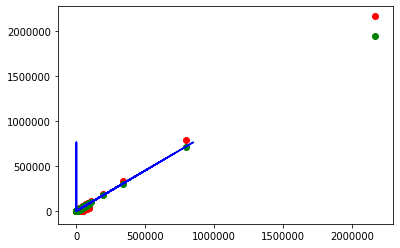

In [524]:
plt.scatter(X_test.invoice_currency,y_test, color = 'red')
plt.scatter(X_test.invoice_currency,y_pred, color = 'green')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')

In [525]:
X_train,X_test,y_train,y_test=train_test_split(X,YAXI, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print("training score for alpha=0.0001:", train_score00001 )
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

training score: 0.9464882900559948
test score:  0.9669952787428623
number of features used:  4
training score for alpha=0.01: 0.9464882911391399
test score for alpha =0.01:  0.9669951356885697
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.9464882911392484
test score for alpha =0.0001:  0.9669951342391304
number of features used: for alpha =0.0001: 4
LR training score: 0.9464882911392484
LR test score:  0.9669951342244878


# CALCULATING PAYMENT OF TEST SET AND VERIFYING THE PAYMENT AS PARTIAL / FULL PAYMENT

In [526]:
fin_data=dat[dat.clear_date_norm_new.isnull()].copy()

In [527]:
fin_data

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
43619            218998         50214231                 9899.86   
43620            226552         51116135                 5859.71   
43621            228113         51200318                18641.43   
43622            228446         50448885                 7293.96   
43623            226547         44288539                 3430.50   
...                 ...              ...                     ...   
48614            219010         50264054                 5279.55   
48615            218996         30234909                16343.80   
48616            228090         50790404                11246.00   
48617            219010         50867507                 1854.36   
48618            218994         51116679                 2824.24   

       is_open_invoice  invoice_currency     doc_id  \
43619                1           9899.86  544937909   
43620                1           5859.71  545670249   
43621                1          18641.43  545714686   
43622                1           7293.96  545042585   
43623                1           3430.50  542361078   
...                ...               ...        ...   
48614                1           5279.55  544965036   
48615                0          16343.80  532905776   
48616                1          11246.00  545384834   
48617                1           1854.36  545416707   
48618                1           2824.24  545668896   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
43619                    9899.86             0.0                -11   
43620                    5859.71             0.0                -41   
43621                   18641.43             0.0                -45   
43622                    7293.96             0.0                -18   
43623                    3430.50             0.0                170   
...                          ...             ...                ...   
48614                    5279.55             0.0                -19   
48615                   16343.80             0.0                 26   
48616                   11246.00             0.0                -31   
48617                    1854.36             0.0                -40   
48618                    2824.24             0.0                -41   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
43619           49                   1                    2019-06-18   
43620           19                   6                    2019-07-18   
43621           15                  34                    2019-07-22   
43622           42                  20                    2019-06-25   
43623          230                   9                    2018-12-19   
...            ...                 ...                           ...   
48614           48                  17                    2019-06-19   
48615           86                   3                    2017-08-07   
48616           29                  14                    2019-07-08   
48617           27                  17                    2019-07-10   
48618           19                   2                    2019-07-18   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
43619                   NaT               NaT                 NaT   
43620                   NaT               NaT                 NaT   
43621                   NaT               NaT                 NaT   
43622                   NaT               NaT                 NaT   
43623                   NaT               NaT                 NaT   
...                     ...               ...                 ...   
48614                   NaT               NaT                 NaT   
48615            2017-08-07        2017-08-07                 NaT   
48616                   NaT               NaT                 NaT   
48617                   NaT               NaT                 NaT   
48618                   NaT               NaT       

In [528]:
X_new_test=fin_data.loc[:, ['cust_number_mapped','invoice_currency','days_past_duedate','age_invoice']]

# USING LASSO REGRESSION

In [530]:
y_predicted=lasso00001.predict(X_new_test)
for i in range(5000):
    print(y_predicted[i])

9377.530812934725
5483.016659227179
17551.485883553847
6955.91129976316
4006.95810790197
570.8076702160786
19125.935712713253
1049.1858617912985
10509.881102649771
13765.723003636878
14801.677868355666
1957.3263298785805
5891.303609875751
1624.8794867962038
2316.3219352657593
7874.30204201935
787.4809321216935
1445.7794194898227
18426.225754520303
1220.114400713671
5623.892270924276
1722.244752436483
6068.54988298811
5367.801043882733
8465.146436808982
4826.0474755168025
6922.344442723451
9407.864125317928
7468.887668035959
5942.035127537081
6887.8400621378105
5940.1018153713285
4218.328479912577
8720.82708297402
244.7664665639412
3037.5363518483364
9694.198297476736
10461.145007643374
9346.983110488214
2812.226059278256
15362.8666272713
543.1582281930237
534.8117889037829
1493.7487897916478
3465.3349565891167
445.0317849351311
223.75397061159128
595.8590890633658
2902.690518298655
717.5230735953064
1556.799097664475
3349.1249703893054
18407.85467650799
1538.9444681994275
1722.10328084

2940.3079563058427
7757.9944312655025
5693.496063459299
4631.231815155184
6841.922420743431
3503.142908745095
7144.876662958107
2164.08872607485
7976.04696530697
648.6119795094454
3871.819480955044
4537.360453509466
2066.3307898453486
13017.127905033381
4250.128911219087
21893.370831950313
524.3876494224919
1749.480659716266
700.6601018382626
5604.813744263201
780.7860119683501
7701.534692728101
457.95891476127633
345.82640643883826
18607.016497047698
11785.100611928381
741.9065381938951
4113.88342601571
5248.3222014279245
754.8398410663158
1800.1352551538594
3066.4627199834335
15648.719805835679
557.7136150451125
16903.575685676777
2772.2632119081845
10833.10605326031
10681.57624177032
1258.8846725029985
2151.306415270914
2569.032119969892
7824.900667543334
10511.461697844561
232.8786059995101
582.54843882276
2855.7839226157043
2734.94310250181
616.1837342528763
1771.368963742571
13040.335093884982
17258.612037514817
3550.936654053412
682.7310509623692
10528.638078180493
564.043876391

181.79562664869616
11915.056504563478
3173.4591488367023
2413.1960532577323
3758.6997237307205
7328.001454707582
10885.844545197946
1312.4932093315833
199.93994281855385
25276.7469730858
19053.003670859754
1854.8345400101061
9454.223106352507
1569.2124799308817
12201.515140150394
3673.5723002850777
5135.084444269884
3184.4310672977226
1235.6306906280379
6551.743695426986
16670.178623386906
8423.228712687738
11719.83366156425
5602.3060313976475
3649.2695311047987
6517.105999711064
922.2608558972161
780.2036361306004
2411.0031675259534
3242.4707027276195
8951.117877093116
7282.408969702769
8665.692568390088
1322.1092937843237
1916.8977739022694
7752.137244679579
5946.455764077736
2289.4842314884863
5243.025622276155
913.1311004233974
1760.014204301246
3466.847448504021
5776.531936765183
30097.416463670495
1344.9436030406207
4180.811149879105
3502.232102388501
621.6883543090123
2484.7022481973327
28816.84456496685
11193.240669864406
1341.162784997415
2790.590289356276
12701.256901035555
7

In [533]:
print(y_predicted)

[ 9377.53081293  5483.01665923 17551.48588355 ... 10602.38416168
  1811.92878509  2620.67809363]


In [534]:
x_data=np.array(y_predicted)

In [536]:
fin_data['expected_payment']=x_data

In [580]:
fin_data['payment_status']=fin_data['invoice_currency']-fin_data['expected_payment']


In [582]:
fin_data.sort_values('payment_status')
    

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
46885            226547         44376182                  192.00   
47533            226547         44375996                  192.00   
46275            226547         44375923                  288.00   
43693            226547         44376153                  288.00   
44094            226547         44376169                  288.00   
...                 ...              ...                     ...   
46620            226545         30616486               122380.13   
48152            226547         30234616               198031.30   
44303            226547         44925261               214057.44   
46239            226545         30232387               422399.11   
47225            226547         30306284               626744.35   

       is_open_invoice  invoice_currency     doc_id  \
46885                1            192.00  542378504   
47533                1            192.00  542378387   
46275                1            288.00  542378698   
43693                1            288.00  542378308   
44094                1            288.00  542378554   
...                ...               ...        ...   
46620                0         122380.13  533264348   
48152                0         198031.30  532905360   
44303                1         214057.44  542573206   
46239                0         422399.11  532903659   
47225                0         626744.35  532939757   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
46885                     192.00             0.0                168   
47533                     192.00             0.0                168   
46275                     288.00             0.0                168   
43693                     288.00             0.0                168   
44094                     288.00             0.0                168   
...                          ...             ...                ...   
46620                  122380.13             0.0                  9   
48152                  198031.30             0.0                 26   
44303                  214057.44             0.0                154   
46239                  422399.11             0.0                 26   
47225                  626744.35             0.0                 23   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
46885          228                   9                    2018-12-21   
47533          228                   9                    2018-12-21   
46275          228                   9                    2018-12-21   
43693          228                   9                    2018-12-21   
44094          228                   9                    2018-12-21   
...            ...                 ...                           ...   
46620           69                  45                    2017-08-24   
48152           86                   9                    2017-08-07   
44303          214                   9                    2019-01-04   
46239           86                  45                    2017-08-07   
47225           83                   9                    2017-08-10   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
46885                   NaT               NaT                 NaT   
47533                   NaT               NaT                 NaT   
46275                   NaT               NaT                 NaT   
43693                   NaT               NaT                 NaT   
44094                   NaT               NaT                 NaT   
...                     ...               ...                 ...   
46620                   NaT               NaT                 NaT   
48152            2017-08-07        2017-08-07                 NaT   
44303                   NaT               NaT                 NaT   
46239            2017-08-07        2017-08-07                 NaT   
47225            2017-08-10        2017-08-10       

In [583]:
print(len(fin_data[fin_data.payment_status<0]))

1165


In [584]:
a=fin_data[fin_data.payment_status<=0]

In [585]:
b=fin_data[fin_data.payment_status>0]

In [586]:
a['payment']='FULL'
b['payment']='PARTIAL'

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [590]:
datx=a.append(b)

In [591]:
datx

cust_number_norm  invoice_id_norm  total_open_amount_norm  \
43623            226547         44288539                 3430.50   
43632            219001         30427171                 1507.17   
43635            226552         50063321                  720.00   
43638            218996         50328972                 1152.00   
43653            218997         50003725                  151.86   
...                 ...              ...                     ...   
48614            219010         50264054                 5279.55   
48615            218996         30234909                16343.80   
48616            228090         50790404                11246.00   
48617            219010         50867507                 1854.36   
48618            218994         51116679                 2824.24   

       is_open_invoice  invoice_currency     doc_id  \
43623                1           3430.50  542361078   
43632                0           1507.17  532988672   
43635                1            720.00  544866711   
43638                1           1152.00  544989836   
43653                1            151.86  544833142   
...                ...               ...        ...   
48614                1           5279.55  544965036   
48615                0          16343.80  532905776   
48616                1          11246.00  545384834   
48617                1           1854.36  545416707   
48618                1           2824.24  545668896   

       actual_outstanding_amount  payment_amount  days_past_duedate  \
43623                    3430.50             0.0                170   
43632                    1507.17             0.0                 17   
43635                     720.00             0.0                 -6   
43638                    1152.00             0.0                -29   
43653                     151.86             0.0                 -4   
...                          ...             ...                ...   
48614                    5279.55             0.0                -19   
48615                   16343.80             0.0                 26   
48616                   11246.00             0.0                -31   
48617                    1854.36             0.0                -40   
48618                    2824.24             0.0                -41   

       age_invoice  cust_number_mapped document_create_date_norm_new  \
43623          230                   9                    2018-12-19   
43632           77                  10                    2017-08-16   
43635           54                   6                    2019-06-13   
43638           46                   3                    2019-06-21   
43653           56                   0                    2019-06-11   
...            ...                 ...                           ...   
48614           48                  17                    2019-06-19   
48615           86                   3                    2017-08-07   
48616           29                  14                    2019-07-08   
48617           27                  17                    2019-07-10   
48618           19                   2                    2019-07-18   

      invoice_date_norm_new shipping_date_new clear_date_norm_new  \
43623                   NaT               NaT                 NaT   
43632            2017-08-16        2017-08-16                 NaT   
43635                   NaT               NaT                 NaT   
43638                   NaT               NaT                 NaT   
43653                   NaT               NaT                 NaT   
...                     ...               ...                 ...   
48614                   NaT               NaT                 NaT   
48615            2017-08-07        2017-08-07                 NaT   
48616                   NaT               NaT                 NaT   
48617                   NaT               NaT                 NaT   
48618                   NaT               NaT       

# DECISION TREE WITH ADABOOST

In [628]:
rng = np.random.RandomState(1)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

regr_1 = DecisionTreeRegressor(max_depth=7,random_state = 0)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=350, random_state=rng)
regr_3= AdaBoostRegressor(RandomForestRegressor(max_depth=4),
                          n_estimators=350, random_state=rng)

regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)
regr_3.fit(X_train,y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

accuracy = regr_1.score(X_test,y_test)
print(accuracy*100,'%')

accuracy = regr_2.score(X_test,y_test)
print(accuracy*100,'%')

accuracy = regr_3.score(X_test,y_test)
print(accuracy*100,'%')

C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\KIIT\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\KII

95.89306052452635 %
90.21665154029553 %
90.62190095027465 %


In [623]:
lr_train_score=regr_1.score(X_train,y_train)
lr_test_score=regr_1.score(X_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.9866074839440673
LR test score:  0.9589306052452634


In [624]:
lr_train_score=regr_2.score(X_train,y_train)
lr_test_score=regr_2.score(X_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.957682607509254
LR test score:  0.9021665154029553


In [629]:
lr_train_score=regr_3.score(X_train,y_train)
lr_test_score=regr_3.score(X_test,y_test)
print("LR training score:", lr_train_score )
print("LR test score: ", lr_test_score)

LR training score: 0.9697448051854713
LR test score:  0.9062190095027465
